# Explore, Visualize, and Predict using Pandas & Jupyter

### Learn to import, explore, and tweak your data

Matt Harrison (@\_\_mharrison\_\_)

The pandas library is very popular among data scientists, quants, Excel junkies, and Python developers because it allows you to perform data ingestion, exporting, transformation, and visualization with ease. But if you are only familiar with Python, pandas may present some challenges. Since pandas is inspired by Numpy, its syntax conventions can be confusing to Python developers.

If you have questions on Python syntax, check out https://github.com/mattharrison/Tiny-Python-3.6-Notebook

Much of this content is based on my Pandas book, [*Learning the Pandas Library*](https://www.amazon.com/Learning-Pandas-Library-Munging-Analysis/dp/153359824X/ref=sr_1_3?ie=UTF8&qid=1505448275&sr=8-3&keywords=python+pandas)

# Jupyter Intro

Jupyter notebook is an environment for combining interactive coding and text in a webbrowser. This allows us to easily share code as well as narrative around that code. An example that was popular in the scientific community was [the discovery of gravitational waves.](https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html)

The name Jupyter is a rebranding of an open source project previously known as iPython Notebook. The rebranding was to emphasize that although the backend is written in Python, it supports various *kernals* to run other languages, including Julia (the "Ju" portion), Python ("pyt"), and R ("er"). All popular *data science* programming languages.

The architecture of Jupyter includes a server running various kernals. Using a *notebook* we can interact with a kernal. Typically we use a webbrowser to do this, but there are other iterfaces, such as an emacs mode (ein).

## Using Jupyter

After we create a notebook, we are presented with a page with an empty cell. The cell will have a blue outline, ane the text:

    In [ ]: 
    
on the side. The blue outline indicates that we are in *command mode*. There are two modes in Jupyter, command mode and *edit mode*.

To enter edit mode simply hit the enter or return key. You will notice that the outline will change to green. In edit mode, with a Python kernel, we can type Python code. Type:

    print("hello world")
    
You will notice that unlike a normal Python REPL, this will note print anything after hitting return again. To *execute* the cell, you need to hold down control and hit enter (``C-Enter``). This will run the code, print the results of the cell and put you back into edit mode.     

## Edit Mode

To enter *Edit Mode* you need to click on a cell or hit enter when it is surrounded by the blue outline. You will see that it goes green if you are in edit mode. In edit mode you have basic editing functionality. A few keys to know:

* Ctr-Enter - Run cell (execute Python code, render Markdown)
* ESC - Go back to command mode
* TAB - Tab completion
* Shift-TAB - Bring up tooltip (ESC to dismiss)


## Command Mode

*Command Mode* gives to the ability to create, copy, paste, move, and execute cells. A few keys to know:

* h - Bring up help (ESC to dismiss)
* b - Create cell below
* a - Create cell above
* c - Copy cell
* v - Paste cell below
* Enter - Go into Edit Mode
* m - Change cell type to Markdown
* y - Change cell type to code
* ii - Interrupt kernel
* oo - Restart kernel

## Cell Types

* Code
* Markdown


## Markdown

Can make *italicized*, **bold**, and ``monospaced text``:

    Can make *italicized*, **bold**, and ``monospaced text``


Headers:

    # H1
    ## H2
    ### H3
 
Lists:

    * First item
    * Second item
    
Code:

    If you indent by four spaces you have code:
    
        def add(x, y):
            return x + yt
    
## Cell Magic

type and run ``%lsmagic`` in a cell.

Common magics include:

* ``%%time`` - time how long it takes to run cell
* ``%%!`` - run shell command
* ``%matplotlib inline`` - show matplotlib plots


## IPython Help
Add ? after function, method, etc for documentation (can also run shift-tab 4 times in notebook). Add ?? after function, method, etc to see the source.

# Setup

In [4]:
import pandas as pd
import matplotlib
import numpy as np

pd.__version__, matplotlib.__version__, np.__version__

('0.20.0rc1', '2.0.0', '1.12.1')

In [8]:
# test for unicode
'\N{SNAKE}'

'🐍'

In [9]:
import sys
sys.getdefaultencoding() 

'utf-8'

In [10]:
sys.version

'3.6.0 (default, Dec 24 2016, 08:01:42) \n[GCC 4.2.1 Compatible Apple LLVM 8.0.0 (clang-800.0.42.1)]'

# Pandas Intro

## Installation

Presumably, you have pandas installed if you ran the cell after **Setup** successfully. The Anaconda distribution is a common way to get the Python scientific stack up and running quickly on most platforms. Running ``pip install pandas`` works as well.

In [11]:
# pandas has two main datatypes: a Series and a DataFrame
# A Series is like a column from a spreadsheet

s = pd.Series([0, 4, 6, 7])

In [12]:
# A DataFrame is like a spreadsheet

df = pd.DataFrame({'name': ['Fred', 'Johh', 'Joe', 'Abe'], 'age': s})

In [13]:
# We can do tab completion on objects that exist (shift tab brings up tooltip)
# ?? brings up source
df.

SyntaxError: invalid syntax (<ipython-input-13-dd901d892abf>, line 3)

# Datasets

For this class we will look at some time series data. The class will look at Central Park weather. The assignments will deal with El Nino data.

## Central Park


https://pastebin.com/vaB6QQGp

## El Nino

https://archive.ics.uci.edu/ml/datasets/El+Nino

In [14]:
%matplotlib inline
# I typically start with imports like this including the matplotlib magic 
# for most notebooks
import pandas as pd
import numpy as np 

# Getting Data
There are various ``pd.read_`` functions for ingesting data

In [15]:
# not necessary if you started jupyter from the project directory
%ls data/
# should have central-park-raw.csv

central-park-raw.csv  tao-all2.dat.gz       vehicles.csv.zip


In [16]:
# if you execute this cell it will bring up a tooltip due to
# the ? at the end. You can also hit shift-tab 4 times
# if your cursor is after the v
# Hit escape to dismiss the tooltip
pd.read_csv?

In [17]:
# let's load the data and treat column 0 as a date
nyc = pd.read_csv('data/central-park-raw.csv', parse_dates=[0])
# Jupyter will print the result of the last command
nyc

EST  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0    2006-01-01              42.0               37.0              32.0   
1    2006-01-02              48.0               44.0              39.0   
2    2006-01-03              40.0               37.0              33.0   
3    2006-01-04              38.0               34.0              29.0   
4    2006-01-05              50.0               44.0              37.0   
5    2006-01-06              43.0               37.0              30.0   
6    2006-01-07              35.0               30.0              25.0   
7    2006-01-08              46.0               40.0              34.0   
8    2006-01-09              60.0               52.0              43.0   
9    2006-01-10              49.0               45.0              41.0   
10   2006-01-11              52.0               47.0              42.0   
11   2006-01-12              57.0               51.0              45.0   
12   2006-01-13              54.0               49.0              43.0   
13   2006-01-14              57.0               44.0              31.0   
14   2006-01-15              32.0               24.0              16.0   
15   2006-01-16              32.0               24.0              16.0   
16   2006-01-17              44.0               35.0              26.0   
17   2006-01-18              58.0               47.0              36.0   
18   2006-01-19              47.0               41.0              34.0   
19   2006-01-20              61.0               52.0              42.0   
20   2006-01-21              63.0               51.0              38.0   
21   2006-01-22              43.0               38.0              33.0   
22   2006-01-23              40.0               38.0              35.0   
23   2006-01-24              46.0               41.0              35.0   
24   2006-01-25              42.0               38.0              34.0   
25   2006-01-26              35.0               31.0              26.0   
26   2006-01-27              43.0               34.0              24.0   
27   2006-01-28              58.0               48.0              37.0   
28   2006-01-29              53.0               49.0              44.0   
29   2006-01-30              64.0               53.0              41.0   
...         ...               ...                ...               ...   
3257 2014-12-02              43.0               39.0              35.0   
3258 2014-12-03              46.0               44.0              41.0   
3259 2014-12-04              45.0               41.0              37.0   
3260 2014-12-05              44.0               39.0              34.0   
3261 2014-12-06              50.0               45.0              39.0   
3262 2014-12-07              42.0               36.0              30.0   
3263 2014-12-08              37.0               31.0              24.0   
3264 2014-12-09              42.0               39.0              36.0   
3265 2014-12-10              40.0               36.0              32.0   
3266 2014-12-11              38.0               35.0              31.0   
3267 2014-12-12              38.0               35.0              32.0   
3268 2014-12-13              44.0               39.0              34.0   
3269 2014-12-14              46.0               42.0              38.0   
3270 2014-12-15              48.0               43.0              37.0   
3271 2014-12-16              49.0               44.0              38.0   
3272 2014-12-17              54.0               48.0              42.0   
3273 2014-12-18              42.0               40.0              37.0   
3274 2014-12-19              38.0               35.0              31.0   
3275 2014-12-20              33.0               32.0              30.0   
3276 2014-12-21              36.0               34.0              31.0   
3277 2014-12-22              44.0               40.0              35.0   
3278 2014-12-23              46.0               45.0              43.0   
3279 2014-12-24 

In [18]:
# dataframes can get big, so only show the first bit
nyc.head()

EST  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0 2006-01-01              42.0               37.0              32.0   
1 2006-01-02              48.0               44.0              39.0   
2 2006-01-03              40.0               37.0              33.0   
3 2006-01-04              38.0               34.0              29.0   
4 2006-01-05              50.0               44.0              37.0   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  \
0            32.0            30.0           28.0          85.0   
1            38.0            34.0           29.0          92.0   
2            38.0            33.0           26.0          92.0   
3            36.0            26.0           19.0          85.0   
4            38.0            35.0           32.0          92.0   

    Mean Humidity   Min Humidity       ...         Max VisibilityMiles  \
0            74.0           62.0       ...                        10.0   
1            71.0           49.0       ...                        10.0   
2            84.0           75.0       ...                        10.0   
3            72.0           59.0       ...                        10.0   
4            71.0           50.0       ...                        10.0   

    Mean VisibilityMiles   Min VisibilityMiles   Max Wind SpeedMPH  \
0                   10.0                   8.0                 9.0   
1                    8.0                   4.0                18.0   
2                    7.0                   2.0                28.0   
3                   10.0                   4.0                15.0   
4                    6.0                   2.0                15.0   

    Mean Wind SpeedMPH   Max Gust SpeedMPH  PrecipitationIn   CloudCover  \
0                  3.0                10.0             0.00          8.0   
1                  5.0                24.0             0.63          5.0   
2                 15.0                41.0             1.13          8.0   
3                  7.0                20.0             0.00          3.0   
4                  5.0                21.0             0.05          6.0   

    Events  WindDirDegrees  
0      NaN           276.0  
1     Rain            76.0  
2     Rain            39.0  
3      NaN            70.0  
4     Rain           251.0  

[5 rows x 23 columns]

## Getting Data Assignment

For your assignment, you will look at El Nino data.

The [website](https://archive.ics.uci.edu/ml/datasets/El+Nino)  states:

    The data is stored in an ASCII files with one observation per line. Spaces separate fields and periods (.) denote missing values.


Load the ``data/tao-all2.dat.gz`` file into a data frame using ``pd.read_csv``.
Use the ``names`` variable for the initial column names (taken from website).
Replace empty values (``.``) with ``NaN``. Pull the year, month, and date columns into a single variable using the ``parse_dates`` parameter (see the ``pd.read_csv`` docs for info on this).

In [2]:
# col names in tao-all2.col from website
names = '''obs
year
month
day
date
latitude
longitude
zon.winds
mer.winds
humidity
air temp.
s.s.temp.'''.split('\n')



In [5]:
nino = pd.read_csv('data/tao-all2.dat.gz', sep=' ', names=names, na_values='.', 
                   parse_dates=[[1,2,3]])


In [21]:
nino

year_month_day     obs    date  latitude  longitude  zon.winds  \
0          1980-03-07       1  800307     -0.02    -109.46       -6.8   
1          1980-03-08       2  800308     -0.02    -109.46       -4.9   
2          1980-03-09       3  800309     -0.02    -109.46       -4.5   
3          1980-03-10       4  800310     -0.02    -109.46       -3.8   
4          1980-03-11       5  800311     -0.02    -109.46       -4.2   
5          1980-03-12       6  800312     -0.02    -109.46       -4.4   
6          1980-03-13       7  800313     -0.02    -109.46       -3.2   
7          1980-03-14       8  800314     -0.02    -109.46       -3.1   
8          1980-03-15       9  800315     -0.02    -109.46       -3.0   
9          1980-03-16      10  800316     -0.02    -109.46       -1.2   
10         1980-03-17      11  800317     -0.02    -109.46       -0.1   
11         1980-03-18      12  800318     -0.02    -109.46       -1.2   
12         1980-03-19      13  800319     -0.02    -109.46       -4.1   
13         1980-03-20      14  800320     -0.02    -109.46       -4.8   
14         1980-03-21      15  800321     -0.02    -109.46       -5.2   
15         1980-03-22      16  800322     -0.02    -109.46       -2.7   
16         1980-03-23      17  800323     -0.02    -109.46       -4.4   
17         1980-03-24      18  800324     -0.02    -109.46       -4.3   
18         1980-03-25      19  800325     -0.02    -109.46       -3.8   
19         1980-03-26      20  800326     -0.02    -109.46       -3.0   
20         1980-03-27      21  800327     -0.02    -109.46       -3.2   
21         1980-03-28      22  800328     -0.02    -109.46       -1.9   
22         1980-03-29      23  800329     -0.02    -109.46       -0.8   
23         1980-08-11      24  800811      0.00    -109.56       -3.3   
24         1980-08-12      25  800812      0.00    -109.56       -3.5   
25         1980-08-13      26  800813      0.00    -109.56       -4.9   
26         1980-08-14      27  800814      0.00    -109.56       -1.2   
27         1980-08-15      28  800815      0.00    -109.56       -1.2   
28         1980-08-16      29  800816      0.00    -109.56       -1.9   
29         1980-08-17      30  800817      0.00    -109.56       -4.2   
...               ...     ...     ...       ...        ...        ...   
178050     1998-05-17  178051  980517      8.96    -140.33       -5.3   
178051     1998-05-18  178052  980518      8.96    -140.32       -5.4   
178052     1998-05-19  178053  980519      8.95    -140.33       -6.4   
178053     1998-05-20  178054  980520      8.96    -140.34       -8.3   
178054     1998-05-21  178055  980521      8.96    -140.33       -7.7   
178055     1998-05-22  178056  980522      8.96    -140.32       -7.3   
178056     1998-05-23  178057  980523      8.96    -140.32       -6.3   
178057     1998-05-24  178058  980524      8.95    -140.32       -5.7   
178058     1998-05-25  178059  980525      8.96    -140.32       -6.2   
178059     1998-05-26  178060  980526      8.96    -140.34       -6.4   
178060     1998-05-27  178061  980527      8.96    -140.33       -4.9   
178061     1998-05-28  178062  980528      8.96    -140.33       -6.3   
178062     1998-05-29  178063  980529      8.97    -140.32       -6.7   
178063     1998-05-30  178064  980530      8.96    -140.33       -6.3   
178064     1998-05-31  178065  980531      8.97    -140.33       -6.3   
178065     1998-06-01  178066  980601      8.97    -140.32       -4.2   
178066     1998-06-02  178067  980602      8.96    -140.32       -6.8   
178067     1998-06-03  178068  980603      8.96    -140.33       -7.1   
178068     1998-06-04  178069  980604      8.96    -140.33       -6.7   
178069     1998-06-05  178070  980605      8.96    -140.32       -6.4   
178070     1998-06-06  178071  980606      8.96    -140.33       -6.6   
178071     1998-06-07  178072  980607      8.95    -140.33       -8.4   
178072     1998-06-08  178073  980608      8.96    -140.33       

# Inspecting Data

In [22]:
# Interesting aside, the columns are actually an Index 
nyc.columns

Index(['EST', 'Max TemperatureF', 'Mean TemperatureF', 'Min TemperatureF',
       'Max Dew PointF', 'MeanDew PointF', 'Min DewpointF', 'Max Humidity',
       ' Mean Humidity', ' Min Humidity', ' Max Sea Level PressureIn',
       ' Mean Sea Level PressureIn', ' Min Sea Level PressureIn',
       ' Max VisibilityMiles', ' Mean VisibilityMiles', ' Min VisibilityMiles',
       ' Max Wind SpeedMPH', ' Mean Wind SpeedMPH', ' Max Gust SpeedMPH',
       'PrecipitationIn', ' CloudCover', ' Events', ' WindDirDegrees'],
      dtype='object')

In [23]:
# If is good to know if columns have a [correct] type, (object could mean string)
nyc.dtypes


EST                           datetime64[ns]
Max TemperatureF                     float64
Mean TemperatureF                    float64
Min TemperatureF                     float64
Max Dew PointF                       float64
MeanDew PointF                       float64
Min DewpointF                        float64
Max Humidity                         float64
 Mean Humidity                       float64
 Min Humidity                        float64
 Max Sea Level PressureIn            float64
 Mean Sea Level PressureIn           float64
 Min Sea Level PressureIn            float64
 Max VisibilityMiles                 float64
 Mean VisibilityMiles                float64
 Min VisibilityMiles                 float64
 Max Wind SpeedMPH                   float64
 Mean Wind SpeedMPH                  float64
 Max Gust SpeedMPH                   float64
PrecipitationIn                       object
 CloudCover                          float64
 Events                               object
 WindDirD

In [24]:
# we can also see how much space is taken up
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 23 columns):
EST                           3287 non-null datetime64[ns]
Max TemperatureF              3285 non-null float64
Mean TemperatureF             3285 non-null float64
Min TemperatureF              3285 non-null float64
Max Dew PointF                3285 non-null float64
MeanDew PointF                3285 non-null float64
Min DewpointF                 3285 non-null float64
Max Humidity                  3285 non-null float64
 Mean Humidity                3285 non-null float64
 Min Humidity                 3285 non-null float64
 Max Sea Level PressureIn     3275 non-null float64
 Mean Sea Level PressureIn    3275 non-null float64
 Min Sea Level PressureIn     3275 non-null float64
 Max VisibilityMiles          3277 non-null float64
 Mean VisibilityMiles         3277 non-null float64
 Min VisibilityMiles          3277 non-null float64
 Max Wind SpeedMPH            3245 non-null float64
 M

In [25]:
# just view the first 10 rows
nyc.head(10)

EST  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0 2006-01-01              42.0               37.0              32.0   
1 2006-01-02              48.0               44.0              39.0   
2 2006-01-03              40.0               37.0              33.0   
3 2006-01-04              38.0               34.0              29.0   
4 2006-01-05              50.0               44.0              37.0   
5 2006-01-06              43.0               37.0              30.0   
6 2006-01-07              35.0               30.0              25.0   
7 2006-01-08              46.0               40.0              34.0   
8 2006-01-09              60.0               52.0              43.0   
9 2006-01-10              49.0               45.0              41.0   

   Max Dew PointF  MeanDew PointF  Min DewpointF  Max Humidity  \
0            32.0            30.0           28.0          85.0   
1            38.0            34.0           29.0          92.0   
2            38.0            33.0           26.0          92.0   
3            36.0            26.0           19.0          85.0   
4            38.0            35.0           32.0          92.0   
5            33.0            24.0           14.0          73.0   
6            19.0            14.0           11.0          60.0   
7            35.0            25.0           19.0          70.0   
8            39.0            36.0           30.0          76.0   
9            31.0            28.0           26.0          62.0   

    Mean Humidity   Min Humidity       ...         Max VisibilityMiles  \
0            74.0           62.0       ...                        10.0   
1            71.0           49.0       ...                        10.0   
2            84.0           75.0       ...                        10.0   
3            72.0           59.0       ...                        10.0   
4            71.0           50.0       ...                        10.0   
5            60.0           47.0       ...                        10.0   
6            51.0           41.0       ...                        10.0   
7            56.0           41.0       ...                        10.0   
8            60.0           44.0       ...                        10.0   
9            52.0           42.0       ...                        10.0   

    Mean VisibilityMiles   Min VisibilityMiles   Max Wind SpeedMPH  \
0                   10.0                   8.0                 9.0   
1                    8.0                   4.0                18.0   
2                    7.0                   2.0                28.0   
3                   10.0                   4.0                15.0   
4                    6.0                   2.0                15.0   
5                   10.0                  10.0                17.0   
6                   10.0                  10.0                15.0   
7                   10.0                  10.0                13.0   
8                   10.0                  10.0                15.0   
9                   10.0                  10.0                10.0   

    Mean Wind SpeedMPH   Max Gust SpeedMPH  PrecipitationIn   CloudCover  \
0                  3.0                10.0             0.00          8.0   
1                  5.0                24.0             0.63          5.0   
2                 15.0                41.0             1.13          8.0   
3                  7.0                20.0             0.00          3.0   
4                  5.0                21.0             0.05          6.0   
5                  6.0                25.0             0.00          7.0   
6                  7.0                23.0             0.00          2.0   
7                  5.0                17.0             0.00          3.0   
8                  8.0                24.0             0.00          1.0   
9                  6.0                16.0             0.00          1.0   

    Events  WindDirDegrees  
0      NaN           276.0  
1     Rain         

In [26]:
# Transposing the data often makes it easier to view
nyc.T  # nyc.transpose()

0                    1     \
EST                         2006-01-01 00:00:00  2006-01-02 00:00:00   
Max TemperatureF                             42                   48   
Mean TemperatureF                            37                   44   
Min TemperatureF                             32                   39   
Max Dew PointF                               32                   38   
MeanDew PointF                               30                   34   
Min DewpointF                                28                   29   
Max Humidity                                 85                   92   
 Mean Humidity                               74                   71   
 Min Humidity                                62                   49   
 Max Sea Level PressureIn                  30.2                30.24   
 Mean Sea Level PressureIn                30.03                30.15   
 Min Sea Level PressureIn                 29.83                29.93   
 Max VisibilityMiles                         10                   10   
 Mean VisibilityMiles                        10                    8   
 Min VisibilityMiles                          8                    4   
 Max Wind SpeedMPH                            9                   18   
 Mean Wind SpeedMPH                           3                    5   
 Max Gust SpeedMPH                           10                   24   
PrecipitationIn                            0.00                 0.63   
 CloudCover                                   8                    5   
 Events                                     NaN                 Rain   
 WindDirDegrees                             276                   76   

                                           2                    3     \
EST                         2006-01-03 00:00:00  2006-01-04 00:00:00   
Max TemperatureF                             40                   38   
Mean TemperatureF                            37                   34   
Min TemperatureF                             33                   29   
Max Dew PointF                               38                   36   
MeanDew PointF                               33                   26   
Min DewpointF                                26                   19   
Max Humidity                                 92                   85   
 Mean Humidity                               84                   72   
 Min Humidity                                75                   59   
 Max Sea Level PressureIn                 30.05                30.09   
 Mean Sea Level PressureIn                29.93                29.96   
 Min Sea Level PressureIn                 29.83                29.79   
 Max VisibilityMiles                         10                   10   
 Mean VisibilityMiles                         7                   10   
 Min VisibilityMiles                          2                    4   
 Max Wind SpeedMPH                           28                   15   
 Mean Wind SpeedMPH                          15                    7   
 Max Gust SpeedMPH                           41                   20   
PrecipitationIn                            1.13                 0.00   
 CloudCover                                   8                    3   
 Events                                    Rain                  NaN   
 WindDirDegrees                              39                   70   

                                           4                    5     \
EST                         2006-01-05 00:00:00  2006-01-06 00:00:00   
Max TemperatureF                             50                   43   
Mean TemperatureF                            44                   37   
Min TemperatureF                             37                   30   
Max Dew PointF                               38                   33   
MeanDew PointF                               35                   24   
Min DewpointF                                32                   14   
Max Humid

In [27]:
# Here is the size (num rows, num cols)
nyc.shape

(3287, 23)

In [28]:
# We can inspect the index
nyc.index

RangeIndex(start=0, stop=3287, step=1)

In [29]:
# We can use the .set_index method to use another column as the index
nyc.set_index('EST')

Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
EST                                                                 
2006-01-01              42.0               37.0              32.0   
2006-01-02              48.0               44.0              39.0   
2006-01-03              40.0               37.0              33.0   
2006-01-04              38.0               34.0              29.0   
2006-01-05              50.0               44.0              37.0   
2006-01-06              43.0               37.0              30.0   
2006-01-07              35.0               30.0              25.0   
2006-01-08              46.0               40.0              34.0   
2006-01-09              60.0               52.0              43.0   
2006-01-10              49.0               45.0              41.0   
2006-01-11              52.0               47.0              42.0   
2006-01-12              57.0               51.0              45.0   
2006-01-13              54.0               49.0              43.0   
2006-01-14              57.0               44.0              31.0   
2006-01-15              32.0               24.0              16.0   
2006-01-16              32.0               24.0              16.0   
2006-01-17              44.0               35.0              26.0   
2006-01-18              58.0               47.0              36.0   
2006-01-19              47.0               41.0              34.0   
2006-01-20              61.0               52.0              42.0   
2006-01-21              63.0               51.0              38.0   
2006-01-22              43.0               38.0              33.0   
2006-01-23              40.0               38.0              35.0   
2006-01-24              46.0               41.0              35.0   
2006-01-25              42.0               38.0              34.0   
2006-01-26              35.0               31.0              26.0   
2006-01-27              43.0               34.0              24.0   
2006-01-28              58.0               48.0              37.0   
2006-01-29              53.0               49.0              44.0   
2006-01-30              64.0               53.0              41.0   
...                      ...                ...               ...   
2014-12-02              43.0               39.0              35.0   
2014-12-03              46.0               44.0              41.0   
2014-12-04              45.0               41.0              37.0   
2014-12-05              44.0               39.0              34.0   
2014-12-06              50.0               45.0              39.0   
2014-12-07              42.0               36.0              30.0   
2014-12-08              37.0               31.0              24.0   
2014-12-09              42.0               39.0              36.0   
2014-12-10              40.0               36.0              32.0   
2014-12-11              38.0               35.0              31.0   
2014-12-12              38.0               35.0              32.0   
2014-12-13              44.0               39.0              34.0   
2014-12-14              46.0               42.0              38.0   
2014-12-15              48.0               43.0              37.0   
2014-12-16              49.0               44.0              38.0   
2014-12-17              54.0               48.0              42.0   
2014-12-18              42.0               40.0              37.0   
2014-12-19              38.0               35.0              31.0   
2014-12-20              33.0               32.0              30.0   
2014-12-21              36.0               34.0              31.0   
2014-12-22              44.0               40.0              35.0   
2014-12-23              46.0               45.0              43.0   
2014-12-24              58.0               51.0              44.0   
2014-12-25              62.0               53.0              44.0   
2014-12-26              50.0               45.0              40.0   
2014-12-27

In [30]:
# undo .set_index with .reset_index
nyc.set_index('EST').reset_index()

EST  Max TemperatureF  Mean TemperatureF  Min TemperatureF  \
0    2006-01-01              42.0               37.0              32.0   
1    2006-01-02              48.0               44.0              39.0   
2    2006-01-03              40.0               37.0              33.0   
3    2006-01-04              38.0               34.0              29.0   
4    2006-01-05              50.0               44.0              37.0   
5    2006-01-06              43.0               37.0              30.0   
6    2006-01-07              35.0               30.0              25.0   
7    2006-01-08              46.0               40.0              34.0   
8    2006-01-09              60.0               52.0              43.0   
9    2006-01-10              49.0               45.0              41.0   
10   2006-01-11              52.0               47.0              42.0   
11   2006-01-12              57.0               51.0              45.0   
12   2006-01-13              54.0               49.0              43.0   
13   2006-01-14              57.0               44.0              31.0   
14   2006-01-15              32.0               24.0              16.0   
15   2006-01-16              32.0               24.0              16.0   
16   2006-01-17              44.0               35.0              26.0   
17   2006-01-18              58.0               47.0              36.0   
18   2006-01-19              47.0               41.0              34.0   
19   2006-01-20              61.0               52.0              42.0   
20   2006-01-21              63.0               51.0              38.0   
21   2006-01-22              43.0               38.0              33.0   
22   2006-01-23              40.0               38.0              35.0   
23   2006-01-24              46.0               41.0              35.0   
24   2006-01-25              42.0               38.0              34.0   
25   2006-01-26              35.0               31.0              26.0   
26   2006-01-27              43.0               34.0              24.0   
27   2006-01-28              58.0               48.0              37.0   
28   2006-01-29              53.0               49.0              44.0   
29   2006-01-30              64.0               53.0              41.0   
...         ...               ...                ...               ...   
3257 2014-12-02              43.0               39.0              35.0   
3258 2014-12-03              46.0               44.0              41.0   
3259 2014-12-04              45.0               41.0              37.0   
3260 2014-12-05              44.0               39.0              34.0   
3261 2014-12-06              50.0               45.0              39.0   
3262 2014-12-07              42.0               36.0              30.0   
3263 2014-12-08              37.0               31.0              24.0   
3264 2014-12-09              42.0               39.0              36.0   
3265 2014-12-10              40.0               36.0              32.0   
3266 2014-12-11              38.0               35.0              31.0   
3267 2014-12-12              38.0               35.0              32.0   
3268 2014-12-13              44.0               39.0              34.0   
3269 2014-12-14              46.0               42.0              38.0   
3270 2014-12-15              48.0               43.0              37.0   
3271 2014-12-16              49.0               44.0              38.0   
3272 2014-12-17              54.0               48.0              42.0   
3273 2014-12-18              42.0               40.0              37.0   
3274 2014-12-19              38.0               35.0              31.0   
3275 2014-12-20              33.0               32.0              30.0   
3276 2014-12-21              36.0               34.0              31.0   
3277 2014-12-22              44.0               40.0              35.0   
3278 2014-12-23              46.0               45.0              43.0   
3279 2014-12-24 

## Inspecting Data Assignment

Now it is your turn to inspect the El Nino data.
 
* What are the columns of the dataframe?
* What are the types of the columns?
* How would you print the first 10 rows of data?
* How would you transpose the data?
* What is the shape of the data?
* How would we inspect the index?

In [31]:
nino.columns

Index(['year_month_day', 'obs', 'date', 'latitude', 'longitude', 'zon.winds',
       'mer.winds', 'humidity', 'air temp.', 's.s.temp.'],
      dtype='object')

In [34]:
nino.dtypes


year_month_day    datetime64[ns]
obs                        int64
date                       int64
latitude                 float64
longitude                float64
zon.winds                float64
mer.winds                float64
humidity                 float64
air temp.                float64
s.s.temp.                float64
dtype: object

In [35]:
nino.head(10)  # or nino.iloc[:10]

year_month_day  obs    date  latitude  longitude  zon.winds  mer.winds  \
0     1980-03-07    1  800307     -0.02    -109.46       -6.8        0.7   
1     1980-03-08    2  800308     -0.02    -109.46       -4.9        1.1   
2     1980-03-09    3  800309     -0.02    -109.46       -4.5        2.2   
3     1980-03-10    4  800310     -0.02    -109.46       -3.8        1.9   
4     1980-03-11    5  800311     -0.02    -109.46       -4.2        1.5   
5     1980-03-12    6  800312     -0.02    -109.46       -4.4        0.3   
6     1980-03-13    7  800313     -0.02    -109.46       -3.2        0.1   
7     1980-03-14    8  800314     -0.02    -109.46       -3.1        0.6   
8     1980-03-15    9  800315     -0.02    -109.46       -3.0        1.0   
9     1980-03-16   10  800316     -0.02    -109.46       -1.2        1.0   

   humidity  air temp.  s.s.temp.  
0       NaN      26.14      26.24  
1       NaN      25.66      25.97  
2       NaN      25.69      25.28  
3       NaN      25.57      24.31  
4       NaN      25.30      23.19  
5       NaN      24.72      23.64  
6       NaN      24.66      24.34  
7       NaN      25.17      24.14  
8       NaN      25.59      24.24  
9       NaN      26.71      25.94

In [36]:
nino.T

0                    1                    2       \
year_month_day  1980-03-07 00:00:00  1980-03-08 00:00:00  1980-03-09 00:00:00   
obs                               1                    2                    3   
date                         800307               800308               800309   
latitude                      -0.02                -0.02                -0.02   
longitude                   -109.46              -109.46              -109.46   
zon.winds                      -6.8                 -4.9                 -4.5   
mer.winds                       0.7                  1.1                  2.2   
humidity                        NaN                  NaN                  NaN   
air temp.                     26.14                25.66                25.69   
s.s.temp.                     26.24                25.97                25.28   

                             3                    4                    5       \
year_month_day  1980-03-10 00:00:00  1980-03-11 00:00:00  1980-03-12 00:00:00   
obs                               4                    5                    6   
date                         800310               800311               800312   
latitude                      -0.02                -0.02                -0.02   
longitude                   -109.46              -109.46              -109.46   
zon.winds                      -3.8                 -4.2                 -4.4   
mer.winds                       1.9                  1.5                  0.3   
humidity                        NaN                  NaN                  NaN   
air temp.                     25.57                 25.3                24.72   
s.s.temp.                     24.31                23.19                23.64   

                             6                    7                    8       \
year_month_day  1980-03-13 00:00:00  1980-03-14 00:00:00  1980-03-15 00:00:00   
obs                               7                    8                    9   
date                         800313               800314               800315   
latitude                      -0.02                -0.02                -0.02   
longitude                   -109.46              -109.46              -109.46   
zon.winds                      -3.2                 -3.1                   -3   
mer.winds                       0.1                  0.6                    1   
humidity                        NaN                  NaN                  NaN   
air temp.                     24.66                25.17                25.59   
s.s.temp.                     24.34                24.14                24.24   

                             9              ...                        178070  \
year_month_day  1980-03-16 00:00:00         ...           1998-06-06 00:00:00   
obs                              10         ...                        178071   
date                         800316         ...                        980606   
latitude                      -0.02         ...                          8.96   
longitude                   -109.46         ...                       -140.33   
zon.winds                      -1.2         ...                          -6.6   
mer.winds                         1         ...                          -4.3   
humidity                        NaN         ...                          81.3   
air temp.                     26.71         ...                         27.71   
s.s.temp.                     25.94         ...                         28.28   

                             178071               178072               178073  \
year_month_day  1998-06-07 00:00:00  1998-06-08 00:00:00  1998-06-09 00:00:00   
obs                          178072               178073               178074   
date                         980607               980608               980609   
latitude                       8.95                 8.96                 8.98   
longitude                   -140.33              -140.33

In [37]:
nino.shape

(178080, 10)

In [38]:
nino

year_month_day     obs    date  latitude  longitude  zon.winds  \
0          1980-03-07       1  800307     -0.02    -109.46       -6.8   
1          1980-03-08       2  800308     -0.02    -109.46       -4.9   
2          1980-03-09       3  800309     -0.02    -109.46       -4.5   
3          1980-03-10       4  800310     -0.02    -109.46       -3.8   
4          1980-03-11       5  800311     -0.02    -109.46       -4.2   
5          1980-03-12       6  800312     -0.02    -109.46       -4.4   
6          1980-03-13       7  800313     -0.02    -109.46       -3.2   
7          1980-03-14       8  800314     -0.02    -109.46       -3.1   
8          1980-03-15       9  800315     -0.02    -109.46       -3.0   
9          1980-03-16      10  800316     -0.02    -109.46       -1.2   
10         1980-03-17      11  800317     -0.02    -109.46       -0.1   
11         1980-03-18      12  800318     -0.02    -109.46       -1.2   
12         1980-03-19      13  800319     -0.02    -109.46       -4.1   
13         1980-03-20      14  800320     -0.02    -109.46       -4.8   
14         1980-03-21      15  800321     -0.02    -109.46       -5.2   
15         1980-03-22      16  800322     -0.02    -109.46       -2.7   
16         1980-03-23      17  800323     -0.02    -109.46       -4.4   
17         1980-03-24      18  800324     -0.02    -109.46       -4.3   
18         1980-03-25      19  800325     -0.02    -109.46       -3.8   
19         1980-03-26      20  800326     -0.02    -109.46       -3.0   
20         1980-03-27      21  800327     -0.02    -109.46       -3.2   
21         1980-03-28      22  800328     -0.02    -109.46       -1.9   
22         1980-03-29      23  800329     -0.02    -109.46       -0.8   
23         1980-08-11      24  800811      0.00    -109.56       -3.3   
24         1980-08-12      25  800812      0.00    -109.56       -3.5   
25         1980-08-13      26  800813      0.00    -109.56       -4.9   
26         1980-08-14      27  800814      0.00    -109.56       -1.2   
27         1980-08-15      28  800815      0.00    -109.56       -1.2   
28         1980-08-16      29  800816      0.00    -109.56       -1.9   
29         1980-08-17      30  800817      0.00    -109.56       -4.2   
...               ...     ...     ...       ...        ...        ...   
178050     1998-05-17  178051  980517      8.96    -140.33       -5.3   
178051     1998-05-18  178052  980518      8.96    -140.32       -5.4   
178052     1998-05-19  178053  980519      8.95    -140.33       -6.4   
178053     1998-05-20  178054  980520      8.96    -140.34       -8.3   
178054     1998-05-21  178055  980521      8.96    -140.33       -7.7   
178055     1998-05-22  178056  980522      8.96    -140.32       -7.3   
178056     1998-05-23  178057  980523      8.96    -140.32       -6.3   
178057     1998-05-24  178058  980524      8.95    -140.32       -5.7   
178058     1998-05-25  178059  980525      8.96    -140.32       -6.2   
178059     1998-05-26  178060  980526      8.96    -140.34       -6.4   
178060     1998-05-27  178061  980527      8.96    -140.33       -4.9   
178061     1998-05-28  178062  980528      8.96    -140.33       -6.3   
178062     1998-05-29  178063  980529      8.97    -140.32       -6.7   
178063     1998-05-30  178064  980530      8.96    -140.33       -6.3   
178064     1998-05-31  178065  980531      8.97    -140.33       -6.3   
178065     1998-06-01  178066  980601      8.97    -140.32       -4.2   
178066     1998-06-02  178067  980602      8.96    -140.32       -6.8   
178067     1998-06-03  178068  980603      8.96    -140.33       -7.1   
178068     1998-06-04  178069  980604      8.96    -140.33       -6.7   
178069     1998-06-05  178070  980605      8.96    -140.32       -6.4   
178070     1998-06-06  178071  980606      8.96    -140.33       -6.6   
178071     1998-06-07  178072  980607      8.95    -140.33       -8.4   
178072     1998-06-08  178073  980608      8.96    -140.33       

# Tweak Data

  *In Data Science, 80% of time spent prepare data, 20% of time spent complain about need for  prepare data.*
  
  -@bigdataborat
  
Let's see how we spend 80% of our time.  


In [39]:
# I like to start by inspecting the columns. Pandas will try to 
# infer types from CSV files, but doesn't always do the right thing.
# Sometimes the data is just messy.
nyc.dtypes


EST                           datetime64[ns]
Max TemperatureF                     float64
Mean TemperatureF                    float64
Min TemperatureF                     float64
Max Dew PointF                       float64
MeanDew PointF                       float64
Min DewpointF                        float64
Max Humidity                         float64
 Mean Humidity                       float64
 Min Humidity                        float64
 Max Sea Level PressureIn            float64
 Mean Sea Level PressureIn           float64
 Min Sea Level PressureIn            float64
 Max VisibilityMiles                 float64
 Mean VisibilityMiles                float64
 Min VisibilityMiles                 float64
 Max Wind SpeedMPH                   float64
 Mean Wind SpeedMPH                  float64
 Max Gust SpeedMPH                   float64
PrecipitationIn                       object
 CloudCover                          float64
 Events                               object
 WindDirD

In [40]:
# See those spaces in front of some of the Columns?
# Remove spaces from front/end of column names
nyc.columns = [x.strip() for x in nyc.columns]

In [41]:
# Use underscores to enable attribute access/jupyter completion
nyc.columns = [x.replace(' ', '_') for x in nyc.columns]

In [42]:
# For non-numeric columns, .value_counts gives us 
# counts of the data. One would think that 
# PrecipitationIn should be numeric....
nyc.PrecipitationIn.value_counts()


0.00    1952
T        201
0.01     112
0.02      59
0.03      58
0.04      45
0.06      44
0.05      38
0.08      27
0.07      26
0.09      23
0.19      20
0.14      19
0.13      19
0.16      19
0.11      17
0.10      16
0.18      15
0.15      15
0.21      13
0.33      12
0.23      12
0.30      11
0.12      11
0.45      10
0.24      10
0.32      10
0.22      10
0.25       9
0.35       9
        ... 
1.11       1
1.06       1
4.97       1
1.45       1
1.92       1
1.43       1
1.10       1
1.03       1
1.14       1
3.99       1
1.08       1
2.03       1
1.51       1
1.83       1
2.41       1
1.59       1
2.42       1
7.57       1
1.94       1
0.86       1
0.97       1
1.26       1
0.98       1
1.32       1
0.83       1
1.96       1
2.54       1
2.59       1
1.40       1
0.48       1
Name: PrecipitationIn, Length: 196, dtype: int64

In [43]:
# There is a "T" in there. Trace? 
# Convert "T" to 0.001
nyc.PrecipitationIn.replace("T", '0.001')
# Convert to numeric data
nyc.PrecipitationIn = pd.to_numeric(nyc.PrecipitationIn.replace("T", '0.001'))

In [44]:
nyc.Events.value_counts()


Rain             803
Fog-Rain         189
Snow              74
Fog-Snow          39
Rain-Snow         31
Fog-Rain-Snow     22
Fog               15
Thunderstorm       1
Name: Events, dtype: int64

In [45]:
# can perform string operations on string columns off of the "str" attribute
nyc.Events.str.upper()


0             NaN
1            RAIN
2            RAIN
3             NaN
4            RAIN
5             NaN
6             NaN
7             NaN
8             NaN
9             NaN
10           RAIN
11            NaN
12            NaN
13           RAIN
14       FOG-SNOW
15            NaN
16           RAIN
17           RAIN
18            NaN
19            NaN
20            NaN
21            NaN
22      RAIN-SNOW
23            NaN
24            NaN
25            NaN
26            NaN
27            NaN
28           RAIN
29            NaN
          ...    
3257         RAIN
3258         RAIN
3259          NaN
3260         RAIN
3261         RAIN
3262         RAIN
3263          NaN
3264         RAIN
3265    RAIN-SNOW
3266         SNOW
3267          NaN
3268          NaN
3269          NaN
3270          NaN
3271         RAIN
3272         RAIN
3273          NaN
3274          NaN
3275          NaN
3276         SNOW
3277         RAIN
3278         RAIN
3279         RAIN
3280         RAIN
3281     

In [46]:
# Looks like the type of this column is mixed
type(nyc.Events[0])

float

In [47]:
set(nyc.Events.apply(type))

{str, float}

In [48]:
# Replace nan with ''
nyc['Events'] = nyc.Events.fillna('')

In [49]:
set(nyc.Events.apply(type))

{str}

In [50]:
# convert inches to cm
# If we multiply a column (Series), we are *broadcasting*
# the operation to every cell
nyc.PrecipitationIn * 2.54


0       0.00000
1       1.60020
2       2.87020
3       0.00000
4       0.12700
5       0.00000
6       0.00000
7       0.00000
8       0.00000
9       0.00000
10      0.58420
11      0.00000
12      0.00000
13      2.97180
14      0.30480
15      0.00000
16      0.40640
17      1.49860
18      0.00000
19      0.00000
20      0.00000
21      0.00000
22      1.72720
23      0.00000
24      0.00000
25      0.00000
26      0.00000
27      0.00000
28      0.35560
29      0.02540
         ...   
3257    0.20320
3258    0.15240
3259    0.00000
3260    1.29540
3261    3.09880
3262    0.10160
3263    0.00000
3264    6.45160
3265    0.20320
3266    0.02540
3267    0.00000
3268    0.00000
3269    0.00000
3270    0.00000
3271    0.50800
3272    0.05080
3273    0.00000
3274    0.00000
3275    0.00000
3276    0.00254
3277    0.10160
3278    0.40640
3279    2.03200
3280    0.22860
3281    0.00000
3282    0.00000
3283    0.25400
3284    0.00000
3285    0.00000
3286    0.00000
Name: PrecipitationIn, 

In [51]:
# can also apply an arbitrary function, though this will be slow as it is not vectorized
#   map - works with a dictionary (mapping value to new value),  series (like dict), function
#   apply - only works with function as a parameter. Allows extra parameters
#   aggregate (agg) - works with function or list of functions. If reducing function, returns a scalar.
#   transform - wraps agg and won't do a reduction
def to_cm(val):
    return val * 2.54

nyc.PrecipitationIn.transform(to_cm)


0       0.00000
1       1.60020
2       2.87020
3       0.00000
4       0.12700
5       0.00000
6       0.00000
7       0.00000
8       0.00000
9       0.00000
10      0.58420
11      0.00000
12      0.00000
13      2.97180
14      0.30480
15      0.00000
16      0.40640
17      1.49860
18      0.00000
19      0.00000
20      0.00000
21      0.00000
22      1.72720
23      0.00000
24      0.00000
25      0.00000
26      0.00000
27      0.00000
28      0.35560
29      0.02540
         ...   
3257    0.20320
3258    0.15240
3259    0.00000
3260    1.29540
3261    3.09880
3262    0.10160
3263    0.00000
3264    6.45160
3265    0.20320
3266    0.02540
3267    0.00000
3268    0.00000
3269    0.00000
3270    0.00000
3271    0.50800
3272    0.05080
3273    0.00000
3274    0.00000
3275    0.00000
3276    0.00254
3277    0.10160
3278    0.40640
3279    2.03200
3280    0.22860
3281    0.00000
3282    0.00000
3283    0.25400
3284    0.00000
3285    0.00000
3286    0.00000
Name: PrecipitationIn, 

In [52]:
%%timeit
nyc.PrecipitationIn.map(to_cm)

1.22 ms ± 70.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [53]:
%%timeit
nyc.PrecipitationIn.transform(to_cm)

1.22 ms ± 49.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [54]:
%%timeit
nyc.PrecipitationIn*2.54

83.5 µs ± 1.95 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [55]:
# can add and drop columns (axis=1 means along the columns axis)
nyc['State'] = 'NYC'
nyc = nyc.drop(['State'], axis=1)
nyc

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
0    2006-01-01              42.0               37.0              32.0   
1    2006-01-02              48.0               44.0              39.0   
2    2006-01-03              40.0               37.0              33.0   
3    2006-01-04              38.0               34.0              29.0   
4    2006-01-05              50.0               44.0              37.0   
5    2006-01-06              43.0               37.0              30.0   
6    2006-01-07              35.0               30.0              25.0   
7    2006-01-08              46.0               40.0              34.0   
8    2006-01-09              60.0               52.0              43.0   
9    2006-01-10              49.0               45.0              41.0   
10   2006-01-11              52.0               47.0              42.0   
11   2006-01-12              57.0               51.0              45.0   
12   2006-01-13              54.0               49.0              43.0   
13   2006-01-14              57.0               44.0              31.0   
14   2006-01-15              32.0               24.0              16.0   
15   2006-01-16              32.0               24.0              16.0   
16   2006-01-17              44.0               35.0              26.0   
17   2006-01-18              58.0               47.0              36.0   
18   2006-01-19              47.0               41.0              34.0   
19   2006-01-20              61.0               52.0              42.0   
20   2006-01-21              63.0               51.0              38.0   
21   2006-01-22              43.0               38.0              33.0   
22   2006-01-23              40.0               38.0              35.0   
23   2006-01-24              46.0               41.0              35.0   
24   2006-01-25              42.0               38.0              34.0   
25   2006-01-26              35.0               31.0              26.0   
26   2006-01-27              43.0               34.0              24.0   
27   2006-01-28              58.0               48.0              37.0   
28   2006-01-29              53.0               49.0              44.0   
29   2006-01-30              64.0               53.0              41.0   
...         ...               ...                ...               ...   
3257 2014-12-02              43.0               39.0              35.0   
3258 2014-12-03              46.0               44.0              41.0   
3259 2014-12-04              45.0               41.0              37.0   
3260 2014-12-05              44.0               39.0              34.0   
3261 2014-12-06              50.0               45.0              39.0   
3262 2014-12-07              42.0               36.0              30.0   
3263 2014-12-08              37.0               31.0              24.0   
3264 2014-12-09              42.0               39.0              36.0   
3265 2014-12-10              40.0               36.0              32.0   
3266 2014-12-11              38.0               35.0              31.0   
3267 2014-12-12              38.0               35.0              32.0   
3268 2014-12-13              44.0               39.0              34.0   
3269 2014-12-14              46.0               42.0              38.0   
3270 2014-12-15              48.0               43.0              37.0   
3271 2014-12-16              49.0               44.0              38.0   
3272 2014-12-17              54.0               48.0              42.0   
3273 2014-12-18              42.0               40.0              37.0   
3274 2014-12-19              38.0               35.0              31.0   
3275 2014-12-20              33.0               32.0              30.0   
3276 2014-12-21              36.0               34.0              31.0   
3277 2014-12-22              44.0               40.0              35.0   
3278 2014-12-23              46.0               45.0              43.0   
3279 2014-12-24 

## Tweak Data Assignment
* Replace the periods and spaces in the column names with underscores
* The temperatures are stored as Celsius. Create a new column, ``air_temp_F``, using Fahrenheit
  (Tf = Tc*9/5 + 32)
* The wind speed is in meters per second. Create new columns,  adding ``_mph``, that uses miles per hour ( 1 MPS = 2.237 MPH )
* Convert the ``date`` column to a date type.
* Drop the obs column

In [56]:
nino.columns

Index(['year_month_day', 'obs', 'date', 'latitude', 'longitude', 'zon.winds',
       'mer.winds', 'humidity', 'air temp.', 's.s.temp.'],
      dtype='object')

In [57]:
nino.columns = [x.replace('.', '_').replace(' ', '_') for x in nino.columns]
nino

year_month_day     obs    date  latitude  longitude  zon_winds  \
0          1980-03-07       1  800307     -0.02    -109.46       -6.8   
1          1980-03-08       2  800308     -0.02    -109.46       -4.9   
2          1980-03-09       3  800309     -0.02    -109.46       -4.5   
3          1980-03-10       4  800310     -0.02    -109.46       -3.8   
4          1980-03-11       5  800311     -0.02    -109.46       -4.2   
5          1980-03-12       6  800312     -0.02    -109.46       -4.4   
6          1980-03-13       7  800313     -0.02    -109.46       -3.2   
7          1980-03-14       8  800314     -0.02    -109.46       -3.1   
8          1980-03-15       9  800315     -0.02    -109.46       -3.0   
9          1980-03-16      10  800316     -0.02    -109.46       -1.2   
10         1980-03-17      11  800317     -0.02    -109.46       -0.1   
11         1980-03-18      12  800318     -0.02    -109.46       -1.2   
12         1980-03-19      13  800319     -0.02    -109.46       -4.1   
13         1980-03-20      14  800320     -0.02    -109.46       -4.8   
14         1980-03-21      15  800321     -0.02    -109.46       -5.2   
15         1980-03-22      16  800322     -0.02    -109.46       -2.7   
16         1980-03-23      17  800323     -0.02    -109.46       -4.4   
17         1980-03-24      18  800324     -0.02    -109.46       -4.3   
18         1980-03-25      19  800325     -0.02    -109.46       -3.8   
19         1980-03-26      20  800326     -0.02    -109.46       -3.0   
20         1980-03-27      21  800327     -0.02    -109.46       -3.2   
21         1980-03-28      22  800328     -0.02    -109.46       -1.9   
22         1980-03-29      23  800329     -0.02    -109.46       -0.8   
23         1980-08-11      24  800811      0.00    -109.56       -3.3   
24         1980-08-12      25  800812      0.00    -109.56       -3.5   
25         1980-08-13      26  800813      0.00    -109.56       -4.9   
26         1980-08-14      27  800814      0.00    -109.56       -1.2   
27         1980-08-15      28  800815      0.00    -109.56       -1.2   
28         1980-08-16      29  800816      0.00    -109.56       -1.9   
29         1980-08-17      30  800817      0.00    -109.56       -4.2   
...               ...     ...     ...       ...        ...        ...   
178050     1998-05-17  178051  980517      8.96    -140.33       -5.3   
178051     1998-05-18  178052  980518      8.96    -140.32       -5.4   
178052     1998-05-19  178053  980519      8.95    -140.33       -6.4   
178053     1998-05-20  178054  980520      8.96    -140.34       -8.3   
178054     1998-05-21  178055  980521      8.96    -140.33       -7.7   
178055     1998-05-22  178056  980522      8.96    -140.32       -7.3   
178056     1998-05-23  178057  980523      8.96    -140.32       -6.3   
178057     1998-05-24  178058  980524      8.95    -140.32       -5.7   
178058     1998-05-25  178059  980525      8.96    -140.32       -6.2   
178059     1998-05-26  178060  980526      8.96    -140.34       -6.4   
178060     1998-05-27  178061  980527      8.96    -140.33       -4.9   
178061     1998-05-28  178062  980528      8.96    -140.33       -6.3   
178062     1998-05-29  178063  980529      8.97    -140.32       -6.7   
178063     1998-05-30  178064  980530      8.96    -140.33       -6.3   
178064     1998-05-31  178065  980531      8.97    -140.33       -6.3   
178065     1998-06-01  178066  980601      8.97    -140.32       -4.2   
178066     1998-06-02  178067  980602      8.96    -140.32       -6.8   
178067     1998-06-03  178068  980603      8.96    -140.33       -7.1   
178068     1998-06-04  178069  980604      8.96    -140.33       -6.7   
178069     1998-06-05  178070  980605      8.96    -140.32       -6.4   
178070     1998-06-06  178071  980606      8.96    -140.33       -6.6   
178071     1998-06-07  178072  980607      8.95    -140.33       -8.4   
178072     1998-06-08  178073  980608      8.96    -140.33       

In [58]:
nino.air_temp_ * 9/5 + 32


0         79.052
1         78.188
2         78.242
3         78.026
4         77.540
5         76.496
6         76.388
7         77.306
8         78.062
9         80.078
10        81.104
11        80.348
12        79.484
13        79.142
14        78.944
15        79.232
16        78.890
17        78.206
18        77.702
19        77.306
20        77.450
21        77.630
22        79.034
23        70.664
24        70.286
25        69.998
26        69.710
27        71.168
28        71.798
29        71.042
           ...  
178050    80.618
178051    80.762
178052    81.104
178053    81.104
178054    81.032
178055    81.320
178056    81.176
178057    80.060
178058    81.248
178059    81.176
178060    80.762
178061    80.276
178062    79.916
178063    80.402
178064    81.392
178065    79.916
178066    81.680
178067    82.166
178068    81.950
178069    81.950
178070    81.878
178071    82.238
178072    82.166
178073    81.608
178074    81.536
178075    78.872
178076    78.440
178077    80.

In [59]:
nino['air_temp_F'] = nino.air_temp_ * 9/5 + 32

In [60]:
wind_cols = [x for x in nino.columns if x.endswith('winds')]
for c in wind_cols:
    nino['{}_mph'.format(c)] = nino[c] * 2.237

In [61]:
nino.date.head()


0    800307
1    800308
2    800309
3    800310
4    800311
Name: date, dtype: int64

In [62]:
# strftime.org for chart
pd.to_datetime(nino.date, format='%y%m%d')


0        1980-03-07
1        1980-03-08
2        1980-03-09
3        1980-03-10
4        1980-03-11
5        1980-03-12
6        1980-03-13
7        1980-03-14
8        1980-03-15
9        1980-03-16
10       1980-03-17
11       1980-03-18
12       1980-03-19
13       1980-03-20
14       1980-03-21
15       1980-03-22
16       1980-03-23
17       1980-03-24
18       1980-03-25
19       1980-03-26
20       1980-03-27
21       1980-03-28
22       1980-03-29
23       1980-08-11
24       1980-08-12
25       1980-08-13
26       1980-08-14
27       1980-08-15
28       1980-08-16
29       1980-08-17
            ...    
178050   1998-05-17
178051   1998-05-18
178052   1998-05-19
178053   1998-05-20
178054   1998-05-21
178055   1998-05-22
178056   1998-05-23
178057   1998-05-24
178058   1998-05-25
178059   1998-05-26
178060   1998-05-27
178061   1998-05-28
178062   1998-05-29
178063   1998-05-30
178064   1998-05-31
178065   1998-06-01
178066   1998-06-02
178067   1998-06-03
178068   1998-06-04

In [63]:
# Drop column obs (axis=1), drop an index by using axis=0
nino = nino.drop('obs', axis=1)

# Basic Stats

A nice feature of pandas is that you can quickly inspect data and get summary statistics.

In [64]:
# The describe method gives us basic stats. The result is a Data Frame
nyc.describe()

Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  Max_Dew_PointF  \
count       3285.000000        3285.000000       3285.000000     3285.000000   
mean          62.930898          56.042314         48.701674       47.334855   
std           18.006236          16.953644         16.303976       17.901201   
min           16.000000          12.000000          4.000000       -8.000000   
25%           48.000000          42.000000         36.000000       34.000000   
50%           64.000000          57.000000         49.000000       50.000000   
75%           79.000000          71.000000         63.000000       63.000000   
max          104.000000          94.000000         84.000000       77.000000   

       MeanDew_PointF  Min_DewpointF  Max_Humidity  Mean_Humidity  \
count     3285.000000    3285.000000   3285.000000    3285.000000   
mean        41.676712      35.374125     78.707458      62.108676   
std         18.706095      19.586057     15.652513      14.548359   
min        -12.000000     -16.000000     28.000000      20.000000   
25%         27.000000      20.000000     67.000000      51.000000   
50%         43.000000      36.000000     80.000000      62.000000   
75%         58.000000      52.000000     93.000000      73.000000   
max         75.000000      72.000000    100.000000      97.000000   

       Min_Humidity  Max_Sea_Level_PressureIn       ...        \
count   3285.000000               3275.000000       ...         
mean      45.009132                 30.113740       ...         
std       15.901280                  0.209992       ...         
min        6.000000                 29.260000       ...         
25%       34.000000                 29.970000       ...         
50%       43.000000                 30.100000       ...         
75%       54.000000                 30.250000       ...         
max       93.000000                 30.770000       ...         

       Min_Sea_Level_PressureIn  Max_VisibilityMiles  Mean_VisibilityMiles  \
count               3275.000000          3277.000000           3277.000000   
mean                  29.900043             9.939274              8.663717   
std                    0.239583             0.406343              2.041796   
min                   28.530000             5.000000              1.000000   
25%                   29.760000            10.000000              8.000000   
50%                   29.910000            10.000000             10.000000   
75%                   30.060000            10.000000             10.000000   
max                   30.590000            10.000000             10.000000   

       Min_VisibilityMiles  Max_Wind_SpeedMPH  Mean_Wind_SpeedMPH  \
count          3277.000000        3245.000000         3244.000000   
mean              6.523955          14.487827            5.826449   
std               3.910295           4.355743            2.996004   
min               0.000000           3.000000            0.000000   
25%               2.000000          12.000000            4.000000   
50%               9.000000          14.000000            5.000000   
75%              10.000000          17.000000            7.000000   
max              10.000000          99.000000           99.000000   

       Max_Gust_SpeedMPH  PrecipitationIn   CloudCover  WindDirDegrees  
count        3177.000000      3286.000000  3277.000000     3285.000000  
mean           22.755430         0.148832     3.231614      193.028919  
std             7.064674         0.432399     2.745582      104.107605  
min             5.000000         0.000000     0.000000       -1.000000  
25%            18.000000         0.000000     1.000000       78.000000  
50%            22.000000         0.000000     3.000000      236.000000  
75%            26.000000         0.050000     6.000000      279.000000  
max           137.000000         7.570000     8.000000      360.000000  

[8 rows x 21 columns]

In [65]:
# Remember transpose
nyc.describe().T


count        mean         std    min    25%  \
Max_TemperatureF           3285.0   62.930898   18.006236  16.00  48.00   
Mean_TemperatureF          3285.0   56.042314   16.953644  12.00  42.00   
Min_TemperatureF           3285.0   48.701674   16.303976   4.00  36.00   
Max_Dew_PointF             3285.0   47.334855   17.901201  -8.00  34.00   
MeanDew_PointF             3285.0   41.676712   18.706095 -12.00  27.00   
Min_DewpointF              3285.0   35.374125   19.586057 -16.00  20.00   
Max_Humidity               3285.0   78.707458   15.652513  28.00  67.00   
Mean_Humidity              3285.0   62.108676   14.548359  20.00  51.00   
Min_Humidity               3285.0   45.009132   15.901280   6.00  34.00   
Max_Sea_Level_PressureIn   3275.0   30.113740    0.209992  29.26  29.97   
Mean_Sea_Level_PressureIn  3275.0   30.006202    0.222218  28.84  29.87   
Min_Sea_Level_PressureIn   3275.0   29.900043    0.239583  28.53  29.76   
Max_VisibilityMiles        3277.0    9.939274    0.406343   5.00  10.00   
Mean_VisibilityMiles       3277.0    8.663717    2.041796   1.00   8.00   
Min_VisibilityMiles        3277.0    6.523955    3.910295   0.00   2.00   
Max_Wind_SpeedMPH          3245.0   14.487827    4.355743   3.00  12.00   
Mean_Wind_SpeedMPH         3244.0    5.826449    2.996004   0.00   4.00   
Max_Gust_SpeedMPH          3177.0   22.755430    7.064674   5.00  18.00   
PrecipitationIn            3286.0    0.148832    0.432399   0.00   0.00   
CloudCover                 3277.0    3.231614    2.745582   0.00   1.00   
WindDirDegrees             3285.0  193.028919  104.107605  -1.00  78.00   

                              50%     75%     max  
Max_TemperatureF            64.00   79.00  104.00  
Mean_TemperatureF           57.00   71.00   94.00  
Min_TemperatureF            49.00   63.00   84.00  
Max_Dew_PointF              50.00   63.00   77.00  
MeanDew_PointF              43.00   58.00   75.00  
Min_DewpointF               36.00   52.00   72.00  
Max_Humidity                80.00   93.00  100.00  
Mean_Humidity               62.00   73.00   97.00  
Min_Humidity                43.00   54.00   93.00  
Max_Sea_Level_PressureIn    30.10   30.25   30.77  
Mean_Sea_Level_PressureIn   30.01   30.15   30.69  
Min_Sea_Level_PressureIn    29.91   30.06   30.59  
Max_VisibilityMiles         10.00   10.00   10.00  
Mean_VisibilityMiles        10.00   10.00   10.00  
Min_VisibilityMiles          9.00   10.00   10.00  
Max_Wind_SpeedMPH           14.00   17.00   99.00  
Mean_Wind_SpeedMPH           5.00    7.00   99.00  
Max_Gust_SpeedMPH           22.00   26.00  137.00  
PrecipitationIn              0.00    0.05    7.57  
CloudCover                   3.00    6.00    8.00  
WindDirDegrees             236.00  279.00  360.00

In [66]:
# to view non-numeric data pass include='all'
nyc.describe(include='all').T

count unique                  top  freq  \
EST                        3287   3287  2007-09-10 00:00:00     1   
Max_TemperatureF           3285    NaN                  NaN   NaN   
Mean_TemperatureF          3285    NaN                  NaN   NaN   
Min_TemperatureF           3285    NaN                  NaN   NaN   
Max_Dew_PointF             3285    NaN                  NaN   NaN   
MeanDew_PointF             3285    NaN                  NaN   NaN   
Min_DewpointF              3285    NaN                  NaN   NaN   
Max_Humidity               3285    NaN                  NaN   NaN   
Mean_Humidity              3285    NaN                  NaN   NaN   
Min_Humidity               3285    NaN                  NaN   NaN   
Max_Sea_Level_PressureIn   3275    NaN                  NaN   NaN   
Mean_Sea_Level_PressureIn  3275    NaN                  NaN   NaN   
Min_Sea_Level_PressureIn   3275    NaN                  NaN   NaN   
Max_VisibilityMiles        3277    NaN                  NaN   NaN   
Mean_VisibilityMiles       3277    NaN                  NaN   NaN   
Min_VisibilityMiles        3277    NaN                  NaN   NaN   
Max_Wind_SpeedMPH          3245    NaN                  NaN   NaN   
Mean_Wind_SpeedMPH         3244    NaN                  NaN   NaN   
Max_Gust_SpeedMPH          3177    NaN                  NaN   NaN   
PrecipitationIn            3286    NaN                  NaN   NaN   
CloudCover                 3277    NaN                  NaN   NaN   
Events                     3287      9                       2113   
WindDirDegrees             3285    NaN                  NaN   NaN   

                                         first                 last      mean  \
EST                        2006-01-01 00:00:00  2014-12-31 00:00:00       NaN   
Max_TemperatureF                           NaN                  NaN   62.9309   
Mean_TemperatureF                          NaN                  NaN   56.0423   
Min_TemperatureF                           NaN                  NaN   48.7017   
Max_Dew_PointF                             NaN                  NaN   47.3349   
MeanDew_PointF                             NaN                  NaN   41.6767   
Min_DewpointF                              NaN                  NaN   35.3741   
Max_Humidity                               NaN                  NaN   78.7075   
Mean_Humidity                              NaN                  NaN   62.1087   
Min_Humidity                               NaN                  NaN   45.0091   
Max_Sea_Level_PressureIn                   NaN                  NaN   30.1137   
Mean_Sea_Level_PressureIn                  NaN                  NaN   30.0062   
Min_Sea_Level_PressureIn                   NaN                  NaN      29.9   
Max_VisibilityMiles                        NaN                  NaN   9.93927   
Mean_VisibilityMiles                       NaN                  NaN   8.66372   
Min_VisibilityMiles                        NaN                  NaN   6.52395   
Max_Wind_SpeedMPH                          NaN                  NaN   14.4878   
Mean_Wind_SpeedMPH                         NaN                  NaN   5.82645   
Max_Gust_SpeedMPH                          NaN                  NaN   22.7554   
PrecipitationIn                            NaN                  NaN  0.148832   
CloudCover                                 NaN                  NaN   3.23161   
Events                                     NaN                  NaN       NaN   
WindDirDegrees                             NaN                  NaN   193.029   

                                std    min    25%    50%    75%    max  
EST                             NaN    NaN    NaN    NaN    NaN    NaN  
Max_TemperatureF            18.0062     16     48     64     79    104  
Mean_TemperatureF           16.9536     12     42     57     71     94  
Min_TemperatureF             16.304      4     36     49     63     84  
Max_Dew_PointF              17.9012     -8     34     50   

In [67]:
# Various aggregation methods (max, mean, median, min, mad, skew, kurtosis, autocorr,
#   nunique, sem, std, var)
# and properties (hasnans, is_monotonic, is_unique)
nyc.Max_Humidity.max()

100.0

In [68]:
nyc.Max_Humidity.quantile(.2)

64.0

In [69]:
nyc.Max_Humidity.quantile([.2,.3])


0.2    64.0
0.3    70.0
Name: Max_Humidity, dtype: float64

In [70]:
nyc.Max_Humidity.min()

28.0

In [71]:
nyc.Mean_Humidity.corr(nyc.Mean_TemperatureF)

0.25560639979940702

## Basic Stats Assignment

* *Describe* the data
* Choose a column
  * Print out the max, min, and mean
* Correlate (``corr``) the temperature column with the date column

In [72]:
nino.describe().T

count           mean           std          min  \
date           178080.0  933689.455374  33900.474320  800307.0000   
latitude       178080.0       0.473626      4.583041      -8.8100   
longitude      178080.0     -54.025233    135.363994    -180.0000   
zon_winds      152917.0      -3.304772      3.373492     -12.4000   
mer_winds      152918.0       0.249762      2.999202     -11.6000   
humidity       112319.0      81.236525      5.313061      45.4000   
air_temp_      159843.0      26.887567      1.816429      17.0500   
s_s_temp_      161073.0      27.715309      2.057428      17.3500   
air_temp_F     159843.0      80.397620      3.269572      62.6900   
zon_winds_mph  152917.0      -7.392775      7.546501     -27.7388   
mer_winds_mph  152918.0       0.558718      6.709215     -25.9492   

                       25%          50%          75%          max  
date           920116.0000  940601.0000  960617.0000  980623.0000  
latitude           -2.0100       0.0100       4.9800       9.0500  
longitude        -154.9500    -111.2600     147.0100     171.0800  
zon_winds          -5.8000      -4.0000      -1.4000      14.3000  
mer_winds          -1.7000       0.3000       2.3000      13.0000  
humidity           77.7000      81.2000      84.8000      99.9000  
air_temp_          26.0600      27.3400      28.1800      31.6600  
s_s_temp_          26.7700      28.2900      29.2300      31.2600  
air_temp_F         78.9080      81.2120      82.7240      88.9880  
zon_winds_mph     -12.9746      -8.9480      -3.1318      31.9891  
mer_winds_mph      -3.8029       0.6711       5.1451      29.0810

In [73]:
nino.humidity.agg([np.min, np.max, np.mean])


amin    45.400000
amax    99.900000
mean    81.236525
Name: humidity, dtype: float64

In [74]:
nino.humidity.agg(['min', 'max', 'mean'])


min     45.400000
max     99.900000
mean    81.236525
Name: humidity, dtype: float64

In [75]:
nino.humidity.apply(['min', 'max', 'mean'])


min     45.400000
max     99.900000
mean    81.236525
Name: humidity, dtype: float64

In [76]:
nino.date.corr(nino.air_temp_)

0.26539437797168169

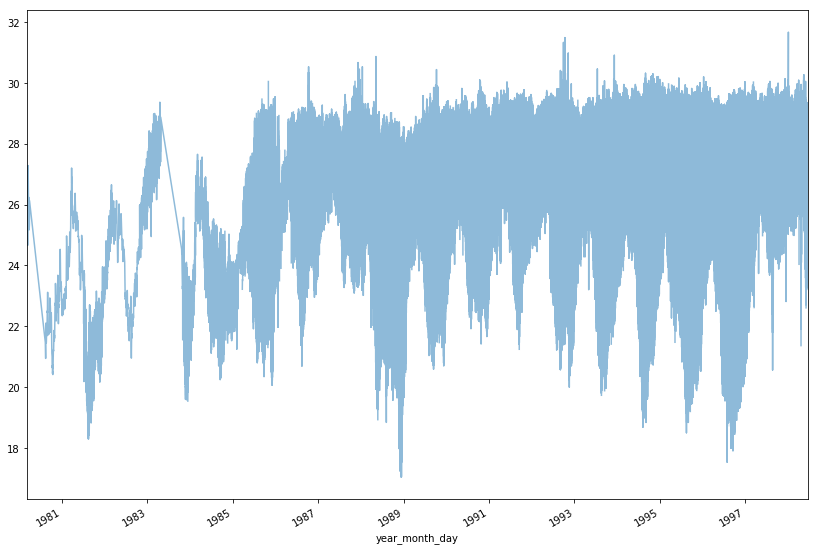

In [77]:
# Bonus - Visualization of correlation
nino.set_index('year_month_day').air_temp_.plot(figsize=(14,10), alpha=.5) #plot(kind='scatter', x='year_month_day', y='air_temp_')

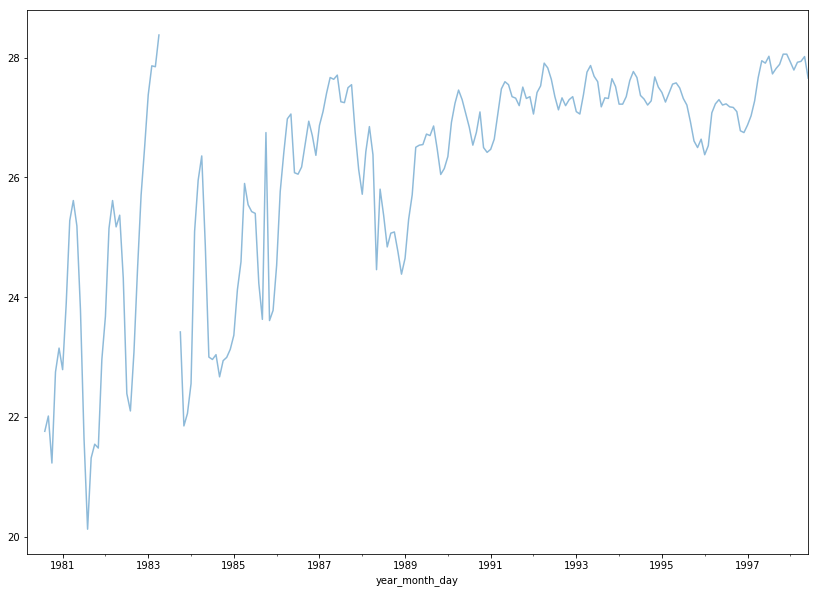

In [78]:
# Resample to see more clear
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliasescv
# (.resample returns a groupby so we need to call median on the air_temp_ column)
nino.set_index('year_month_day').resample('M').air_temp_.median().plot(
    figsize=(14,10), alpha=.5) #

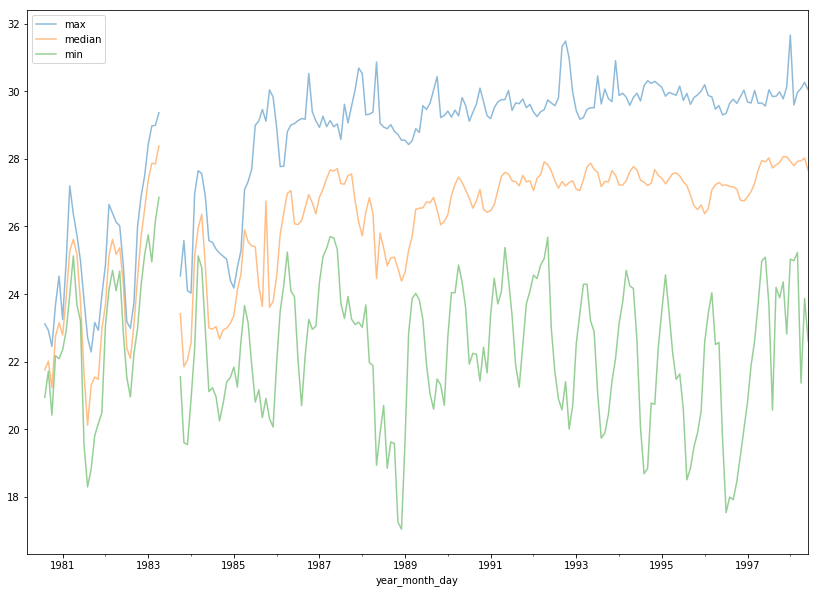

In [79]:
# Resample to see more clear
# http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliasescv
# (.resample returns a groupby so we need to call median on the air_temp_ column)
nino.set_index('year_month_day').resample('M').air_temp_.agg(['max', 'median', 'min']).plot(
    figsize=(14,10), alpha=.5) #

## Basic Stats Extra
* use the ``scatter_matrix`` function in ``pandas.plotting`` to create a correlation matrix (note this might take tens of seconds to run)

In [80]:
pd.plotting.scatter_matrix(nino)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112c9ad68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d847940>]], dtype=object)

# Plotting

Pandas has built-in integration with Matplotlib. Other libraries such as Seaborn also support plotting DataFrames and Series. This is not an in depth intro to Matplotlib, but their website and gallery are great for finding more information

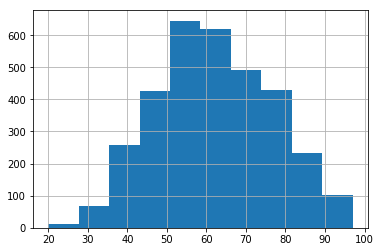

In [81]:
# histograms are a quick way to visualize the distribution
nyc.Mean_Humidity.hist()

In [82]:
# add in figsize=(width,height) to boost size
nyc.Mean_Humidity.hist(figsize=(14, 10))

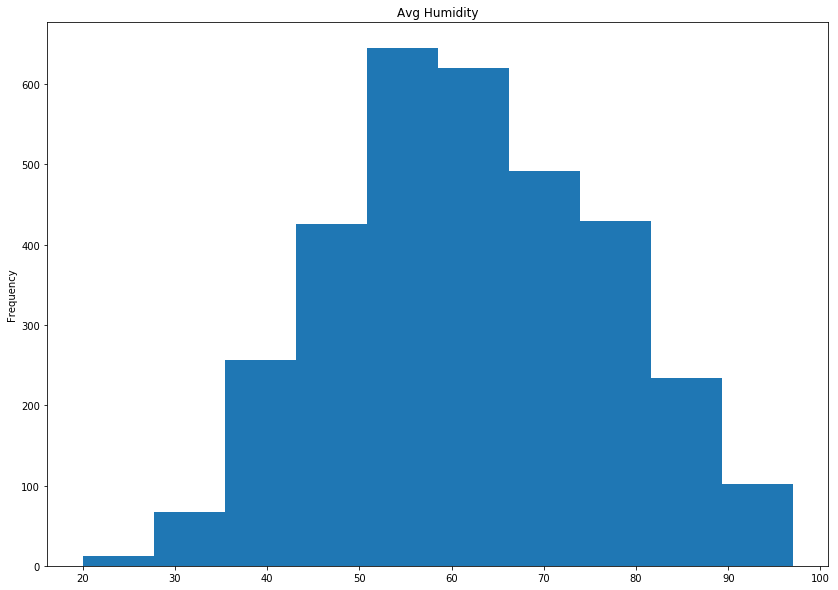

In [83]:
# If we use the .plot method we can add title and other attributes
nyc.Mean_Humidity.plot(kind='hist', title='Avg Humidity', figsize=(14, 10))

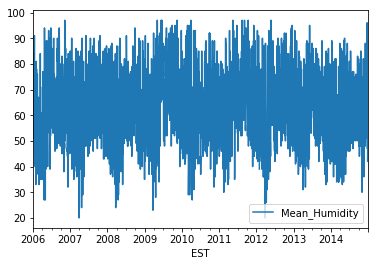

In [84]:
nyc.plot(x='EST', y='Mean_Humidity')

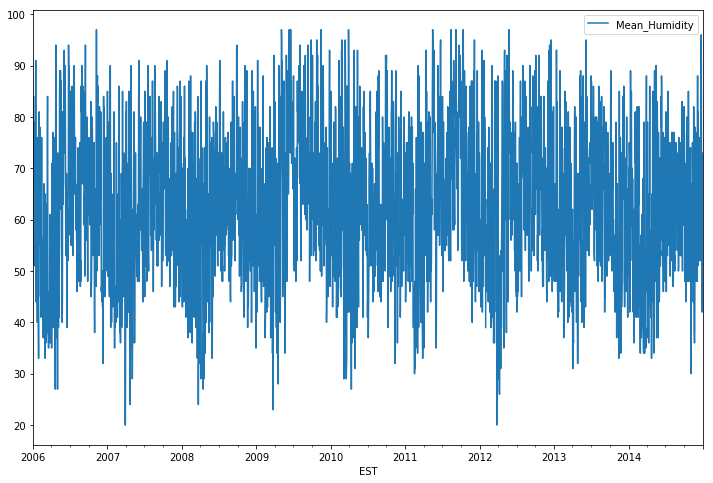

In [85]:
nyc.plot(x='EST', y='Mean_Humidity', figsize=(12, 8) )

In [86]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
nyc.set_index('EST').Mean_Humidity.resample('M').mean().plot(figsize=(10, 6)) 

In [87]:
# Can resample columns, since our index is a date we can use *Offset Aliases*
# see http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
nyc.set_index('EST').Mean_Humidity.resample('2W').mean().plot(figsize=(10, 6)) 

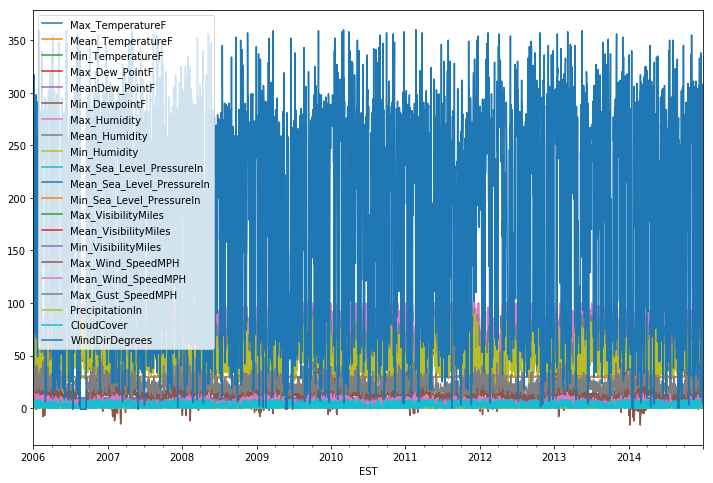

In [88]:
# Plot all the things (may be useful or just art)
nyc.set_index('EST').plot(figsize=(12,8))

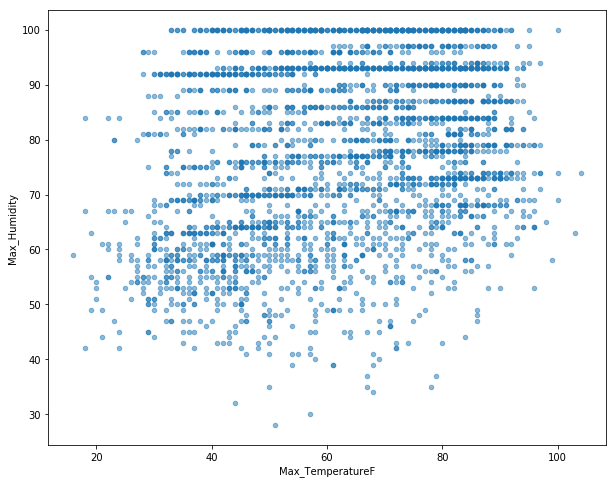

In [89]:
nyc.plot(x='Max_TemperatureF', y='Max_Humidity', kind='scatter', alpha=.5, 
        figsize=(10, 8))

In [90]:
nyc.Max_TemperatureF.corr(nyc.Max_Humidity)

0.27391561202292231

## Plotting Assignment
* Plot a histogram of air temp
* Plot a scatter plot of latitude and longitude


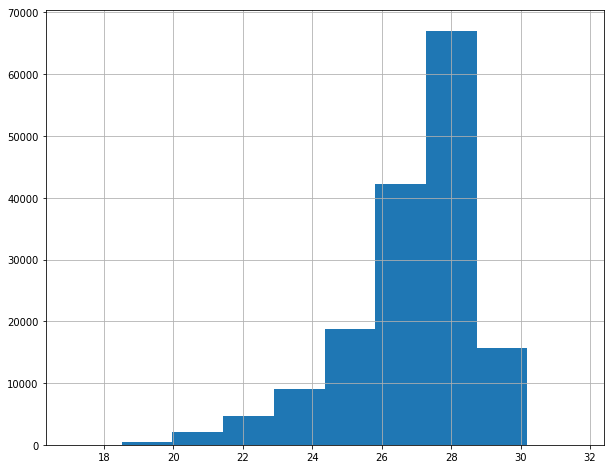

In [91]:
nino['air_temp_'].hist(figsize=(10,8))

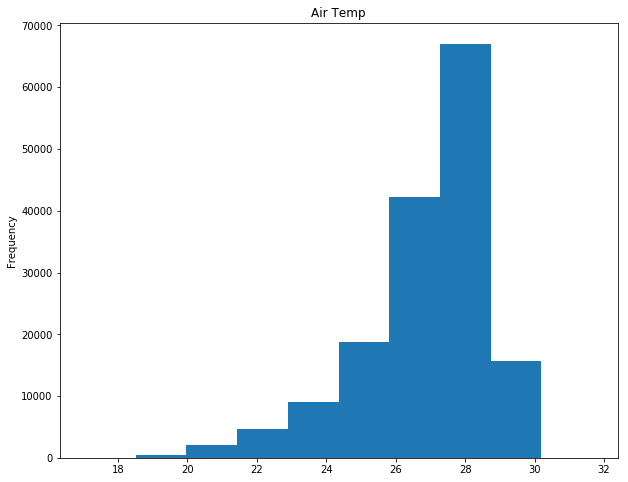

In [92]:
nino['air_temp_'].plot(kind='hist', title='Air Temp', figsize=(10,8))

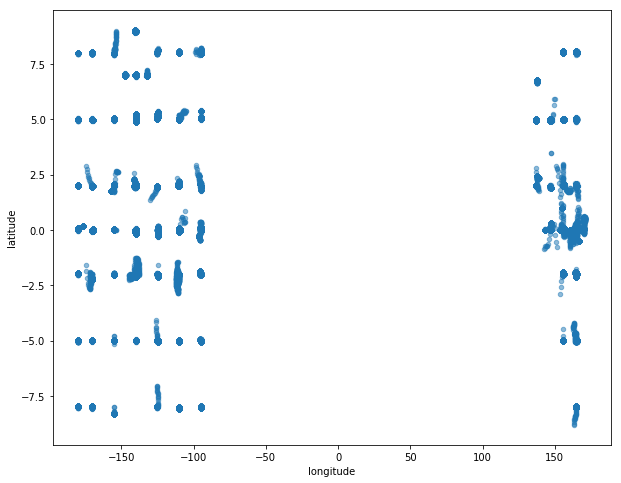

In [93]:
nino.plot(x='longitude', y='latitude', kind='scatter', figsize=(10, 8), alpha=.5)

TypeError: ufunc 'sqrt' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

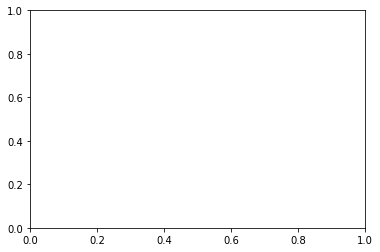

In [94]:
# try to see if we can size by air temp
nino.plot(x='longitude', y='latitude', kind='scatter', s='ait_temp_') 

In [7]:
nino['year'] = nino.year_month_day.dt.year

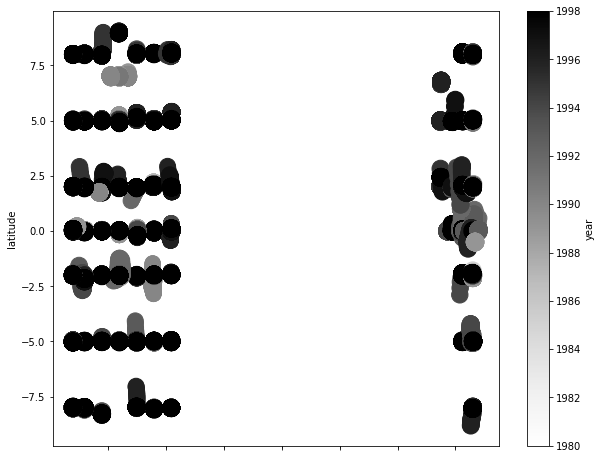

In [97]:
# whoops, need to provide an array of values
# we will also color by year
nino.plot(x='longitude', y='latitude', kind='scatter', 
          s=nino['air_temp_'].values*10, 
          c='year', 
          figsize=(10,8),
          colorbar=True)

# Filtering

In [98]:
# When we apply a conditional operator to a series we get back a series of True/False values
# We call this a "mask", which we can use to filter (similar to Photoshop)
# all EST in 2000's
m2000 = nyc.EST.dt.year >= 2000

# below 2010
lt2010 = nyc.EST.dt.year < 2010



In [99]:
# The "and" operation looks at whether the operands are truthy or falsey
# This is a case where normal Python syntax doesn't work
nyc[m2000 and lt2010]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [100]:
# & does bitwise comparisons - which is what we want
nyc[m2000 & lt2010]

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
0    2006-01-01              42.0               37.0              32.0   
1    2006-01-02              48.0               44.0              39.0   
2    2006-01-03              40.0               37.0              33.0   
3    2006-01-04              38.0               34.0              29.0   
4    2006-01-05              50.0               44.0              37.0   
5    2006-01-06              43.0               37.0              30.0   
6    2006-01-07              35.0               30.0              25.0   
7    2006-01-08              46.0               40.0              34.0   
8    2006-01-09              60.0               52.0              43.0   
9    2006-01-10              49.0               45.0              41.0   
10   2006-01-11              52.0               47.0              42.0   
11   2006-01-12              57.0               51.0              45.0   
12   2006-01-13              54.0               49.0              43.0   
13   2006-01-14              57.0               44.0              31.0   
14   2006-01-15              32.0               24.0              16.0   
15   2006-01-16              32.0               24.0              16.0   
16   2006-01-17              44.0               35.0              26.0   
17   2006-01-18              58.0               47.0              36.0   
18   2006-01-19              47.0               41.0              34.0   
19   2006-01-20              61.0               52.0              42.0   
20   2006-01-21              63.0               51.0              38.0   
21   2006-01-22              43.0               38.0              33.0   
22   2006-01-23              40.0               38.0              35.0   
23   2006-01-24              46.0               41.0              35.0   
24   2006-01-25              42.0               38.0              34.0   
25   2006-01-26              35.0               31.0              26.0   
26   2006-01-27              43.0               34.0              24.0   
27   2006-01-28              58.0               48.0              37.0   
28   2006-01-29              53.0               49.0              44.0   
29   2006-01-30              64.0               53.0              41.0   
...         ...               ...                ...               ...   
1431 2009-12-02              56.0               49.0              41.0   
1432 2009-12-03              66.0               59.0              51.0   
1433 2009-12-04              52.0               48.0              44.0   
1434 2009-12-05              45.0               39.0              33.0   
1435 2009-12-06              38.0               36.0              33.0   
1436 2009-12-07              39.0               36.0              32.0   
1437 2009-12-08              44.0               39.0              34.0   
1438 2009-12-09              53.0               43.0              33.0   
1439 2009-12-10              46.0               37.0              27.0   
1440 2009-12-11              29.0               25.0              21.0   
1441 2009-12-12              37.0               31.0              25.0   
1442 2009-12-13              52.0               43.0              34.0   
1443 2009-12-14              46.0               43.0              40.0   
1444 2009-12-15              52.0               47.0              42.0   
1445 2009-12-16              42.0               35.0              28.0   
1446 2009-12-17              31.0               26.0              20.0   
1447 2009-12-18              30.0               23.0              16.0   
1448 2009-12-19              30.0               26.0              21.0   
1449 2009-12-20              34.0               28.0              21.0   
1450 2009-12-21              36.0               32.0              28.0   
1451 2009-12-22              36.0               30.0              23.0   
1452 2009-12-23              30.0               25.0              20.0   
1453 2009-12-24 

In [101]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[nyc.EST.dt.year >= 2000 & nyc.EST.dt.year < 2010]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [102]:
# beware if you embed the operations, the bitwise operator binds more tightly to the integers
nyc[(nyc.EST.dt.year >= 2000) & (nyc.EST.dt.year < 2010)]

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
0    2006-01-01              42.0               37.0              32.0   
1    2006-01-02              48.0               44.0              39.0   
2    2006-01-03              40.0               37.0              33.0   
3    2006-01-04              38.0               34.0              29.0   
4    2006-01-05              50.0               44.0              37.0   
5    2006-01-06              43.0               37.0              30.0   
6    2006-01-07              35.0               30.0              25.0   
7    2006-01-08              46.0               40.0              34.0   
8    2006-01-09              60.0               52.0              43.0   
9    2006-01-10              49.0               45.0              41.0   
10   2006-01-11              52.0               47.0              42.0   
11   2006-01-12              57.0               51.0              45.0   
12   2006-01-13              54.0               49.0              43.0   
13   2006-01-14              57.0               44.0              31.0   
14   2006-01-15              32.0               24.0              16.0   
15   2006-01-16              32.0               24.0              16.0   
16   2006-01-17              44.0               35.0              26.0   
17   2006-01-18              58.0               47.0              36.0   
18   2006-01-19              47.0               41.0              34.0   
19   2006-01-20              61.0               52.0              42.0   
20   2006-01-21              63.0               51.0              38.0   
21   2006-01-22              43.0               38.0              33.0   
22   2006-01-23              40.0               38.0              35.0   
23   2006-01-24              46.0               41.0              35.0   
24   2006-01-25              42.0               38.0              34.0   
25   2006-01-26              35.0               31.0              26.0   
26   2006-01-27              43.0               34.0              24.0   
27   2006-01-28              58.0               48.0              37.0   
28   2006-01-29              53.0               49.0              44.0   
29   2006-01-30              64.0               53.0              41.0   
...         ...               ...                ...               ...   
1431 2009-12-02              56.0               49.0              41.0   
1432 2009-12-03              66.0               59.0              51.0   
1433 2009-12-04              52.0               48.0              44.0   
1434 2009-12-05              45.0               39.0              33.0   
1435 2009-12-06              38.0               36.0              33.0   
1436 2009-12-07              39.0               36.0              32.0   
1437 2009-12-08              44.0               39.0              34.0   
1438 2009-12-09              53.0               43.0              33.0   
1439 2009-12-10              46.0               37.0              27.0   
1440 2009-12-11              29.0               25.0              21.0   
1441 2009-12-12              37.0               31.0              25.0   
1442 2009-12-13              52.0               43.0              34.0   
1443 2009-12-14              46.0               43.0              40.0   
1444 2009-12-15              52.0               47.0              42.0   
1445 2009-12-16              42.0               35.0              28.0   
1446 2009-12-17              31.0               26.0              20.0   
1447 2009-12-18              30.0               23.0              16.0   
1448 2009-12-19              30.0               26.0              21.0   
1449 2009-12-20              34.0               28.0              21.0   
1450 2009-12-21              36.0               32.0              28.0   
1451 2009-12-22              36.0               30.0              23.0   
1452 2009-12-23              30.0               25.0              20.0   
1453 2009-12-24 

In [103]:
m_dec = nyc.EST.dt.month == 12
nyc[m_dec]

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
334  2006-12-01              70.0               60.0              49.0   
335  2006-12-02              49.0               44.0              39.0   
336  2006-12-03              46.0               41.0              35.0   
337  2006-12-04              41.0               36.0              31.0   
338  2006-12-05              37.0               33.0              29.0   
339  2006-12-06              49.0               40.0              31.0   
340  2006-12-07              53.0               40.0              26.0   
341  2006-12-08              29.0               24.0              18.0   
342  2006-12-09              38.0               31.0              24.0   
343  2006-12-10              54.0               45.0              35.0   
344  2006-12-11              57.0               51.0              45.0   
345  2006-12-12              49.0               47.0              44.0   
346  2006-12-13              55.0               52.0              49.0   
347  2006-12-14              57.0               52.0              46.0   
348  2006-12-15              52.0               48.0              44.0   
349  2006-12-16              51.0               46.0              41.0   
350  2006-12-17              56.0               49.0              42.0   
351  2006-12-18              59.0               52.0              44.0   
352  2006-12-19              45.0               41.0              36.0   
353  2006-12-20              45.0               40.0              34.0   
354  2006-12-21              54.0               46.0              38.0   
355  2006-12-22              49.0               44.0              39.0   
356  2006-12-23              59.0               54.0              48.0   
357  2006-12-24              52.0               48.0              43.0   
358  2006-12-25              45.0               42.0              39.0   
359  2006-12-26              53.0               48.0              43.0   
360  2006-12-27              43.0               41.0              38.0   
361  2006-12-28              48.0               42.0              36.0   
362  2006-12-29              48.0               43.0              37.0   
363  2006-12-30              47.0               41.0              34.0   
...         ...               ...                ...               ...   
3257 2014-12-02              43.0               39.0              35.0   
3258 2014-12-03              46.0               44.0              41.0   
3259 2014-12-04              45.0               41.0              37.0   
3260 2014-12-05              44.0               39.0              34.0   
3261 2014-12-06              50.0               45.0              39.0   
3262 2014-12-07              42.0               36.0              30.0   
3263 2014-12-08              37.0               31.0              24.0   
3264 2014-12-09              42.0               39.0              36.0   
3265 2014-12-10              40.0               36.0              32.0   
3266 2014-12-11              38.0               35.0              31.0   
3267 2014-12-12              38.0               35.0              32.0   
3268 2014-12-13              44.0               39.0              34.0   
3269 2014-12-14              46.0               42.0              38.0   
3270 2014-12-15              48.0               43.0              37.0   
3271 2014-12-16              49.0               44.0              38.0   
3272 2014-12-17              54.0               48.0              42.0   
3273 2014-12-18              42.0               40.0              37.0   
3274 2014-12-19              38.0               35.0              31.0   
3275 2014-12-20              33.0               32.0              30.0   
3276 2014-12-21              36.0               34.0              31.0   
3277 2014-12-22              44.0               40.0              35.0   
3278 2014-12-23              46.0               45.0              43.0   
3279 2014-12-24 

In [104]:
# Can use loc to filter out based on index value, also takes a boolean index
# In fact, you should use .loc instead as a matter of habit (you won't see warnings)
nyc.loc[m_dec]

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
334  2006-12-01              70.0               60.0              49.0   
335  2006-12-02              49.0               44.0              39.0   
336  2006-12-03              46.0               41.0              35.0   
337  2006-12-04              41.0               36.0              31.0   
338  2006-12-05              37.0               33.0              29.0   
339  2006-12-06              49.0               40.0              31.0   
340  2006-12-07              53.0               40.0              26.0   
341  2006-12-08              29.0               24.0              18.0   
342  2006-12-09              38.0               31.0              24.0   
343  2006-12-10              54.0               45.0              35.0   
344  2006-12-11              57.0               51.0              45.0   
345  2006-12-12              49.0               47.0              44.0   
346  2006-12-13              55.0               52.0              49.0   
347  2006-12-14              57.0               52.0              46.0   
348  2006-12-15              52.0               48.0              44.0   
349  2006-12-16              51.0               46.0              41.0   
350  2006-12-17              56.0               49.0              42.0   
351  2006-12-18              59.0               52.0              44.0   
352  2006-12-19              45.0               41.0              36.0   
353  2006-12-20              45.0               40.0              34.0   
354  2006-12-21              54.0               46.0              38.0   
355  2006-12-22              49.0               44.0              39.0   
356  2006-12-23              59.0               54.0              48.0   
357  2006-12-24              52.0               48.0              43.0   
358  2006-12-25              45.0               42.0              39.0   
359  2006-12-26              53.0               48.0              43.0   
360  2006-12-27              43.0               41.0              38.0   
361  2006-12-28              48.0               42.0              36.0   
362  2006-12-29              48.0               43.0              37.0   
363  2006-12-30              47.0               41.0              34.0   
...         ...               ...                ...               ...   
3257 2014-12-02              43.0               39.0              35.0   
3258 2014-12-03              46.0               44.0              41.0   
3259 2014-12-04              45.0               41.0              37.0   
3260 2014-12-05              44.0               39.0              34.0   
3261 2014-12-06              50.0               45.0              39.0   
3262 2014-12-07              42.0               36.0              30.0   
3263 2014-12-08              37.0               31.0              24.0   
3264 2014-12-09              42.0               39.0              36.0   
3265 2014-12-10              40.0               36.0              32.0   
3266 2014-12-11              38.0               35.0              31.0   
3267 2014-12-12              38.0               35.0              32.0   
3268 2014-12-13              44.0               39.0              34.0   
3269 2014-12-14              46.0               42.0              38.0   
3270 2014-12-15              48.0               43.0              37.0   
3271 2014-12-16              49.0               44.0              38.0   
3272 2014-12-17              54.0               48.0              42.0   
3273 2014-12-18              42.0               40.0              37.0   
3274 2014-12-19              38.0               35.0              31.0   
3275 2014-12-20              33.0               32.0              30.0   
3276 2014-12-21              36.0               34.0              31.0   
3277 2014-12-22              44.0               40.0              35.0   
3278 2014-12-23              46.0               45.0              43.0   
3279 2014-12-24 

In [105]:
# Can use loc to filter out based on index value, also takes a boolean index
# 2nd option in index op is column names (: to include everything)
nyc.loc[m_dec, [x for x in nyc.columns if 'Max' in x]]

Max_TemperatureF  Max_Dew_PointF  Max_Humidity  \
334               70.0            63.0          93.0   
335               49.0            28.0          57.0   
336               46.0            29.0          57.0   
337               41.0            25.0          59.0   
338               37.0            18.0          53.0   
339               49.0            35.0          61.0   
340               53.0            36.0          65.0   
341               29.0            14.0          51.0   
342               38.0            14.0          60.0   
343               54.0            25.0          39.0   
344               57.0            27.0          45.0   
345               49.0            41.0          71.0   
346               55.0            52.0          93.0   
347               57.0            45.0          93.0   
348               52.0            43.0          93.0   
349               51.0            33.0          60.0   
350               56.0            37.0          62.0   
351               59.0            46.0          67.0   
352               45.0            25.0          50.0   
353               45.0            25.0          61.0   
354               54.0            28.0          64.0   
355               49.0            47.0         100.0   
356               59.0            56.0         100.0   
357               52.0            34.0          60.0   
358               45.0            43.0          96.0   
359               53.0            48.0          93.0   
360               43.0            30.0          65.0   
361               48.0            30.0          59.0   
362               48.0            32.0          62.0   
363               47.0            35.0          65.0   
...                ...             ...           ...   
3257              43.0            40.0          89.0   
3258              46.0            43.0          92.0   
3259              45.0            24.0          59.0   
3260              44.0            41.0          89.0   
3261              50.0            47.0          96.0   
3262              42.0            35.0          92.0   
3263              37.0            30.0          75.0   
3264              42.0            38.0          92.0   
3265              40.0            36.0          89.0   
3266              38.0            26.0          75.0   
3267              38.0            23.0          61.0   
3268              44.0            28.0          64.0   
3269              46.0            29.0          70.0   
3270              48.0            34.0          70.0   
3271              49.0            43.0          86.0   
3272              54.0            43.0          92.0   
3273              42.0            25.0          59.0   
3274              38.0            25.0          63.0   
3275              33.0            21.0          63.0   
3276              36.0            29.0          82.0   
3277              44.0            42.0          89.0   
3278              46.0            44.0          96.0   
3279              58.0            57.0         100.0   
3280              62.0            60.0         100.0   
3281              50.0            29.0          64.0   
3282              55.0            35.0          53.0   
3283              54.0            43.0          92.0   
3284              44.0            25.0          53.0   
3285              34.0            17.0          58.0   
3286              32.0            12.0          55.0   

      Max_Sea_Level_PressureIn  Max_VisibilityMiles  Max_Wind_SpeedMPH  \
334                      29.96                 10.0               23.0   
335                      30.38                 10.0               21.0   
336                      30.47                 10.0               13.0   
337                      30.17                 10.0               18.0   
338                      30.40                 10.0               17.0   
339                      30.39                 10.0               17.0   
340            

In [106]:
# loc note:
# can use set_index and sort_index to do quick lookups (if you sort you get quick lookups)
nyc.set_index('Events').sort_index().head()

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
Events                                                                     
       2006-01-01              42.0               37.0              32.0   
       2011-04-29              69.0               62.0              54.0   
       2011-04-30              67.0               59.0              50.0   
       2011-05-01              69.0               60.0              50.0   
       2011-05-02              63.0               57.0              50.0   

        Max_Dew_PointF  MeanDew_PointF  Min_DewpointF  Max_Humidity  \
Events                                                                
                  32.0            30.0           28.0          85.0   
                  44.0            41.0           38.0          62.0   
                  41.0            37.0           33.0          64.0   
                  42.0            39.0           35.0          74.0   
                  50.0            45.0           39.0          83.0   

        Mean_Humidity  Min_Humidity       ...        Min_Sea_Level_PressureIn  \
Events                                    ...                                   
                 74.0          62.0       ...                           29.83   
                 49.0          35.0       ...                           29.68   
                 48.0          31.0       ...                           29.92   
                 53.0          32.0       ...                           30.23   
                 72.0          60.0       ...                           30.13   

        Max_VisibilityMiles  Mean_VisibilityMiles  Min_VisibilityMiles  \
Events                                                                   
                       10.0                  10.0                  8.0   
                       10.0                  10.0                 10.0   
                       10.0                  10.0                 10.0   
                       10.0                  10.0                 10.0   
                       10.0                  10.0                 10.0   

        Max_Wind_SpeedMPH  Mean_Wind_SpeedMPH  Max_Gust_SpeedMPH  \
Events                                                             
                      9.0                 3.0               10.0   
                     16.0                 7.0               23.0   
                     15.0                 5.0               22.0   
                     13.0                 5.0               18.0   
                     10.0                 5.0               16.0   

        PrecipitationIn  CloudCover  WindDirDegrees  
Events                                               
                    0.0         8.0           276.0  
                    0.0         4.0           262.0  
                    0.0         4.0            17.0  
                    0.0         0.0           133.0  
                    0.0         5.0           131.0  

[5 rows x 22 columns]

In [107]:
nyc.set_index('Events').sort_index().loc['Fog']

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
Events                                                                     
Fog    2013-01-13              50.0               47.0              43.0   
Fog    2006-05-27              82.0               72.0              64.0   
Fog    2009-03-02              28.0               22.0              16.0   
Fog    2011-03-22              50.0               45.0              40.0   
Fog    2011-05-24              81.0               74.0              66.0   
Fog    2006-03-13              62.0               56.0              50.0   
Fog    2012-11-12              66.0               57.0              48.0   
Fog    2012-10-03              73.0               68.0              63.0   
Fog    2007-07-30              86.0               78.0              70.0   
Fog    2011-04-26              83.0               69.0              54.0   
Fog    2011-12-05              59.0               53.0              47.0   
Fog    2013-05-29              82.0               70.0              58.0   
Fog    2014-11-12              65.0               56.0              47.0   
Fog    2013-05-20              79.0               69.0              58.0   
Fog    2012-03-22              78.0               67.0              56.0   

        Max_Dew_PointF  MeanDew_PointF  Min_DewpointF  Max_Humidity  \
Events                                                                
Fog               49.0            44.0           42.0         100.0   
Fog               65.0            62.0           58.0         100.0   
Fog               27.0            17.0            2.0          96.0   
Fog               39.0            32.0           26.0         100.0   
Fog               70.0            64.0           59.0         100.0   
Fog               52.0            50.0           48.0         100.0   
Fog               58.0            52.0           46.0         100.0   
Fog               68.0            66.0           63.0         100.0   
Fog               70.0            69.0           66.0          97.0   
Fog               64.0            58.0           54.0         100.0   
Fog               52.0            49.0           46.0         100.0   
Fog               66.0            61.0           57.0         100.0   
Fog               58.0            52.0           34.0          93.0   
Fog               65.0            60.0           57.0         100.0   
Fog               59.0            57.0           55.0         100.0   

        Mean_Humidity  Min_Humidity       ...        Min_Sea_Level_PressureIn  \
Events                                    ...                                   
Fog              93.0          86.0       ...                           30.01   
Fog              79.0          45.0       ...                           29.60   
Fog              75.0          54.0       ...                           29.83   
Fog              71.0          42.0       ...                           29.85   
Fog              76.0          51.0       ...                           29.54   
Fog              84.0          67.0       ...                           29.55   
Fog              84.0          67.0       ...                           30.19   
Fog              92.0          84.0       ...                           29.99   
Fog              74.0          51.0       ...                           29.90   
Fog              76.0          51.0       ...                           29.90   
Fog              89.0          77.0       ...                           30.20   
Fog              79.0          58.0       ...                           30.00   
Fog              68.0          43.0       ...                           29.87   
Fog              82.0          64.0       ...                           29.97   
Fog              77.0          54.0       ...                           30.09   

        Max_VisibilityMiles  Mean_VisibilityMiles  Min_VisibilityMiles  \
Events                                                       

In [108]:
# Can use iloc to filter out based on index location (or position)
# 2nd option in index op is column indices
nyc.iloc[5:10, [2, 5, -2]]  


Mean_TemperatureF  MeanDew_PointF Events
5               37.0            24.0       
6               30.0            14.0       
7               40.0            25.0       
8               52.0            36.0       
9               45.0            28.0

In [109]:
# Can use iloc to filter out based on index location
# 2nd option in index op is column indices
nyc.iloc[:, [2, 5, -2]]  


Mean_TemperatureF  MeanDew_PointF     Events
0                  37.0            30.0           
1                  44.0            34.0       Rain
2                  37.0            33.0       Rain
3                  34.0            26.0           
4                  44.0            35.0       Rain
5                  37.0            24.0           
6                  30.0            14.0           
7                  40.0            25.0           
8                  52.0            36.0           
9                  45.0            28.0           
10                 47.0            42.0       Rain
11                 51.0            36.0           
12                 49.0            43.0           
13                 44.0            49.0       Rain
14                 24.0            12.0   Fog-Snow
15                 24.0             5.0           
16                 35.0            21.0       Rain
17                 47.0            43.0       Rain
18                 41.0            21.0           
19                 52.0            32.0           
20                 51.0            32.0           
21                 38.0            16.0           
22                 38.0            35.0  Rain-Snow
23                 41.0            26.0           
24                 38.0            26.0           
25                 31.0            14.0           
26                 34.0            10.0           
27                 48.0            20.0           
28                 49.0            39.0       Rain
29                 53.0            43.0           
...                 ...             ...        ...
3257               39.0            30.0       Rain
3258               44.0            38.0       Rain
3259               41.0            21.0           
3260               39.0            33.0       Rain
3261               45.0            42.0       Rain
3262               36.0            18.0       Rain
3263               31.0            17.0           
3264               39.0            36.0       Rain
3265               36.0            31.0  Rain-Snow
3266               35.0            23.0       Snow
3267               35.0            21.0           
3268               39.0            25.0           
3269               42.0            29.0           
3270               43.0            29.0           
3271               44.0            39.0       Rain
3272               48.0            39.0       Rain
3273               40.0            23.0           
3274               35.0            21.0           
3275               32.0            19.0           
3276               34.0            25.0       Snow
3277               40.0            35.0       Rain
3278               45.0            42.0       Rain
3279               51.0            47.0       Rain
3280               53.0            40.0       Rain
3281               45.0            28.0           
3282               50.0            31.0           
3283               49.0            37.0       Rain
3284               39.0            19.0           
3285               31.0            13.0           
3286               30.0             8.0           

[3287 rows x 3 columns]

In [110]:
nyc.EST.describe()


count                    3287
unique                   3287
top       2007-09-10 00:00:00
freq                        1
first     2006-01-01 00:00:00
last      2014-12-31 00:00:00
Name: EST, dtype: object

## Filtering Assignment
* Create a mask, ``m80``, that all years >= 1980 and < 1990
* Create a mask, ``m90``, that all years >= 1990 and < 2000
* Create a mask, ``lon120``, that has all longitudes > 120
* Create a mask, ``lat0``, that has latitudes > -2 and < 2
* Create a dataframe, ``df80``, that has only those values in ``m80`` and ``lon120`` and ``lat0``
* Create a dataframe, ``df90``, that has only those values in ``m90`` and ``lon120`` and ``lat0``


In [13]:
m80 = (nino.year >= 1980) & (nino.year < 1990)
m90 = (nino.year >= 1990) & (nino.year < 2000)
lon120 = nino.longitude > 120
lat0 = (nino.latitude > -2) & (nino.latitude < 2)
df80 = nino[m80 & lon120 & lat0]
df90 = nino[m90 & lon120 & lat0]

In [14]:
df80

year_month_day    obs    date  latitude  longitude  zon.winds  \
22471     1986-04-21  22472  860421      0.05     164.99       -6.9   
22472     1986-04-22  22473  860422      0.05     164.98       -6.2   
22473     1986-04-23  22474  860423      0.05     164.99       -4.1   
22474     1986-04-24  22475  860424      0.05     164.99       -4.7   
22475     1986-04-25  22476  860425      0.04     164.99       -4.4   
22476     1986-04-26  22477  860426      0.05     165.00       -5.9   
22477     1986-04-27  22478  860427      0.05     164.99       -5.4   
22478     1986-04-28  22479  860428      0.05     165.00       -3.6   
22479     1986-04-29  22480  860429      0.04     164.98       -2.0   
22480     1986-04-30  22481  860430      0.05     164.99       -3.5   
22481     1986-05-01  22482  860501      0.05     164.99       -5.7   
22482     1986-05-02  22483  860502      0.04     164.99       -7.1   
22483     1986-05-03  22484  860503      0.04     165.01       -5.1   
22484     1986-05-04  22485  860504      0.04     165.01       -5.1   
22485     1986-05-05  22486  860505      0.04     165.00       -5.2   
22486     1986-05-06  22487  860506      0.05     165.00       -4.1   
22487     1986-05-07  22488  860507      0.04     164.98       -1.7   
22488     1986-05-08  22489  860508      0.04     165.00        0.4   
22489     1986-05-09  22490  860509      0.05     165.00        3.7   
22490     1986-05-10  22491  860510      0.05     165.01        4.4   
22491     1986-05-11  22492  860511      0.04     165.00        1.2   
22492     1986-05-12  22493  860512      0.04     165.00        4.9   
22493     1986-05-13  22494  860513      0.04     165.00        7.7   
22494     1986-05-14  22495  860514      0.05     164.99        9.0   
22495     1986-05-15  22496  860515      0.04     165.00        7.9   
22496     1986-05-16  22497  860516      0.05     165.01        6.3   
22497     1986-05-17  22498  860517      0.04     165.00        5.6   
22498     1986-05-18  22499  860518      0.04     165.00        0.2   
22499     1986-05-19  22500  860519      0.05     165.01       -6.4   
22500     1986-05-20  22501  860520      0.05     164.99       -5.0   
...              ...    ...     ...       ...        ...        ...   
83783     1988-10-04  83784  881004     -1.99     164.91       -5.2   
83784     1988-10-05  83785  881005     -1.99     164.91       -4.0   
83785     1988-10-06  83786  881006     -1.99     164.91       -4.4   
83786     1988-10-07  83787  881007     -1.99     164.91       -4.1   
83787     1988-10-08  83788  881008     -1.99     164.92       -1.8   
83788     1988-10-09  83789  881009     -1.99     164.93        0.6   
83795     1988-10-16  83796  881016     -1.99     164.91       -3.8   
83797     1988-10-18  83798  881018     -1.99     164.92       -4.7   
83798     1988-10-19  83799  881019     -1.99     164.92       -2.2   
83799     1988-10-20  83800  881020     -1.99     164.91       -1.5   
83802     1988-10-23  83803  881023     -1.99     164.93       -3.6   
83803     1988-10-24  83804  881024     -1.99     164.91       -3.8   
83823     1988-11-13  83824  881113     -1.99     164.92       -3.5   
83824     1988-11-14  83825  881114     -1.99     164.91       -4.7   
83825     1988-11-15  83826  881115     -1.99     164.91       -4.1   
83826     1988-11-16  83827  881116     -1.99     164.91       -6.1   
83827     1988-11-17  83828  881117     -1.99     164.91       -6.2   
83837     1988-11-27  83838  881127     -1.99     164.91       -3.3   
83838     1988-11-28  83839  881128     -1.99     164.92       -2.8   
83839     1988-11-29  83840  881129     -1.99     164.92       -2.1   
83840     1988-11-30  83841  881130     -1.99     164.92       -2.5   
83841     1988-12-01  83842  881201     -1.99     164.92       -4.6   
83842     1988-12-02  83843  881202     -1.99     164.92       -5.0   
83843     1988-12-03  83844  881203     -1.99     164.92       -3.5   
83844     1988-12-04  83845  8

In [15]:
df90

year_month_day    obs    date  latitude  longitude  zon.winds  \
15098     1992-04-26  15099  920426      0.03     143.03        0.7   
15099     1992-04-27  15100  920427      0.03     143.04       -0.6   
15100     1992-04-28  15101  920428      0.02     143.02       -2.1   
15101     1992-04-29  15102  920429      0.02     143.03       -1.1   
15102     1992-04-30  15103  920430      0.02     143.03       -0.4   
15103     1992-05-01  15104  920501      0.02     143.03       -0.4   
15104     1992-05-02  15105  920502      0.02     143.03       -1.7   
15105     1992-05-03  15106  920503      0.02     143.03       -2.4   
15106     1992-05-04  15107  920504      0.02     143.03       -1.5   
15107     1992-05-05  15108  920505      0.02     143.03       -2.5   
15108     1992-05-06  15109  920506      0.02     143.02       -0.3   
15109     1992-05-07  15110  920507      0.02     143.03       -0.1   
15110     1992-05-08  15111  920508      0.02     143.03       -1.8   
15111     1992-05-09  15112  920509      0.02     143.03       -0.8   
15112     1992-05-10  15113  920510      0.02     143.03       -1.2   
15113     1992-05-11  15114  920511      0.01     143.03        1.1   
15114     1992-05-12  15115  920512      0.02     143.03        2.2   
15115     1992-05-13  15116  920513      0.02     143.03       -0.6   
15116     1992-05-14  15117  920514      0.02     143.03       -0.3   
15117     1992-05-15  15118  920515      0.02     143.03       -0.3   
15118     1992-05-16  15119  920516      0.01     143.03       -0.2   
15119     1992-05-17  15120  920517      0.02     143.03       -0.7   
15120     1992-05-18  15121  920518      0.02     143.03        1.5   
15121     1992-05-19  15122  920519      0.02     143.03       -1.5   
15122     1992-05-20  15123  920520      0.02     143.03        0.1   
15123     1992-05-21  15124  920521      0.02     143.03        1.4   
15124     1992-05-22  15125  920522      0.02     143.04        3.3   
15125     1992-05-23  15126  920523      0.02     143.03        2.1   
15126     1992-05-24  15127  920524      0.02     143.03        1.1   
15127     1992-05-25  15128  920525      0.02     143.03       -3.7   
...              ...    ...     ...       ...        ...        ...   
87017     1998-05-02  87018  980502     -1.92     164.41       -3.9   
87018     1998-05-03  87019  980503     -1.91     164.41       -4.3   
87019     1998-05-04  87020  980504     -1.93     164.41       -4.0   
87020     1998-05-05  87021  980505     -1.92     164.41       -3.5   
87021     1998-05-06  87022  980506     -1.92     164.41       -3.7   
87022     1998-05-07  87023  980507     -1.92     164.41       -4.5   
87023     1998-05-08  87024  980508     -1.92     164.41       -3.4   
87024     1998-05-09  87025  980509     -1.92     164.41       -4.1   
87025     1998-05-10  87026  980510     -1.93     164.41       -1.7   
87026     1998-05-11  87027  980511     -1.92     164.41       -3.0   
87027     1998-05-12  87028  980512     -1.92     164.41       -5.1   
87028     1998-05-13  87029  980513     -1.93     164.41       -4.9   
87029     1998-05-14  87030  980514     -1.92     164.41       -5.9   
87030     1998-05-15  87031  980515     -1.92     164.41       -6.5   
87031     1998-05-16  87032  980516     -1.92     164.41       -6.7   
87032     1998-05-17  87033  980517     -1.93     164.42       -3.9   
87033     1998-05-18  87034  980518     -1.92     164.42       -0.6   
87034     1998-05-19  87035  980519     -1.92     164.42        1.5   
87035     1998-05-20  87036  980520     -1.92     164.43        1.3   
87036     1998-05-21  87037  980521     -1.92     164.42        1.2   
87037     1998-05-22  87038  980522     -1.92     164.41        0.5   
87038     1998-05-23  87039  980523     -1.92     164.41       -1.6   
87039     1998-05-24  87040  980524     -1.92     164.41       -2.0   
87040     1998-05-25  87041  980525     -1.92     164.42       -3.3   
87041     1998-05-26  87042  9

## Filtering Bonus Assignment
* Create a mask, ``m80_2``, that uses a function to filter years >= 1980 and < 1990
* Make sure that ``m80`` is created using operations
* Use the ``%%time`` *cell magic* to determine which is faster to calculate, ``m80`` or ``m80_2``

In [28]:
%%time
def lt1990(v):
    return v >= 1980 and v < 1990
m80_2 = nino.year.apply(lt1990)
nino[m80_2]

CPU times: user 53.6 ms, sys: 6.5 ms, total: 60.1 ms
Wall time: 58.9 ms


In [29]:
%%time
m80 = (nino.year >= 1980) & (nino.year < 1990)
nino[m80]


CPU times: user 4.78 ms, sys: 1.04 ms, total: 5.82 ms
Wall time: 5.58 ms


# Dealing with NaN

In [112]:
# find rows that have null data
# fish create a mask
nyc.isnull().any(axis=1)


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
3257    False
3258    False
3259    False
3260    False
3261    False
3262    False
3263    False
3264    False
3265    False
3266    False
3267    False
3268    False
3269    False
3270    False
3271    False
3272    False
3273    False
3274    False
3275    False
3276    False
3277    False
3278    False
3279    False
3280    False
3281    False
3282    False
3283    False
3284    False
3285    False
3286    False
Length: 3287, dtype: bool

In [113]:
nyc[nyc.isnull().any(axis=1)]

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
86   2006-03-28              55.0               49.0              43.0   
87   2006-03-29              63.0               52.0              41.0   
103  2006-04-14              66.0               60.0              53.0   
116  2006-04-27              73.0               60.0              48.0   
123  2006-05-04              82.0               66.0              53.0   
124  2006-05-05              80.0               72.0              64.0   
129  2006-05-10              69.0               60.0              53.0   
144  2006-05-25              75.0               66.0              57.0   
145  2006-05-26              73.0               66.0              59.0   
148  2006-05-29              88.0               76.0              66.0   
149  2006-05-30              88.0               78.0              68.0   
150  2006-05-31              75.0               68.0              64.0   
154  2006-06-04              68.0               62.0              57.0   
155  2006-06-05              71.0               65.0              59.0   
156  2006-06-06              72.0               64.0              59.0   
158  2006-06-08              66.0               60.0              57.0   
159  2006-06-09              75.0               66.0              60.0   
162  2006-06-12              73.0               65.0              57.0   
163  2006-06-13              81.0               72.0              63.0   
166  2006-06-16              84.0               74.0              64.0   
167  2006-06-17              82.0               76.0              70.0   
168  2006-06-18              91.0               81.0              72.0   
172  2006-06-22              87.0               78.0              69.0   
174  2006-06-24              73.0               71.0              69.0   
183  2006-07-03              87.0               80.0              73.0   
185  2006-07-05              79.0               74.0              68.0   
188  2006-07-08              82.0               76.0              70.0   
191  2006-07-11              88.0               80.0              73.0   
194  2006-07-14              87.0               76.0              69.0   
195  2006-07-15              82.0               77.0              72.0   
...         ...               ...                ...               ...   
1994 2011-06-18              83.0               74.0              64.0   
1996 2011-06-20              81.0               74.0              67.0   
2000 2011-06-24              70.0               68.0              65.0   
2120 2011-10-22              60.0               54.0              47.0   
2121 2011-10-23              59.0               55.0              50.0   
2173 2011-12-14              50.0               43.0              36.0   
2207 2012-01-17              53.0               45.0              36.0   
2219 2012-01-29               NaN                NaN               NaN   
2220 2012-01-30               NaN                NaN               NaN   
2241 2012-02-20              46.0               39.0              31.0   
2295 2012-04-14              72.0               61.0              50.0   
2335 2012-05-24              66.0               64.0              62.0   
2338 2012-05-27              81.0               73.0              64.0   
2374 2012-07-02              88.0               80.0              72.0   
2451 2012-09-17              78.0               68.0              57.0   
2676 2013-04-30              68.0               60.0              51.0   
2936 2014-01-15              45.0               40.0              34.0   
2937 2014-01-16              41.0               38.0              35.0   
2938 2014-01-17              45.0               39.0              32.0   
2939 2014-01-18              39.0               34.0              28.0   
2940 2014-01-19              36.0               31.0              25.0   
2941 2014-01-20              45.0               40.0              34.0   
2942 2014-01-21 

In [114]:
# Find columns with null values
nyc.isnull()

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
0     False             False              False             False   
1     False             False              False             False   
2     False             False              False             False   
3     False             False              False             False   
4     False             False              False             False   
5     False             False              False             False   
6     False             False              False             False   
7     False             False              False             False   
8     False             False              False             False   
9     False             False              False             False   
10    False             False              False             False   
11    False             False              False             False   
12    False             False              False             False   
13    False             False              False             False   
14    False             False              False             False   
15    False             False              False             False   
16    False             False              False             False   
17    False             False              False             False   
18    False             False              False             False   
19    False             False              False             False   
20    False             False              False             False   
21    False             False              False             False   
22    False             False              False             False   
23    False             False              False             False   
24    False             False              False             False   
25    False             False              False             False   
26    False             False              False             False   
27    False             False              False             False   
28    False             False              False             False   
29    False             False              False             False   
...     ...               ...                ...               ...   
3257  False             False              False             False   
3258  False             False              False             False   
3259  False             False              False             False   
3260  False             False              False             False   
3261  False             False              False             False   
3262  False             False              False             False   
3263  False             False              False             False   
3264  False             False              False             False   
3265  False             False              False             False   
3266  False             False              False             False   
3267  False             False              False             False   
3268  False             False              False             False   
3269  False             False              False             False   
3270  False             False              False             False   
3271  False             False              False             False   
3272  False             False              False             False   
3273  False             False              False             False   
3274  False             False              False             False   
3275  False             False              False             False   
3276  False             False              False             False   
3277  False             False              False             False   
3278  False             False              False             False   
3279  False             False              False             False   
3280  False             False              False             False   
3281  False             False              False             False   
3282  False       

In [115]:
# Find columns with null values
nyc.isnull().any()


EST                          False
Max_TemperatureF              True
Mean_TemperatureF             True
Min_TemperatureF              True
Max_Dew_PointF                True
MeanDew_PointF                True
Min_DewpointF                 True
Max_Humidity                  True
Mean_Humidity                 True
Min_Humidity                  True
Max_Sea_Level_PressureIn      True
Mean_Sea_Level_PressureIn     True
Min_Sea_Level_PressureIn      True
Max_VisibilityMiles           True
Mean_VisibilityMiles          True
Min_VisibilityMiles           True
Max_Wind_SpeedMPH             True
Mean_Wind_SpeedMPH            True
Max_Gust_SpeedMPH             True
PrecipitationIn               True
CloudCover                    True
Events                       False
WindDirDegrees                True
dtype: bool

In [116]:
missing_df = nyc.isnull() 
nyc[missing_df.Max_TemperatureF]

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
2219 2012-01-29               NaN                NaN               NaN   
2220 2012-01-30               NaN                NaN               NaN   

      Max_Dew_PointF  MeanDew_PointF  Min_DewpointF  Max_Humidity  \
2219             NaN             NaN            NaN           NaN   
2220             NaN             NaN            NaN           NaN   

      Mean_Humidity  Min_Humidity       ...        Max_VisibilityMiles  \
2219            NaN           NaN       ...                        NaN   
2220            NaN           NaN       ...                        NaN   

      Mean_VisibilityMiles  Min_VisibilityMiles  Max_Wind_SpeedMPH  \
2219                   NaN                  NaN                NaN   
2220                   NaN                  NaN                NaN   

      Mean_Wind_SpeedMPH  Max_Gust_SpeedMPH  PrecipitationIn  CloudCover  \
2219                 NaN                NaN              0.0         NaN   
2220                 NaN                NaN              NaN         NaN   

      Events  WindDirDegrees  
2219                     NaN  
2220                     NaN  

[2 rows x 23 columns]

In [117]:
nyc.Max_TemperatureF.fillna(nyc.Max_TemperatureF.mean()).iloc[2219:2222]


2219    62.930898
2220    62.930898
2221    55.000000
Name: Max_TemperatureF, dtype: float64

In [118]:
# The .interpolate method will do linear interpolation by default
nyc.Max_TemperatureF.interpolate().iloc[2219:2222]


2219    47.666667
2220    51.333333
2221    55.000000
Name: Max_TemperatureF, dtype: float64

In [119]:
#dropping rows with missing data
nyc.dropna()

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
0    2006-01-01              42.0               37.0              32.0   
1    2006-01-02              48.0               44.0              39.0   
2    2006-01-03              40.0               37.0              33.0   
3    2006-01-04              38.0               34.0              29.0   
4    2006-01-05              50.0               44.0              37.0   
5    2006-01-06              43.0               37.0              30.0   
6    2006-01-07              35.0               30.0              25.0   
7    2006-01-08              46.0               40.0              34.0   
8    2006-01-09              60.0               52.0              43.0   
9    2006-01-10              49.0               45.0              41.0   
10   2006-01-11              52.0               47.0              42.0   
11   2006-01-12              57.0               51.0              45.0   
12   2006-01-13              54.0               49.0              43.0   
13   2006-01-14              57.0               44.0              31.0   
14   2006-01-15              32.0               24.0              16.0   
15   2006-01-16              32.0               24.0              16.0   
16   2006-01-17              44.0               35.0              26.0   
17   2006-01-18              58.0               47.0              36.0   
18   2006-01-19              47.0               41.0              34.0   
19   2006-01-20              61.0               52.0              42.0   
20   2006-01-21              63.0               51.0              38.0   
21   2006-01-22              43.0               38.0              33.0   
22   2006-01-23              40.0               38.0              35.0   
23   2006-01-24              46.0               41.0              35.0   
24   2006-01-25              42.0               38.0              34.0   
25   2006-01-26              35.0               31.0              26.0   
26   2006-01-27              43.0               34.0              24.0   
27   2006-01-28              58.0               48.0              37.0   
28   2006-01-29              53.0               49.0              44.0   
29   2006-01-30              64.0               53.0              41.0   
...         ...               ...                ...               ...   
3257 2014-12-02              43.0               39.0              35.0   
3258 2014-12-03              46.0               44.0              41.0   
3259 2014-12-04              45.0               41.0              37.0   
3260 2014-12-05              44.0               39.0              34.0   
3261 2014-12-06              50.0               45.0              39.0   
3262 2014-12-07              42.0               36.0              30.0   
3263 2014-12-08              37.0               31.0              24.0   
3264 2014-12-09              42.0               39.0              36.0   
3265 2014-12-10              40.0               36.0              32.0   
3266 2014-12-11              38.0               35.0              31.0   
3267 2014-12-12              38.0               35.0              32.0   
3268 2014-12-13              44.0               39.0              34.0   
3269 2014-12-14              46.0               42.0              38.0   
3270 2014-12-15              48.0               43.0              37.0   
3271 2014-12-16              49.0               44.0              38.0   
3272 2014-12-17              54.0               48.0              42.0   
3273 2014-12-18              42.0               40.0              37.0   
3274 2014-12-19              38.0               35.0              31.0   
3275 2014-12-20              33.0               32.0              30.0   
3276 2014-12-21              36.0               34.0              31.0   
3277 2014-12-22              44.0               40.0              35.0   
3278 2014-12-23              46.0               45.0              43.0   
3279 2014-12-24 

## Dealing with NaN Assignment
* Find the rows that have null data
* Find the columns that have null data
* It looks like the ``zon_winds`` has some missing values, use summary stats or plotting to determine how to fill in those values

In [120]:
# Rows with null data
nino.isnull().any(axis=1)


0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
178050    False
178051    False
178052    False
178053    False
178054    False
178055    False
178056    False
178057    False
178058    False
178059    False
178060    False
178061    False
178062    False
178063    False
178064    False
178065    False
178066    False
178067    False
178068    False
178069    False
178070    False
178071    False
178072    False
178073    False
178074    False
178075    False
178076    False
178077    False
178078    False
178079     True
Length: 178080, dtype: 

In [121]:
# Columns with null data
nino.isnull().any(axis=0)


year_month_day    False
date              False
latitude          False
longitude         False
zon_winds          True
mer_winds          True
humidity           True
air_temp_          True
s_s_temp_          True
air_temp_F         True
zon_winds_mph      True
mer_winds_mph      True
year              False
dtype: bool

In [122]:
nino[nino.isnull().zon_winds].shape, nino.shape

((25163, 13), (178080, 13))

In [123]:
nino.zon_winds.describe()


count    152917.000000
mean         -3.304772
std           3.373492
min         -12.400000
25%          -5.800000
50%          -4.000000
75%          -1.400000
max          14.300000
Name: zon_winds, dtype: float64

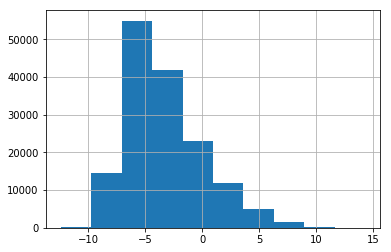

In [124]:
nino.zon_winds.hist()

In [125]:
nino[nino.isnull().zon_winds] = nino.zon_winds.median()

# Grouping

Pandas allows us to perform aggregates calculations over grouped portions of ``Series`` or ``DataFrames``. The ``.groupby`` method is the low level workhorse that enables this.

In [126]:
# We can group by a column, but if it has unique values it isn't useful
nyc.groupby('EST').mean()['CloudCover']


EST
2006-01-01    8.0
2006-01-02    5.0
2006-01-03    8.0
2006-01-04    3.0
2006-01-05    6.0
2006-01-06    7.0
2006-01-07    2.0
2006-01-08    3.0
2006-01-09    1.0
2006-01-10    1.0
2006-01-11    7.0
2006-01-12    0.0
2006-01-13    5.0
2006-01-14    8.0
2006-01-15    5.0
2006-01-16    0.0
2006-01-17    5.0
2006-01-18    7.0
2006-01-19    0.0
2006-01-20    0.0
2006-01-21    2.0
2006-01-22    1.0
2006-01-23    7.0
2006-01-24    1.0
2006-01-25    4.0
2006-01-26    1.0
2006-01-27    0.0
2006-01-28    0.0
2006-01-29    5.0
2006-01-30    4.0
             ... 
2014-12-02    7.0
2014-12-03    7.0
2014-12-04    0.0
2014-12-05    6.0
2014-12-06    8.0
2014-12-07    1.0
2014-12-08    6.0
2014-12-09    8.0
2014-12-10    8.0
2014-12-11    7.0
2014-12-12    6.0
2014-12-13    2.0
2014-12-14    4.0
2014-12-15    0.0
2014-12-16    7.0
2014-12-17    7.0
2014-12-18    6.0
2014-12-19    5.0
2014-12-20    8.0
2014-12-21    8.0
2014-12-22    8.0
2014-12-23    8.0
2014-12-24    8.0
2014-12-25    5.0
2014-

In [127]:
# Let's get the average cloud cover each month
nyc.groupby(nyc.EST.dt.month).mean()['CloudCover']


EST
1     3.583643
2     3.397638
3     3.530466
4     3.381481
5     3.301075
6     3.088889
7     2.268817
8     2.573477
9     2.811111
10    3.462366
11    3.411111
12    3.989247
Name: CloudCover, dtype: float64

In [128]:
# The previous aggregated over every month, 
# what if we want to group by year and month?
nyc.groupby([nyc.EST.dt.year, nyc.EST.dt.month]).mean()['CloudCover']


EST   EST
2006  1      3.677419
      2      3.035714
      3      2.483871
      4      2.600000
      5      3.161290
      6      3.800000
      7      1.580645
      8      2.548387
      9      3.166667
      10     3.387097
      11     4.133333
      12     3.064516
2007  1      4.096774
      2      2.785714
      3      3.258065
      4      4.700000
      5      1.903226
      6      2.500000
      7      2.161290
      8      2.774194
      9      1.600000
      10     3.548387
      11     3.633333
      12     4.709677
2008  1      3.161290
      2      4.310345
      3      3.677419
      4      3.800000
      5      3.322581
      6      2.366667
               ...   
2012  7      2.677419
      8      2.129032
      9      3.266667
      10     4.096774
      11     2.666667
      12     4.580645
2013  1      3.516129
      2      4.392857
      3      4.290323
      4      2.833333
      5      3.193548
      6      2.933333
      7      3.096774
      8      2.935484

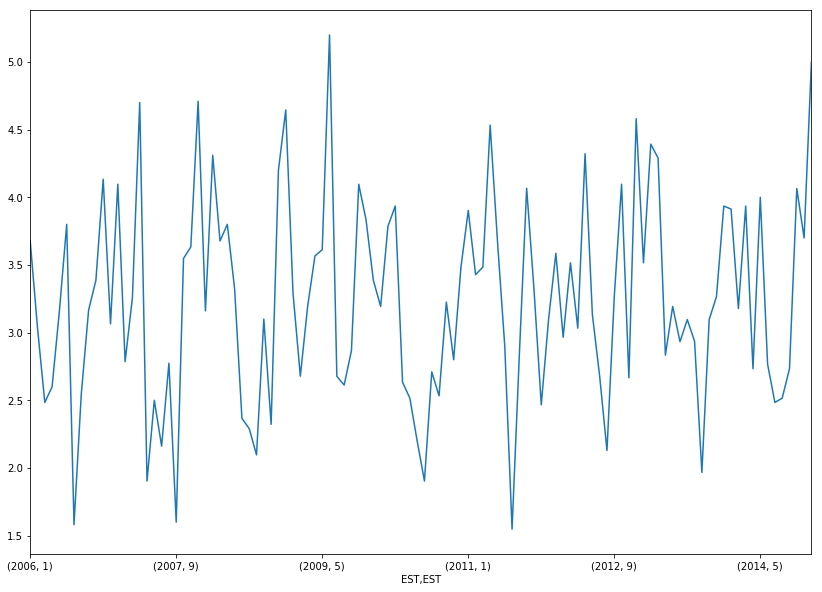

In [129]:
nyc.groupby([nyc.EST.dt.year, nyc.EST.dt.month]).mean(
)['CloudCover'].plot(figsize=(14,10))

In [130]:
# With the .agg method we can apply many functions
nyc.groupby([nyc.EST.dt.year, nyc.EST.dt.month]).agg(['mean', 'max', 'count'])

Max_TemperatureF              Mean_TemperatureF              \
                     mean    max count              mean   max count   
EST  EST                                                               
2006 1          47.548387   64.0    31         41.161290  53.0    31   
     2          42.321429   62.0    28         35.928571  54.0    28   
     3          50.129032   74.0    31         43.032258  61.0    31   
     4          64.866667   82.0    30         55.266667  70.0    30   
     5          71.387097   88.0    31         62.838710  78.0    31   
     6          77.233333   91.0    30         70.600000  81.0    30   
     7          84.935484   95.0    31         77.677419  86.0    31   
     8          82.838710   97.0    31         76.096774  90.0    31   
     9          73.066667   83.0    30         66.866667  75.0    30   
     10         63.290323   79.0    31         56.483871  71.0    31   
     11         57.400000   69.0    30         52.233333  64.0    30   
     12         49.516129   70.0    31         43.870968  60.0    31   
2007 1          43.580645   72.0    31         37.741935  63.0    31   
     2          34.500000   49.0    28         28.428571  44.0    28   
     3          50.935484   78.0    31         42.483871  64.0    31   
     4          57.933333   86.0    30         50.566667  72.0    30   
     5          75.290323   91.0    31         65.483871  78.0    31   
     6          79.566667   91.0    30         71.600000  82.0    30   
     7          82.322581   92.0    31         75.225806  84.0    31   
     8          81.419355   92.0    31         74.354839  84.0    31   
     9          78.000000   88.0    30         70.433333  80.0    30   
     10         70.548387   87.0    31         63.838710  77.0    31   
     11         51.566667   66.0    30         45.666667  58.0    30   
     12         41.580645   61.0    31         37.258065  51.0    31   
2008 1          42.419355   64.0    31         36.806452  59.0    31   
     2          43.137931   68.0    29         36.000000  55.0    29   
     3          50.290323   63.0    31         42.838710  54.0    31   
     4          63.533333   84.0    30         55.300000  71.0    30   
     5          68.935484   83.0    31         60.290323  72.0    31   
     6          82.566667   96.0    30         74.166667  86.0    30   
...                   ...    ...   ...               ...   ...   ...   
2012 7          87.258065  100.0    31         78.967742  87.0    31   
     8          84.161290   91.0    31         76.903226  83.0    31   
     9          75.866667   91.0    30         69.066667  83.0    30   
     10         63.709677   78.0    31         58.322581  70.0    31   
     11         49.700000   66.0    30         44.100000  57.0    30   
     12         46.322581   62.0    31         41.806452  55.0    31   
2013 1          40.838710   61.0    31         35.354839  49.0    31   
     2          39.357143   55.0    28         34.142857  46.0    28   
     3          46.290323   59.0    31         40.387097  50.0    31   
     4          61.300000   82.0    30         53.266667  67.0    30   
     5          71.193548   90.0    31         63.064516  83.0    31   
     6          80.300000   92.0    30         72.866667  83.0    30   
     7          86.322581   98.0    31         79.967742  90.0    31   
     8          81.548387   90.0    31         74.838710  81.0    31   
     9          76.333333   96.0    30         68.200000  87.0    30   
     10         66.903226   86.0    31         60.451613  76.0    31   
     11         52.100000   70.0    30         45.500000  65.0    30   
     12         44.451613   71.0    31         38.741935  66.0    31   
2014 1          35.225806   58.0    31         28.870968  48.0    31   
     2          37.500000   56.0    28         32.000000  49.0    28   
     3          45.516129   66.0    31         37.870968  56.0    31   
     4          61.233333   77.0    30         52

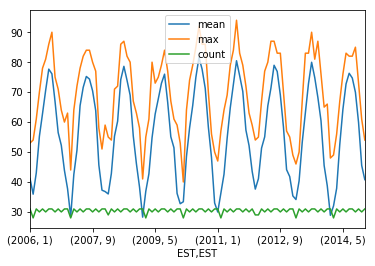

In [131]:
# Then plot
nyc.groupby([nyc.EST.dt.year, nyc.EST.dt.month]).agg(
    ['mean', 'max', 'count'])['Mean_TemperatureF'].plot()

In [132]:
# Or just look at a table for a column
nyc.groupby([nyc.EST.dt.year, nyc.EST.dt.month]).agg(
    ['mean', 'max', 'count'])['Max_TemperatureF']

mean    max  count
EST  EST                         
2006 1    47.548387   64.0     31
     2    42.321429   62.0     28
     3    50.129032   74.0     31
     4    64.866667   82.0     30
     5    71.387097   88.0     31
     6    77.233333   91.0     30
     7    84.935484   95.0     31
     8    82.838710   97.0     31
     9    73.066667   83.0     30
     10   63.290323   79.0     31
     11   57.400000   69.0     30
     12   49.516129   70.0     31
2007 1    43.580645   72.0     31
     2    34.500000   49.0     28
     3    50.935484   78.0     31
     4    57.933333   86.0     30
     5    75.290323   91.0     31
     6    79.566667   91.0     30
     7    82.322581   92.0     31
     8    81.419355   92.0     31
     9    78.000000   88.0     30
     10   70.548387   87.0     31
     11   51.566667   66.0     30
     12   41.580645   61.0     31
2008 1    42.419355   64.0     31
     2    43.137931   68.0     29
     3    50.290323   63.0     31
     4    63.533333   84.0     30
     5    68.935484   83.0     31
     6    82.566667   96.0     30
...             ...    ...    ...
2012 7    87.258065  100.0     31
     8    84.161290   91.0     31
     9    75.866667   91.0     30
     10   63.709677   78.0     31
     11   49.700000   66.0     30
     12   46.322581   62.0     31
2013 1    40.838710   61.0     31
     2    39.357143   55.0     28
     3    46.290323   59.0     31
     4    61.300000   82.0     30
     5    71.193548   90.0     31
     6    80.300000   92.0     30
     7    86.322581   98.0     31
     8    81.548387   90.0     31
     9    76.333333   96.0     30
     10   66.903226   86.0     31
     11   52.100000   70.0     30
     12   44.451613   71.0     31
2014 1    35.225806   58.0     31
     2    37.500000   56.0     28
     3    45.516129   66.0     31
     4    61.233333   77.0     30
     5    72.516129   86.0     31
     6    80.433333   89.0     30
     7    83.419355   91.0     31
     8    82.451613   90.0     31
     9    77.266667   92.0     30
     10   65.870968   77.0     31
     11   51.633333   69.0     30
     12   45.129032   65.0     31

[108 rows x 3 columns]

## Grouping Assignment
* Find the mean temperature for each year
* Find the count of entries for each year
* Find the max temperature for each year

In [30]:
nino.head().T

0                    1                    2  \
year_month_day  1980-03-07 00:00:00  1980-03-08 00:00:00  1980-03-09 00:00:00   
obs                               1                    2                    3   
date                         800307               800308               800309   
latitude                      -0.02                -0.02                -0.02   
longitude                   -109.46              -109.46              -109.46   
zon.winds                      -6.8                 -4.9                 -4.5   
mer.winds                       0.7                  1.1                  2.2   
humidity                        NaN                  NaN                  NaN   
air temp.                     26.14                25.66                25.69   
s.s.temp.                     26.24                25.97                25.28   
year                           1980                 1980                 1980   

                                  3                    4  
year_month_day  1980-03-10 00:00:00  1980-03-11 00:00:00  
obs                               4                    5  
date                         800310               800311  
latitude                      -0.02                -0.02  
longitude                   -109.46              -109.46  
zon.winds                      -3.8                 -4.2  
mer.winds                       1.9                  1.5  
humidity                        NaN                  NaN  
air temp.                     25.57                 25.3  
s.s.temp.                     24.31                23.19  
year                           1980                 1980

In [31]:
nino.groupby('year')['air temp.'].mean()


year
1980    22.774337
1981    22.454716
1982    24.640317
1983    25.320099
1984    23.810299
1985    24.913458
1986    26.217397
1987    27.098709
1988    25.203781
1989    26.062927
1990    26.664894
1991    27.043086
1992    27.097112
1993    27.112055
1994    27.058699
1995    26.814457
1996    26.633307
1997    27.571349
1998    27.805985
Name: air temp., dtype: float64

In [32]:
nino.groupby('year').count()

year_month_day    obs   date  latitude  longitude  zon.winds  mer.winds  \
year                                                                            
1980             166    166    166       166        166        166        166   
1981             545    545    545       545        545        545        545   
1982             505    505    505       505        505        493        493   
1983             406    406    406       406        406        294        294   
1984             947    947    947       947        947        885        885   
1985            1684   1684   1684      1684       1684        940        940   
1986            3780   3780   3780      3780       3780       2669       2669   
1987            4688   4688   4688      4688       4688       4432       4432   
1988            6136   6136   6136      6136       6136       5392       5393   
1989            7929   7929   7929      7929       7929       7295       7295   
1990            8437   8437   8437      8437       8437       6934       6934   
1991            8800   8800   8800      8800       8800       7988       7988   
1992           16011  16011  16011     16011      16011      13664      13664   
1993           20609  20609  20609     20609      20609      18018      18018   
1994           21351  21351  21351     21351      21351      18557      18557   
1995           21947  21947  21947     21947      21947      19239      19239   
1996           21825  21825  21825     21825      21825      17989      17989   
1997           22238  22238  22238     22238      22238      18579      18579   
1998           10076  10076  10076     10076      10076       8838       8838   

      humidity  air temp.  s.s.temp.  
year                                  
1980         0        166        158  
1981         0        545        323  
1982         0        505        431  
1983         0        404        343  
1984         0        903        694  
1985         0       1420       1188  
1986         0       3158       2326  
1987         0       3989       3155  
1988         0       5329       4916  
1989        62       6293       6400  
1990       742       7104       5904  
1991      3171       7722       7867  
1992      9982      14653      15080  
1993     15831      18366      19107  
1994     18252      19597      20689  
1995     17879      19848      20752  
1996     18964      20330      21179  
1997     18918      20304      21087  
1998      8518       9207       9474

In [33]:
nino.groupby('year')['air temp.'].max()


year
1980    27.28
1981    27.20
1982    27.50
1983    29.36
1984    27.65
1985    30.04
1986    30.52
1987    30.68
1988    30.86
1989    30.43
1990    30.09
1991    30.02
1992    31.48
1993    30.90
1994    30.31
1995    30.15
1996    30.19
1997    30.13
1998    31.66
Name: air temp., dtype: float64

# Pivoting

In [133]:
nyc.pivot_table(index=[nyc.EST.dt.year, nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF'])

amax               count_nonzero             
         Max_Dew_PointF Max_Humidity Max_Dew_PointF Max_Humidity
EST  EST                                                        
2006 1             55.0        100.0           31.0         31.0
     2             55.0        100.0           28.0         28.0
     3             52.0        100.0           31.0         31.0
     4             57.0        100.0           30.0         30.0
     5             68.0        100.0           31.0         31.0
     6             72.0        100.0           30.0         30.0
     7             76.0        100.0           31.0         31.0
     8             77.0        100.0           31.0         31.0
     9             70.0        100.0           30.0         30.0
     10            65.0        100.0           31.0         31.0
     11            63.0        100.0           30.0         30.0
     12            63.0        100.0           31.0         31.0
2007 1             61.0        100.0           30.0         31.0
     2             36.0         96.0           28.0         28.0
     3             54.0        100.0           31.0         31.0
     4             54.0        100.0           30.0         30.0
     5             66.0        100.0           31.0         31.0
     6             76.0        100.0           30.0         30.0
     7             73.0        100.0           31.0         31.0
     8             76.0        100.0           31.0         31.0
     9             72.0         97.0           30.0         30.0
     10            70.0        100.0           31.0         31.0
     11            59.0        100.0           30.0         30.0
     12            56.0        100.0           31.0         31.0
2008 1             54.0         96.0           31.0         31.0
     2             56.0        100.0           29.0         29.0
     3             55.0        100.0           31.0         31.0
     4             58.0        100.0           30.0         30.0
     5             70.0        100.0           31.0         31.0
     6             76.0        100.0           30.0         30.0
...                 ...          ...            ...          ...
2012 7             75.0        100.0           31.0         31.0
     8             75.0        100.0           31.0         31.0
     9             75.0        100.0           30.0         30.0
     10            68.0        100.0           31.0         31.0
     11            58.0        100.0           30.0         30.0
     12            57.0        100.0           31.0         31.0
2013 1             57.0        100.0           30.0         31.0
     2             43.0        100.0           28.0         28.0
     3             54.0        100.0           31.0         31.0
     4             61.0        100.0           30.0         30.0
     5             70.0        100.0           31.0         31.0
     6             73.0        100.0           30.0         30.0
     7             76.0        100.0           31.0         31.0
     8             75.0         97.0           31.0         31.0
     9             74.0         97.0           30.0         30.0
     10            69.0         93.0           31.0         31.0
     11            62.0         93.0           30.0         30.0
     12            60.0         93.0           31.0         31.0
2014 1             55.0        100.0           30.0         31.0
     2             45.0         96.0           28.0         28.0
     3             50.0        100.0           31.0         31.0
     4             57.0         93.0           30.0         30.0
     5             65.0         97.0           31.0         31.0
     6             70.0        100.0           30.0         30.0
     7             75.0        100.0           31.0         31.0
     8             73.0         94.0           31.0         31.0
     9             73.0         93.0           30.0         30.0
     10            68.0         93.0           31.0   

In [134]:
nyc.pivot_table(index=[nyc.EST.dt.year, nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).plot(figsize=(14,10))

In [135]:
# We can "unstack" to pull a left index into a column (0 is the left most index)
nyc.pivot_table(index=[nyc.EST.dt.year, nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).unstack(0)

amax                                                  \
    Max_Dew_PointF                                                   
EST           2006  2007  2008  2009  2010  2011  2012  2013  2014   
EST                                                                  
1             55.0  61.0  54.0  39.0  55.0  48.0  57.0  57.0  55.0   
2             55.0  36.0  56.0  51.0  37.0  54.0  43.0  43.0  45.0   
3             52.0  54.0  55.0  52.0  56.0  52.0  59.0  54.0  50.0   
4             57.0  54.0  58.0  57.0  61.0  65.0  58.0  61.0  57.0   
5             68.0  66.0  70.0  66.0  72.0  70.0  73.0  70.0  65.0   
6             72.0  76.0  76.0  70.0  73.0  74.0  72.0  73.0  70.0   
7             76.0  73.0  73.0  76.0  76.0  77.0  75.0  76.0  75.0   
8             77.0  76.0  72.0  77.0  75.0  75.0  75.0  75.0  73.0   
9             70.0  72.0  75.0  70.0  72.0  73.0  75.0  74.0  73.0   
10            65.0  70.0  63.0  66.0  71.0  67.0  68.0  69.0  68.0   
11            63.0  59.0  62.0  59.0  58.0  61.0  58.0  62.0  60.0   
12            63.0  56.0  57.0  61.0  58.0  61.0  57.0  60.0  60.0   

                  ...   count_nonzero                                       \
    Max_Humidity  ...  Max_Dew_PointF Max_Humidity                           
EST         2006  ...            2014         2006  2007  2008  2009  2010   
EST               ...                                                        
1          100.0  ...            30.0         31.0  31.0  31.0  31.0  31.0   
2          100.0  ...            28.0         28.0  28.0  29.0  28.0  28.0   
3          100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
4          100.0  ...            30.0         30.0  30.0  30.0  30.0  30.0   
5          100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
6          100.0  ...            30.0         30.0  30.0  30.0  30.0  30.0   
7          100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
8          100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
9          100.0  ...            30.0         30.0  30.0  30.0  30.0  30.0   
10         100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   
11         100.0  ...            30.0         30.0  30.0  30.0  30.0  30.0   
12         100.0  ...            31.0         31.0  31.0  31.0  31.0  31.0   

                             
                             
EST  2011  2012  2013  2014  
EST                          
1    31.0  31.0  31.0  31.0  
2    28.0  29.0  28.0  28.0  
3    31.0  31.0  31.0  31.0  
4    30.0  30.0  30.0  30.0  
5    31.0  31.0  31.0  31.0  
6    30.0  30.0  30.0  30.0  
7    31.0  31.0  31.0  31.0  
8    31.0  31.0  31.0  31.0  
9    30.0  30.0  30.0  30.0  
10   31.0  31.0  31.0  31.0  
11   30.0  30.0  30.0  30.0  
12   31.0  31.0  31.0  31.0  

[12 rows x 36 columns]

In [136]:
# We can "unstack" to pull a left index into a column (1 is the 2nd index)
nyc.pivot_table(index=[nyc.EST.dt.year, nyc.EST.dt.month], aggfunc=[np.max, np.count_nonzero],
               values=['Max_Humidity', 'Max_Dew_PointF']).unstack(1)

amax                                                        \
     Max_Dew_PointF                                                         
EST              1     2     3     4     5     6     7     8     9     10   
EST                                                                         
2006           55.0  55.0  52.0  57.0  68.0  72.0  76.0  77.0  70.0  65.0   
2007           61.0  36.0  54.0  54.0  66.0  76.0  73.0  76.0  72.0  70.0   
2008           54.0  56.0  55.0  58.0  70.0  76.0  73.0  72.0  75.0  63.0   
2009           39.0  51.0  52.0  57.0  66.0  70.0  76.0  77.0  70.0  66.0   
2010           55.0  37.0  56.0  61.0  72.0  73.0  76.0  75.0  72.0  71.0   
2011           48.0  54.0  52.0  65.0  70.0  74.0  77.0  75.0  73.0  67.0   
2012           57.0  43.0  59.0  58.0  73.0  72.0  75.0  75.0  75.0  68.0   
2013           57.0  43.0  54.0  61.0  70.0  73.0  76.0  75.0  74.0  69.0   
2014           55.0  45.0  50.0  57.0  65.0  70.0  75.0  73.0  73.0  68.0   

      ...  count_nonzero                                                        
      ...   Max_Humidity                                                        
EST   ...             3     4     5     6     7     8     9     10    11    12  
EST   ...                                                                       
2006  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2007  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2008  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2009  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2010  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2011  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2012  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2013  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  
2014  ...           31.0  30.0  31.0  30.0  31.0  31.0  30.0  31.0  30.0  31.0  

[9 rows x 48 columns]

In [137]:
# Just use one value and one aggregation
nyc.pivot_table(index=[nyc.EST.dt.year, nyc.EST.dt.month], aggfunc=[np.max],
               values=['Mean_TemperatureF']).unstack(1)

amax                                                        \
     Mean_TemperatureF                                                         
EST                 1     2     3     4     5     6     7     8     9     10   
EST                                                                            
2006              53.0  54.0  61.0  70.0  78.0  81.0  86.0  90.0  75.0  71.0   
2007              63.0  44.0  64.0  72.0  78.0  82.0  84.0  84.0  80.0  77.0   
2008              59.0  55.0  54.0  71.0  72.0  86.0  87.0  82.0  80.0  67.0   
2009              41.0  55.0  61.0  80.0  73.0  75.0  79.0  84.0  77.0  67.0   
2010              53.0  40.0  64.0  74.0  79.0  85.0  92.0  86.0  86.0  70.0   
2011              47.0  57.0  64.0  69.0  79.0  84.0  94.0  83.0  79.0  72.0   
2012              54.0  55.0  67.0  77.0  80.0  87.0  87.0  83.0  83.0  70.0   
2013              49.0  46.0  50.0  67.0  83.0  83.0  90.0  81.0  87.0  76.0   
2014              48.0  49.0  56.0  67.0  76.0  83.0  82.0  82.0  85.0  73.0   

                  
                  
EST     11    12  
EST               
2006  64.0  60.0  
2007  58.0  51.0  
2008  63.0  58.0  
2009  61.0  59.0  
2010  56.0  50.0  
2011  63.0  59.0  
2012  57.0  55.0  
2013  65.0  66.0  
2014  61.0  54.0

In [138]:
# Just use one value and one aggregation by year
nyc.pivot_table(index=[nyc.EST.dt.year, nyc.EST.dt.month], aggfunc=[np.max],
               values=['Mean_TemperatureF']).unstack(1).plot(figsize=(14,10))

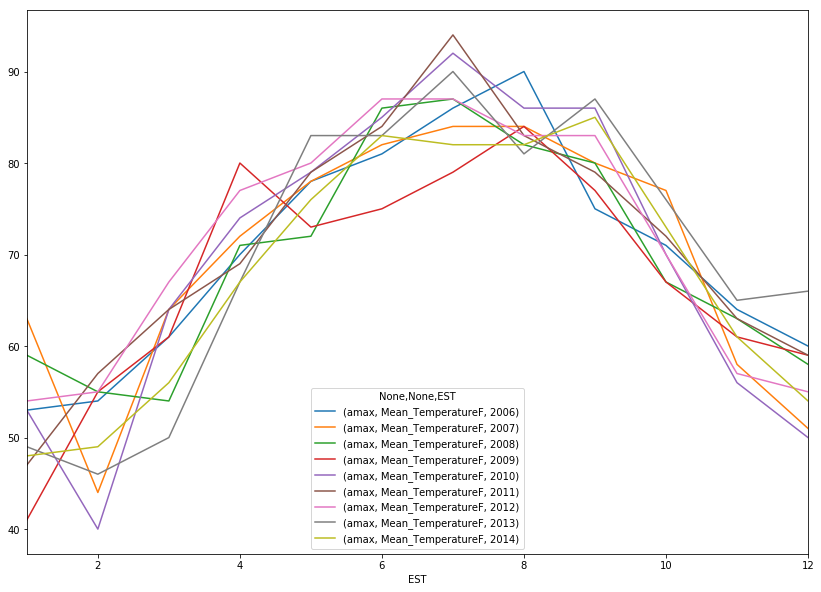

In [139]:
# Just use one value and one aggregation by month
nyc.pivot_table(index=[nyc.EST.dt.year, nyc.EST.dt.month], aggfunc=[np.max],
               values=['Mean_TemperatureF']).unstack(0).plot(figsize=(14,10))

## Pivoting Assignment
* Pivot the nino data using the ``.pivot_table`` method. Group by year and month, the ``air_temp`` column. Reduce using the ``max``, ``min``, and ``np.mean`` functions. (You will either need to create a month column or use ``year_month_day.dt.month``)
* Plot a line plot of the previous pivot table

In [140]:
nino.pivot_table(index=['year', nino.year_month_day.dt.month], 
                 aggfunc=[max, min, np.mean], values='air_temp_')

max       min       mean
                       air_temp_ air_temp_  air_temp_
year    year_month_day                               
-4.0    12                 -4.00     -4.00  -4.000000
 1980.0 3                  27.28     24.66  25.793478
        8                  23.12     20.95  21.878095
        9                  22.93     21.72  22.167000
        10                 22.45     20.42  21.278387
        11                 23.68     22.18  22.827333
        12                 24.53     22.09  23.173871
 1981.0 1                  23.25     22.35  22.801935
        2                  24.97     22.92  23.888214
        3                  27.20     23.98  25.377097
        4                  26.37     25.13  25.665000
        5                  25.75     23.69  25.087419
        6                  24.99     23.20  23.941000
        7                  23.83     19.54  21.821724
        8                  22.71     18.30  20.198387
        9                  22.29     18.83  20.814667
        10                 23.16     19.82  21.609516
        11                 22.93     20.17  21.533833
        12                 23.96     20.49  22.755645
 1982.0 1                  24.86     23.06  23.729032
        2                  26.65     24.14  25.163929
        3                  26.39     24.70  25.570217
        4                  26.13     24.10  25.203667
        5                  26.02     24.68  25.340645
        6                  24.87     22.88  24.055000
        7                  23.18     21.53  22.356452
        8                  22.99     20.96  22.091290
        9                  23.75     22.25  23.040667
        10                 25.99     22.97  24.534444
        11                 26.89     24.26  25.626833
...                          ...       ...        ...
 1996.0 1                  30.19     22.59  26.301149
        2                  29.87     23.43  26.698858
        3                  29.83     24.04  27.113449
        4                  29.33     23.30  27.156841
        5                  29.57     22.57  27.049942
        6                  29.30     19.75  26.677133
        7                  29.27     17.54  26.630329
        8                  29.64     18.00  26.499914
        9                  29.76     17.92  26.412837
        10                 29.64     18.46  26.256921
        11                 29.80     19.22  26.090593
        12                 30.03     20.02  26.227692
 1997.0 1                  29.68     21.78  26.570995
        2                  29.59     23.23  26.929494
        3                  30.02     22.62  27.262289
        4                  29.64     24.51  27.642186
        5                  29.65     24.98  27.918305
        6                  29.56     25.09  27.770775
        7                  29.48     23.69  27.839423
        8                  29.69     20.57  27.542679
        9                  29.48     24.20  27.597259
        10                 29.65     23.89  27.661423
        11                 29.77     24.36  27.860671
        12                 30.13     25.07  27.956226
 1998.0 1                  31.66     25.03  27.875507
        2                  29.59     24.99  27.792624
        3                  29.96     25.45  27.891605
        4                  30.08     24.04  27.926947
        5                  30.26     23.87  27.921824
        6                  30.04     22.61  27.212011

[212 rows x 3 columns]

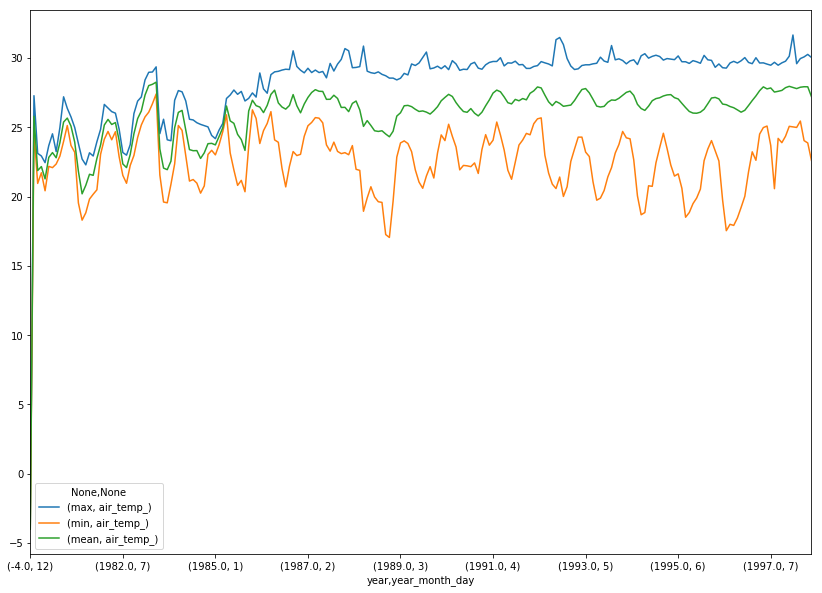

In [141]:
nino.pivot_table(index=['year', nino.year_month_day.dt.month], 
                 aggfunc=[max, min, np.mean], values='air_temp_').plot(
                figsize=(14,10))

## Pivoting Bonus Assignment
* Using ``.groupby`` we can sometimes perform the same operation as pivot tables. Pivot the nino data using the ``.groupby`` method. Group by year and month, the ``air_temp_`` column. Reduce using the ``max``, ``min``, and ``np.mean`` functions using ``.groupby``. (Hint: Use the ``.agg`` method on the result of the group by)
* Use ``.unstack`` to see the mean ``air_temp_`` by year

In [142]:
nino.groupby(['year', nino.year_month_day.dt.month]).agg(
    ['max', 'min', np.mean])['air_temp_'] 

max    min       mean
year    year_month_day                         
-4.0    12              -4.00  -4.00  -4.000000
 1980.0 3               27.28  24.66  25.793478
        8               23.12  20.95  21.878095
        9               22.93  21.72  22.167000
        10              22.45  20.42  21.278387
        11              23.68  22.18  22.827333
        12              24.53  22.09  23.173871
 1981.0 1               23.25  22.35  22.801935
        2               24.97  22.92  23.888214
        3               27.20  23.98  25.377097
        4               26.37  25.13  25.665000
        5               25.75  23.69  25.087419
        6               24.99  23.20  23.941000
        7               23.83  19.54  21.821724
        8               22.71  18.30  20.198387
        9               22.29  18.83  20.814667
        10              23.16  19.82  21.609516
        11              22.93  20.17  21.533833
        12              23.96  20.49  22.755645
 1982.0 1               24.86  23.06  23.729032
        2               26.65  24.14  25.163929
        3               26.39  24.70  25.570217
        4               26.13  24.10  25.203667
        5               26.02  24.68  25.340645
        6               24.87  22.88  24.055000
        7               23.18  21.53  22.356452
        8               22.99  20.96  22.091290
        9               23.75  22.25  23.040667
        10              25.99  22.97  24.534444
        11              26.89  24.26  25.626833
...                       ...    ...        ...
 1996.0 1               30.19  22.59  26.301149
        2               29.87  23.43  26.698858
        3               29.83  24.04  27.113449
        4               29.33  23.30  27.156841
        5               29.57  22.57  27.049942
        6               29.30  19.75  26.677133
        7               29.27  17.54  26.630329
        8               29.64  18.00  26.499914
        9               29.76  17.92  26.412837
        10              29.64  18.46  26.256921
        11              29.80  19.22  26.090593
        12              30.03  20.02  26.227692
 1997.0 1               29.68  21.78  26.570995
        2               29.59  23.23  26.929494
        3               30.02  22.62  27.262289
        4               29.64  24.51  27.642186
        5               29.65  24.98  27.918305
        6               29.56  25.09  27.770775
        7               29.48  23.69  27.839423
        8               29.69  20.57  27.542679
        9               29.48  24.20  27.597259
        10              29.65  23.89  27.661423
        11              29.77  24.36  27.860671
        12              30.13  25.07  27.956226
 1998.0 1               31.66  25.03  27.875507
        2               29.59  24.99  27.792624
        3               29.96  25.45  27.891605
        4               30.08  24.04  27.926947
        5               30.26  23.87  27.921824
        6               30.04  22.61  27.212011

[212 rows x 3 columns]

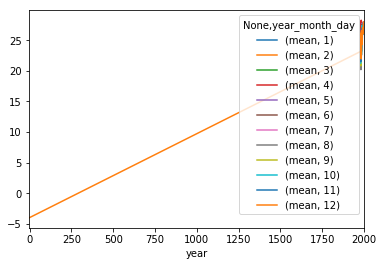

In [143]:
nino.groupby(['year', nino.year_month_day.dt.month]).agg(
    [np.mean])['air_temp_'].unstack(1).plot()

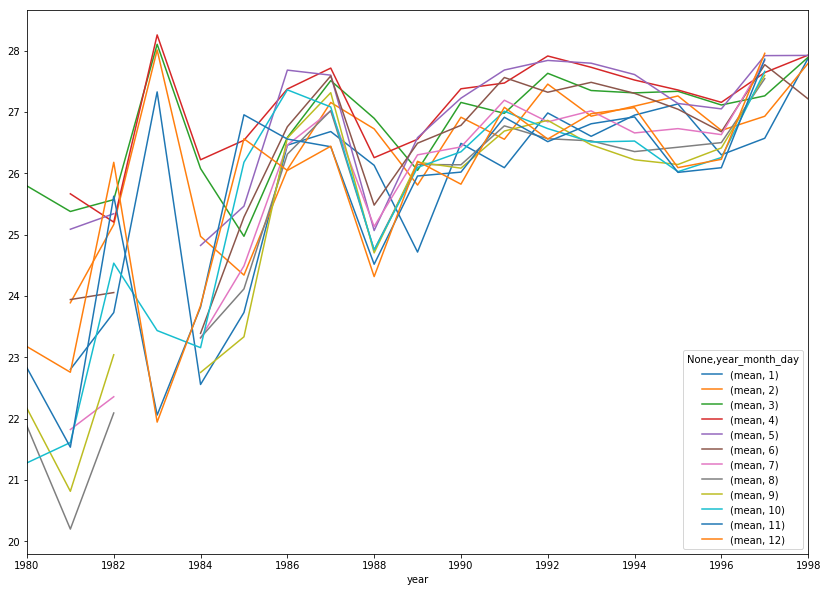

In [144]:
nino[nino.year > 1900].groupby(['year', nino.year_month_day.dt.month]).agg(
    [np.mean])['air_temp_'].unstack(1).plot(figsize=(14,10))

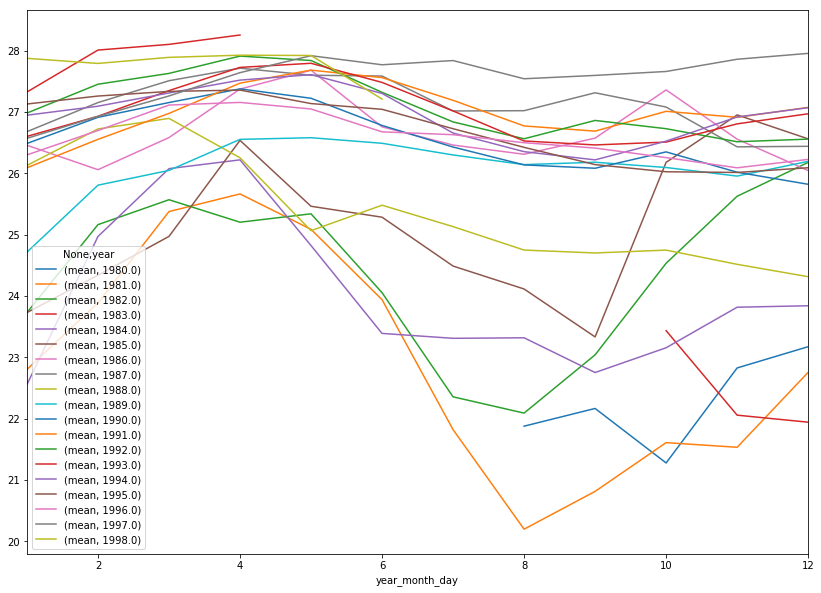

In [145]:
nino[nino.year > 1900].groupby(['year', nino.year_month_day.dt.month]).agg(
    [np.mean])['air_temp_'].unstack(0).plot(figsize=(14,10))

# Machine Learning

Pandas allows gives us easy integration with the sklearn library. Let's see if we can 
predict humidity (``y``) from the other columns (``X``).

We will train a Random Forest with a sample of our data, then test it with another sample to see how it performs.

In [146]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [147]:
nyc.columns

Index(['EST', 'Max_TemperatureF', 'Mean_TemperatureF', 'Min_TemperatureF',
       'Max_Dew_PointF', 'MeanDew_PointF', 'Min_DewpointF', 'Max_Humidity',
       'Mean_Humidity', 'Min_Humidity', 'Max_Sea_Level_PressureIn',
       'Mean_Sea_Level_PressureIn', 'Min_Sea_Level_PressureIn',
       'Max_VisibilityMiles', 'Mean_VisibilityMiles', 'Min_VisibilityMiles',
       'Max_Wind_SpeedMPH', 'Mean_Wind_SpeedMPH', 'Max_Gust_SpeedMPH',
       'PrecipitationIn', 'CloudCover', 'Events', 'WindDirDegrees'],
      dtype='object')

In [148]:
# Shift Humidity down to predict next day
pd.concat([nyc.Mean_Humidity, nyc.Mean_Humidity.shift(1)], axis=1)

Mean_Humidity  Mean_Humidity
0              74.0            NaN
1              71.0           74.0
2              84.0           71.0
3              72.0           84.0
4              71.0           72.0
5              60.0           71.0
6              51.0           60.0
7              56.0           51.0
8              60.0           56.0
9              52.0           60.0
10             79.0           52.0
11             63.0           79.0
12             81.0           63.0
13             91.0           81.0
14             62.0           91.0
15             44.0           62.0
16             59.0           44.0
17             69.0           59.0
18             47.0           69.0
19             49.0           47.0
20             53.0           49.0
21             40.0           53.0
22             76.0           40.0
23             54.0           76.0
24             65.0           54.0
25             47.0           65.0
26             40.0           47.0
27             33.0           40.0
28             66.0           33.0
29             70.0           66.0
...             ...            ...
3257           67.0           62.0
3258           73.0           67.0
3259           48.0           73.0
3260           69.0           48.0
3261           88.0           69.0
3262           62.0           88.0
3263           51.0           62.0
3264           81.0           51.0
3265           74.0           81.0
3266           62.0           74.0
3267           57.0           62.0
3268           54.0           57.0
3269           60.0           54.0
3270           58.0           60.0
3271           76.0           58.0
3272           73.0           76.0
3273           52.0           73.0
3274           56.0           52.0
3275           57.0           56.0
3276           73.0           57.0
3277           82.0           73.0
3278           91.0           82.0
3279           96.0           91.0
3280           69.0           96.0
3281           53.0           69.0
3282           47.0           53.0
3283           73.0           47.0
3284           42.0           73.0
3285           47.0           42.0
3286           43.0           47.0

[3287 rows x 2 columns]

In [149]:
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
# Shift Humidity down to predict next day
X = nyc[[x for x in nyc.columns if 'Humid' not in x]]
y = nyc.Mean_Humidity.shift(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [150]:
# Create a model 
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)



ValueError: could not convert string to float: 

In [151]:
# Need to make "Dummy" variables from Events column
nyc_dummy = pd.get_dummies(nyc, columns=['Events'])
nyc_dummy.head()

EST  Max_TemperatureF  Mean_TemperatureF  Min_TemperatureF  \
0 2006-01-01              42.0               37.0              32.0   
1 2006-01-02              48.0               44.0              39.0   
2 2006-01-03              40.0               37.0              33.0   
3 2006-01-04              38.0               34.0              29.0   
4 2006-01-05              50.0               44.0              37.0   

   Max_Dew_PointF  MeanDew_PointF  Min_DewpointF  Max_Humidity  Mean_Humidity  \
0            32.0            30.0           28.0          85.0           74.0   
1            38.0            34.0           29.0          92.0           71.0   
2            38.0            33.0           26.0          92.0           84.0   
3            36.0            26.0           19.0          85.0           72.0   
4            38.0            35.0           32.0          92.0           71.0   

   Min_Humidity         ...           WindDirDegrees  Events_  Events_Fog  \
0          62.0         ...                    276.0        1           0   
1          49.0         ...                     76.0        0           0   
2          75.0         ...                     39.0        0           0   
3          59.0         ...                     70.0        1           0   
4          50.0         ...                    251.0        0           0   

   Events_Fog-Rain  Events_Fog-Rain-Snow  Events_Fog-Snow  Events_Rain  \
0                0                     0                0            0   
1                0                     0                0            1   
2                0                     0                0            1   
3                0                     0                0            0   
4                0                     0                0            1   

   Events_Rain-Snow  Events_Snow  Events_Thunderstorm  
0                 0            0                    0  
1                 0            0                    0  
2                 0            0                    0  
3                 0            0                    0  
4                 0            0                    0  

[5 rows x 31 columns]

In [152]:
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
X = nyc_dummy[[x for x in nyc_dummy.columns if 'Humid' not in x]]
y = nyc_dummy.Mean_Humidity.shift(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [153]:
X.T

0                    1     \
EST                        2006-01-01 00:00:00  2006-01-02 00:00:00   
Max_TemperatureF                            42                   48   
Mean_TemperatureF                           37                   44   
Min_TemperatureF                            32                   39   
Max_Dew_PointF                              32                   38   
MeanDew_PointF                              30                   34   
Min_DewpointF                               28                   29   
Max_Sea_Level_PressureIn                  30.2                30.24   
Mean_Sea_Level_PressureIn                30.03                30.15   
Min_Sea_Level_PressureIn                 29.83                29.93   
Max_VisibilityMiles                         10                   10   
Mean_VisibilityMiles                        10                    8   
Min_VisibilityMiles                          8                    4   
Max_Wind_SpeedMPH                            9                   18   
Mean_Wind_SpeedMPH                           3                    5   
Max_Gust_SpeedMPH                           10                   24   
PrecipitationIn                              0                 0.63   
CloudCover                                   8                    5   
WindDirDegrees                             276                   76   
Events_                                      1                    0   
Events_Fog                                   0                    0   
Events_Fog-Rain                              0                    0   
Events_Fog-Rain-Snow                         0                    0   
Events_Fog-Snow                              0                    0   
Events_Rain                                  0                    1   
Events_Rain-Snow                             0                    0   
Events_Snow                                  0                    0   
Events_Thunderstorm                          0                    0   

                                          2                    3     \
EST                        2006-01-03 00:00:00  2006-01-04 00:00:00   
Max_TemperatureF                            40                   38   
Mean_TemperatureF                           37                   34   
Min_TemperatureF                            33                   29   
Max_Dew_PointF                              38                   36   
MeanDew_PointF                              33                   26   
Min_DewpointF                               26                   19   
Max_Sea_Level_PressureIn                 30.05                30.09   
Mean_Sea_Level_PressureIn                29.93                29.96   
Min_Sea_Level_PressureIn                 29.83                29.79   
Max_VisibilityMiles                         10                   10   
Mean_VisibilityMiles                         7                   10   
Min_VisibilityMiles                          2                    4   
Max_Wind_SpeedMPH                           28                   15   
Mean_Wind_SpeedMPH                          15                    7   
Max_Gust_SpeedMPH                           41                   20   
PrecipitationIn                           1.13                    0   
CloudCover                                   8                    3   
WindDirDegrees                              39                   70   
Events_                                      0                    1   
Events_Fog                                   0                    0   
Events_Fog-Rain                              0                    0   
Events_Fog-Rain-Snow                         0                    0   
Events_Fog-Snow                              0                    0   
Events_Rain                                  1                    0   
Events_Rain-Snow                             0                    0   
Events_Snow                                  0                   

In [154]:
# Create a model (whoops data needs to be floats)
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)



TypeError: float() argument must be a string or a number, not 'Timestamp'

In [155]:
# Need to remove timestamp
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
    return 'Humid' not in col and 'EST' not in col
X = nyc_dummy[[x for x in nyc_dummy.columns if valid(x)]]
y = nyc_dummy.Mean_Humidity.shift(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [156]:
# Create a model 
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)



ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [157]:
# Need to remove NA
# Regression - Try to predict Mean_Humidity (y) from non humidity columns (X)
# Get training set (X_train)
def valid(col):
    return 'Humid' not in col and 'EST' not in col
nyc_dummy = nyc_dummy.dropna()
X = nyc_dummy[[x for x in nyc_dummy.columns if valid(x)]].iloc[1:]
y = nyc_dummy.Mean_Humidity.shift(1).dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [158]:
# Create a model 
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [159]:
# Get R2 measure (indicator of accuracy 1 is perfect 0 is horrible)
rf_model.score(X_test, y_test)

0.3562061388889517

In [160]:
type(y_test)

pandas.core.series.Series

In [161]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

0  Mean_Humidity
0    61.4           47.0
1    53.4           59.0
2    63.3           71.0
3    49.5           47.0
4    53.1           77.0
5    54.9           65.0
6    61.2           67.0
7    60.2           64.0
8    71.1           73.0
9    65.6           53.0
10   52.6           49.0
11   75.8           71.0
12   60.0           50.0
13   73.4           74.0
14   72.8           91.0
15   49.9           51.0
16   68.4           54.0
17   47.0           62.0
18   60.2           64.0
19   62.7           53.0
20   56.8           56.0
21   51.0           31.0
22   48.8           46.0
23   66.9           60.0
24   69.7           83.0
25   57.4           40.0
26   46.6           43.0
27   66.4           81.0
28   62.9           51.0
29   55.3           66.0
..    ...            ...
764  52.8           44.0
765  64.3           49.0
766  66.9           54.0
767  67.4           79.0
768  79.3           84.0
769  78.2           80.0
770  77.0           91.0
771  63.3           69.0
772  59.1           61.0
773  56.7           71.0
774  48.4           41.0
775  47.8           64.0
776  46.3           48.0
777  48.8           48.0
778  76.8           63.0
779  59.8           55.0
780  66.3           85.0
781  71.0           78.0
782  60.6           62.0
783  48.4           51.0
784  55.2           52.0
785  59.2           63.0
786  58.4           80.0
787  80.9           72.0
788  72.3           70.0
789  73.7           65.0
790  66.8           88.0
791  77.4           68.0
792  51.6           39.0
793  62.8           76.0

[794 rows x 2 columns]

In [162]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('Max_Dew_PointF', 0.14953228301662783),
 ('Min_DewpointF', 0.11764905160694469),
 ('WindDirDegrees', 0.093517104395916345),
 ('Min_Sea_Level_PressureIn', 0.082659446552322574),
 ('Max_TemperatureF', 0.078141984905771206),
 ('Max_Sea_Level_PressureIn', 0.063172755535206418),
 ('MeanDew_PointF', 0.056291331387023115),
 ('Min_TemperatureF', 0.042050388819334553),
 ('Mean_Sea_Level_PressureIn', 0.040340626769935911),
 ('Max_Gust_SpeedMPH', 0.036919915677102892),
 ('Mean_TemperatureF', 0.036231238819004773),
 ('CloudCover', 0.034648492945207436),
 ('Mean_VisibilityMiles', 0.034024414050374173),
 ('Max_Wind_SpeedMPH', 0.033104252565273662),
 ('Mean_Wind_SpeedMPH', 0.031757581344492102),
 ('PrecipitationIn', 0.030008682405904603),
 ('Min_VisibilityMiles', 0.027867402876082425),
 ('Events_Rain', 0.0036681179586609005),
 ('Max_VisibilityMiles', 0.0027966229674440389),
 ('Events_', 0.0020286391676834579),
 ('Events_Fog-Rain', 0.0014038573267167115),
 ('Events_Fog-Snow', 0.001210694257606179),


## Machine Learning Assignment
* Using the nino dataset, see if you can predict what the temperature (``air_temp_F``) will be for the next day 

In [163]:
nino.T

0                    1                    2       \
year_month_day  1980-03-07 00:00:00  1980-03-08 00:00:00  1980-03-09 00:00:00   
date                         800307               800308               800309   
latitude                      -0.02                -0.02                -0.02   
longitude                   -109.46              -109.46              -109.46   
zon_winds                      -6.8                 -4.9                 -4.5   
mer_winds                       0.7                  1.1                  2.2   
humidity                        NaN                  NaN                  NaN   
air_temp_                     26.14                25.66                25.69   
s_s_temp_                     26.24                25.97                25.28   
air_temp_F                   79.052               78.188               78.242   
zon_winds_mph              -15.2116             -10.9613             -10.0665   
mer_winds_mph                1.5659               2.4607               4.9214   
year                           1980                 1980                 1980   

                             3                    4                    5       \
year_month_day  1980-03-10 00:00:00  1980-03-11 00:00:00  1980-03-12 00:00:00   
date                         800310               800311               800312   
latitude                      -0.02                -0.02                -0.02   
longitude                   -109.46              -109.46              -109.46   
zon_winds                      -3.8                 -4.2                 -4.4   
mer_winds                       1.9                  1.5                  0.3   
humidity                        NaN                  NaN                  NaN   
air_temp_                     25.57                 25.3                24.72   
s_s_temp_                     24.31                23.19                23.64   
air_temp_F                   78.026                77.54               76.496   
zon_winds_mph               -8.5006              -9.3954              -9.8428   
mer_winds_mph                4.2503               3.3555               0.6711   
year                           1980                 1980                 1980   

                             6                    7                    8       \
year_month_day  1980-03-13 00:00:00  1980-03-14 00:00:00  1980-03-15 00:00:00   
date                         800313               800314               800315   
latitude                      -0.02                -0.02                -0.02   
longitude                   -109.46              -109.46              -109.46   
zon_winds                      -3.2                 -3.1                   -3   
mer_winds                       0.1                  0.6                    1   
humidity                        NaN                  NaN                  NaN   
air_temp_                     24.66                25.17                25.59   
s_s_temp_                     24.34                24.14                24.24   
air_temp_F                   76.388               77.306               78.062   
zon_winds_mph               -7.1584              -6.9347               -6.711   
mer_winds_mph                0.2237               1.3422                2.237   
year                           1980                 1980                 1980   

                             9                   ...                \
year_month_day  1980-03-16 00:00:00              ...                 
date                         800316              ...                 
latitude                      -0.02              ...                 
longitude                   -109.46              ...                 
zon_winds                      -1.2              ...                 
mer_winds                         1              ...                 
humidity                        NaN              ...                 
air_temp_                     26.71              ...            

In [164]:
y = nino.air_temp_F.shift()
y


0            NaN
1         79.052
2         78.188
3         78.242
4         78.026
5         77.540
6         76.496
7         76.388
8         77.306
9         78.062
10        80.078
11        81.104
12        80.348
13        79.484
14        79.142
15        78.944
16        79.232
17        78.890
18        78.206
19        77.702
20        77.306
21        77.450
22        77.630
23        79.034
24        70.664
25        70.286
26        69.998
27        69.710
28        71.168
29        71.798
           ...  
178050    80.546
178051    80.618
178052    80.762
178053    81.104
178054    81.104
178055    81.032
178056    81.320
178057    81.176
178058    80.060
178059    81.248
178060    81.176
178061    80.762
178062    80.276
178063    79.916
178064    80.402
178065    81.392
178066    79.916
178067    81.680
178068    82.166
178069    81.950
178070    81.950
178071    81.878
178072    82.238
178073    82.166
178074    81.608
178075    81.536
178076    78.872
178077    78.

In [165]:
X = nino #nyc_dummy[[x for x in nyc_dummy.columns if 'Humid' not in x]]
y = nino.air_temp_F.shift() #nyc_dummy.Mean_Humidity.shift(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [166]:
# Create a model 
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [ ]:
X = nino[[x for x in nino.columns if x != 'year_month_day']] 
y = nino.air_temp_F.shift(1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [167]:
# Create a model 
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

TypeError: float() argument must be a string or a number, not 'Timestamp'

In [168]:
X = nino[[x for x in nino.columns if x != 'year_month_day']].fillna(0)
y = nino.air_temp_F.shift(1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [169]:
# Create a model 
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [170]:
X[np.isinf(X)].any()


date             False
latitude         False
longitude        False
zon_winds        False
mer_winds        False
humidity         False
air_temp_        False
s_s_temp_        False
air_temp_F       False
zon_winds_mph    False
mer_winds_mph    False
year             False
dtype: bool

In [171]:
X[np.isnan(X)].any()


date             False
latitude         False
longitude        False
zon_winds        False
mer_winds        False
humidity         False
air_temp_        False
s_s_temp_        False
air_temp_F       False
zon_winds_mph    False
mer_winds_mph    False
year             False
dtype: bool

In [172]:
np.isnan(y)


0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
178050    False
178051    False
178052    False
178053    False
178054    False
178055    False
178056    False
178057    False
178058    False
178059    False
178060    False
178061    False
178062    False
178063    False
178064    False
178065    False
178066    False
178067    False
178068    False
178069    False
178070    False
178071    False
178072    False
178073    False
178074    False
178075    False
178076    False
178077    False
178078    False
178079    False
Name: air_temp_F, Lengt

In [173]:
X = nino[[x for x in nino.columns if x != 'year_month_day']].fillna(0).iloc[1:]
y = nino.air_temp_F.shift(1).iloc[1:].fillna(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Create a model 
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [174]:
rf_model.score(X_test, y_test)

0.85868449344197473

In [175]:
sorted(zip(X.columns, rf_model.feature_importances_),
        key=lambda x: x[1], reverse=True)

[('air_temp_F', 0.4569108431045491),
 ('air_temp_', 0.45535301699714853),
 ('date', 0.017847800586938387),
 ('s_s_temp_', 0.015685121872361429),
 ('humidity', 0.0098803070005559906),
 ('longitude', 0.0091521191291376834),
 ('latitude', 0.0085337778065496007),
 ('zon_winds_mph', 0.0062679731202558483),
 ('zon_winds', 0.0062275015205750846),
 ('mer_winds', 0.0062220660054400651),
 ('mer_winds_mph', 0.0059965045283915837),
 ('year', 0.0019229683280967825)]

In [176]:
pd.concat([pd.Series(rf_model.predict(X_test)), y_test.reset_index(
drop=True)], axis=1)

0  air_temp_F
0      81.771800      82.004
1      75.104600      75.218
2      81.572000      82.094
3       0.692122      -4.000
4      58.270000      72.752
5      77.829800      77.684
6      77.702000      77.594
7      82.369400      80.816
8      76.665200      77.054
9      78.486800      81.716
10     66.563600      74.930
11     82.968800      81.770
12     82.518800      83.426
13     70.818800      70.628
14     79.300400      79.376
15     77.743400      77.810
16     73.551200      72.932
17     70.482200      78.908
18     81.357800      83.066
19      0.692122      -4.000
20     82.367600      83.012
21      0.692122      -4.000
22     80.979800      81.464
23     81.107600      80.726
24      0.692122      -4.000
25     74.638400      83.282
26     72.226800      79.556
27     66.866400      84.758
28     83.026400      83.264
29     79.370600      79.178
...          ...         ...
44490  84.410600      84.812
44491  82.164200      80.798
44492   0.692122      -4.000
44493   0.000000       0.000
44494   0.692122      -4.000
44495  82.693400      82.742
44496  81.390200      82.886
44497  83.213600      84.326
44498  74.206800      80.456
44499  84.417800      84.200
44500   0.000000       0.000
44501  71.324600      72.896
44502  78.112400      77.792
44503  83.060600      80.762
44504  75.844400      76.082
44505  81.624200      79.754
44506  77.388800      77.990
44507  75.826400      75.776
44508  81.516200      81.878
44509  77.696600      76.766
44510  79.887200      79.034
44511  65.931800      73.508
44512  78.418400      78.332
44513  -0.400000       0.000
44514   0.000000       0.000
44515  69.735200      69.188
44516   0.692122      -4.000
44517  75.182000      74.750
44518  83.019200      83.822
44519  75.585200      75.758

[44520 rows x 2 columns]

# More Stacking

In [177]:
# We briefly talked about stacking in the pivot section, here we will
# dive in a little more.
# Vehicle data - https://www.fueleconomy.gov/feg/download.shtml
# Datasets for All Model Years (1984–2018)
auto = pd.read_csv('https://www.fueleconomy.gov/feg/epadata/vehicles.csv.zip')

/Users/matt/.env/36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [178]:
auto.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  15.695714         0.0        0.0        0.0      19      0.0        0   
1  29.964545         0.0        0.0        0.0       9      0.0        0   
2  12.207778         0.0        0.0        0.0      23      0.0        0   
3  29.964545         0.0        0.0        0.0      10      0.0        0   
4  17.347895         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE    ...     mfrCode  c240Dscr  charge240b  \
0       0.0     0.0    0.0    ...         NaN       NaN         0.0   
1       0.0     0.0    0.0    ...         NaN       NaN         0.0   
2       0.0     0.0    0.0    ...         NaN       NaN         0.0   
3       0.0     0.0    0.0    ...         NaN       NaN         0.0   
4       0.0     0.0    0.0    ...         NaN       NaN         0.0   

   c240bDscr                     createdOn                    modifiedOn  \
0        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
1        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
2        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
3        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   
4        NaN  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013   

   startStop  phevCity  phevHwy  phevComb  
0        NaN         0        0         0  
1        NaN         0        0         0  
2        NaN         0        0         0  
3        NaN         0        0         0  
4        NaN         0        0         0  

[5 rows x 83 columns]

In [179]:
auto.head().T

0                             1  \
barrels08                             15.6957                       29.9645   
barrelsA08                                  0                             0   
charge120                                   0                             0   
charge240                                   0                             0   
city08                                     19                             9   
city08U                                     0                             0   
cityA08                                     0                             0   
cityA08U                                    0                             0   
cityCD                                      0                             0   
cityE                                       0                             0   
cityUF                                      0                             0   
co2                                        -1                            -1   
co2A                                       -1                            -1   
co2TailpipeAGpm                             0                             0   
co2TailpipeGpm                         423.19                       807.909   
comb08                                     21                            11   
comb08U                                     0                             0   
combA08                                     0                             0   
combA08U                                    0                             0   
combE                                       0                             0   
combinedCD                                  0                             0   
combinedUF                                  0                             0   
cylinders                                   4                            12   
displ                                       2                           4.9   
drive                        Rear-Wheel Drive              Rear-Wheel Drive   
engId                                    9011                         22020   
eng_dscr                                (FFS)                     (GUZZLER)   
feScore                                    -1                            -1   
fuelCost08                               1900                          3650   
fuelCostA08                                 0                             0   
...                                       ...                           ...   
rangeCity                                   0                             0   
rangeCityA                                  0                             0   
rangeHwy                                    0                             0   
rangeHwyA                                   0                             0   
trany                            Manual 5-spd                  Manual 5-spd   
UCity                                 23.3333                            11   
UCityA                                      0                             0   
UHighway                                   35                            19   
UHighwayA                                   0                             0   
VClass                            Two Seaters                   Two Seaters   
year                                     1985                          1985   
youSaveSpend                            -1750                        -10500   
guzzler                                   NaN                             T   
trans_dscr                                NaN                           NaN   
tCharger                                  NaN                           NaN   
sCharger                                  NaN                           NaN   
atvType                                   NaN                           NaN   
fuelType2                                 NaN                           NaN   
rangeA                                    NaN                           NaN   
evMotor        

In [180]:
auto.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [181]:
auto.dtypes


barrels08          float64
barrelsA08         float64
charge120          float64
charge240          float64
city08               int64
city08U            float64
cityA08              int64
cityA08U           float64
cityCD             float64
cityE              float64
cityUF             float64
co2                  int64
co2A                 int64
co2TailpipeAGpm    float64
co2TailpipeGpm     float64
comb08               int64
comb08U            float64
combA08              int64
combA08U           float64
combE              float64
combinedCD         float64
combinedUF         float64
cylinders          float64
displ              float64
drive               object
engId                int64
eng_dscr            object
feScore              int64
fuelCost08           int64
fuelCostA08          int64
                    ...   
rangeCity          float64
rangeCityA         float64
rangeHwy           float64
rangeHwyA          float64
trany               object
UCity              float64


In [182]:
# guzzler- if G or T, this vehicle is subject to the gas guzzler tax
auto.guzzler.value_counts()


G    1356
T     964
S      15
Name: guzzler, dtype: int64

In [183]:
auto.groupby('make').size()


make
AM General                               6
ASC Incorporated                         1
Acura                                  310
Alfa Romeo                              54
American Motors Corporation             27
Aston Martin                           142
Audi                                   944
Aurora Cars Ltd                          1
Autokraft Limited                        4
Avanti Motor Corporation                 2
Azure Dynamics                           2
BMW                                   1807
BMW Alpina                               3
BYD                                      5
Bentley                                122
Bertone                                  7
Bill Dovell Motor Car Company            4
Bitter Gmbh and Co. Kg                   5
Bugatti                                  9
Buick                                  641
CCC Engineering                          2
CODA Automotive                          2
CX Automotive                           17
Cadil

In [184]:
auto.groupby(['year', 'make']).size()


year  make                         
1984  AM General                         4
      Alfa Romeo                         4
      American Motors Corporation       20
      Aston Martin                       6
      Audi                              26
      Avanti Motor Corporation           2
      BMW                               16
      Bertone                            2
      Bill Dovell Motor Car Company      2
      Bitter Gmbh and Co. Kg             2
      Buick                             84
      Cadillac                          17
      Chevrolet                        250
      Chrysler                          42
      Dodge                            191
      Ford                             236
      GMC                              156
      Grumman Olson                      2
      Honda                             24
      Import Foreign Auto Sales Inc      1
      Isuzu                             30
      Jaguar                             3
      Jeep       

In [185]:
auto.groupby(['year', 'make']).size().unstack(1)

make  AM General  ASC Incorporated  Acura  Alfa Romeo  \
year                                                    
1984         4.0               NaN    NaN         4.0   
1985         2.0               NaN    NaN         2.0   
1986         NaN               NaN    4.0         2.0   
1987         NaN               1.0    6.0         5.0   
1988         NaN               NaN    4.0         4.0   
1989         NaN               NaN    4.0         4.0   
1990         NaN               NaN    4.0         1.0   
1991         NaN               NaN    6.0         5.0   
1992         NaN               NaN    9.0         5.0   
1993         NaN               NaN   11.0         5.0   
1994         NaN               NaN   11.0         3.0   
1995         NaN               NaN   10.0         2.0   
1996         NaN               NaN   10.0         NaN   
1997         NaN               NaN   11.0         NaN   
1998         NaN               NaN   12.0         NaN   
1999         NaN               NaN   11.0         NaN   
2000         NaN               NaN    7.0         NaN   
2001         NaN               NaN    9.0         NaN   
2002         NaN               NaN    9.0         NaN   
2003         NaN               NaN   10.0         NaN   
2004         NaN               NaN   11.0         NaN   
2005         NaN               NaN   11.0         NaN   
2006         NaN               NaN    9.0         NaN   
2007         NaN               NaN    8.0         NaN   
2008         NaN               NaN    8.0         NaN   
2009         NaN               NaN    7.0         1.0   
2010         NaN               NaN   11.0         NaN   
2011         NaN               NaN   12.0         NaN   
2012         NaN               NaN   12.0         NaN   
2013         NaN               NaN   14.0         NaN   
2014         NaN               NaN   16.0         NaN   
2015         NaN               NaN   10.0         1.0   
2016         NaN               NaN   12.0         1.0   
2017         NaN               NaN   14.0         4.0   
2018         NaN               NaN    7.0         5.0   

make  American Motors Corporation  Aston Martin  Audi  Aurora Cars Ltd  \
year                                                                     
1984                         20.0           6.0  26.0              NaN   
1985                          3.0           6.0  13.0              NaN   
1986                          2.0           NaN  13.0              NaN   
1987                          2.0           3.0  20.0              NaN   
1988                          NaN           3.0  13.0              1.0   
1989                          NaN           3.0  14.0              NaN   
1990                          NaN           NaN  15.0              NaN   
1991                          NaN           2.0  12.0              NaN   
1992                          NaN           2.0  11.0              NaN   
1993                          NaN           2.0  10.0              NaN   
1994                          NaN           NaN  12.0              NaN   
1995                          NaN           NaN  14.0              NaN   
1996                          NaN           NaN   9.0              NaN   
1997                          NaN           4.0  13.0              NaN   
1998                          NaN           4.0  17.0              NaN   
1999                          NaN           NaN  17.0              NaN   
2000                          NaN           4.0  26.0              NaN   
2001                          NaN           NaN  31.0              NaN   
2002                          NaN           1.0  32.0              NaN   
2003                          NaN           9.0  30.0              NaN   
2004                          NaN           1.0  36.0              NaN   
2005                          NaN           5.0  41.0              NaN   
2006                          NaN           6.0  35.0              NaN   
2007                          NaN       

In [186]:
# .stack undoes .unstack
auto.groupby(['year', 'make']).size().unstack(1).stack()


year  make                         
1984  AM General                         4.0
      Alfa Romeo                         4.0
      American Motors Corporation       20.0
      Aston Martin                       6.0
      Audi                              26.0
      Avanti Motor Corporation           2.0
      BMW                               16.0
      Bertone                            2.0
      Bill Dovell Motor Car Company      2.0
      Bitter Gmbh and Co. Kg             2.0
      Buick                             84.0
      Cadillac                          17.0
      Chevrolet                        250.0
      Chrysler                          42.0
      Dodge                            191.0
      Ford                             236.0
      GMC                              156.0
      Grumman Olson                      2.0
      Honda                             24.0
      Import Foreign Auto Sales Inc      1.0
      Isuzu                             30.0
      Jaguar      

In [187]:
# By default .unstack does innermost level (in this case 1)
auto.groupby(['year', 'make']).size().unstack(0)

year                                 1984   1985   1986   1987   1988   1989  \
make                                                                           
AM General                            4.0    2.0    NaN    NaN    NaN    NaN   
ASC Incorporated                      NaN    NaN    NaN    1.0    NaN    NaN   
Acura                                 NaN    NaN    4.0    6.0    4.0    4.0   
Alfa Romeo                            4.0    2.0    2.0    5.0    4.0    4.0   
American Motors Corporation          20.0    3.0    2.0    2.0    NaN    NaN   
Aston Martin                          6.0    6.0    NaN    3.0    3.0    3.0   
Audi                                 26.0   13.0   13.0   20.0   13.0   14.0   
Aurora Cars Ltd                       NaN    NaN    NaN    NaN    1.0    NaN   
Autokraft Limited                     NaN    NaN    1.0    1.0    NaN    NaN   
Avanti Motor Corporation              2.0    NaN    NaN    NaN    NaN    NaN   
Azure Dynamics                        NaN    NaN    NaN    NaN    NaN    NaN   
BMW                                  16.0   13.0   11.0   13.0   19.0   22.0   
BMW Alpina                            NaN    NaN    NaN    NaN    NaN    NaN   
BYD                                   NaN    NaN    NaN    NaN    NaN    NaN   
Bentley                               NaN    NaN    NaN    NaN    NaN    NaN   
Bertone                               2.0    1.0    1.0    1.0    1.0    1.0   
Bill Dovell Motor Car Company         2.0    2.0    NaN    NaN    NaN    NaN   
Bitter Gmbh and Co. Kg                2.0    NaN    1.0    2.0    NaN    NaN   
Bugatti                               NaN    NaN    NaN    NaN    NaN    NaN   
Buick                                84.0   73.0   30.0   29.0   25.0   23.0   
CCC Engineering                       NaN    NaN    NaN    1.0    1.0    NaN   
CODA Automotive                       NaN    NaN    NaN    NaN    NaN    NaN   
CX Automotive                         NaN    NaN    NaN    2.0    5.0    1.0   
Cadillac                             17.0   22.0    9.0   10.0    9.0    6.0   
Chevrolet                           250.0  259.0  185.0  173.0  159.0  136.0   
Chrysler                             42.0   39.0   25.0   24.0   24.0   27.0   
Consulier Industries Inc              NaN    NaN    NaN    NaN    NaN    NaN   
Dabryan Coach Builders Inc            NaN    NaN    NaN    NaN    NaN    NaN   
Dacia                                 NaN    NaN    NaN    NaN    3.0    NaN   
Daewoo                                NaN    NaN    NaN    NaN    NaN    NaN   
...                                   ...    ...    ...    ...    ...    ...   
Rolls-Royce                           8.0    4.0    4.0   16.0    5.0    5.0   
Roush Performance                     NaN    NaN    NaN    NaN    NaN    NaN   
Ruf Automobile Gmbh                   NaN    NaN    NaN    2.0    1.0    NaN   
S and S Coach Company  E.p. Dutton    1.0    NaN    NaN    NaN    NaN    NaN   
SRT                                   NaN    NaN    NaN    NaN    NaN    NaN   
Saab                                  8.0    4.0    6.0   14.0   13.0   11.0   
Saleen                                NaN    NaN    NaN    NaN    NaN    1.0   
Saleen Performance                    NaN    NaN    NaN    NaN    NaN    NaN   
Saturn                                NaN    NaN    NaN    NaN    NaN    NaN   
Scion                                 NaN    NaN    NaN    NaN    NaN    NaN   
Shelby                                NaN    NaN    NaN    NaN    NaN    NaN   
Spyker                                NaN    NaN    NaN    NaN    NaN    NaN   
Sterling                              NaN    NaN    NaN    2.0    4.0    2.0   
Subaru                               34.0   43.0   36.0   43.0   26.0   28.0   
Superior Coaches Div E.p. Dutton      1.0    NaN    NaN    NaN    NaN    NaN   
Suzuki                                3.0    4.0    2.0    5.0    5.0   14.0   
TVR Engineering Ltd                   NaN    2.0    2.0    NaN    NaN    NaN   


In [188]:
# If index has name we can use that
auto.groupby(['year', 'make']).size().unstack('make')

make  AM General  ASC Incorporated  Acura  Alfa Romeo  \
year                                                    
1984         4.0               NaN    NaN         4.0   
1985         2.0               NaN    NaN         2.0   
1986         NaN               NaN    4.0         2.0   
1987         NaN               1.0    6.0         5.0   
1988         NaN               NaN    4.0         4.0   
1989         NaN               NaN    4.0         4.0   
1990         NaN               NaN    4.0         1.0   
1991         NaN               NaN    6.0         5.0   
1992         NaN               NaN    9.0         5.0   
1993         NaN               NaN   11.0         5.0   
1994         NaN               NaN   11.0         3.0   
1995         NaN               NaN   10.0         2.0   
1996         NaN               NaN   10.0         NaN   
1997         NaN               NaN   11.0         NaN   
1998         NaN               NaN   12.0         NaN   
1999         NaN               NaN   11.0         NaN   
2000         NaN               NaN    7.0         NaN   
2001         NaN               NaN    9.0         NaN   
2002         NaN               NaN    9.0         NaN   
2003         NaN               NaN   10.0         NaN   
2004         NaN               NaN   11.0         NaN   
2005         NaN               NaN   11.0         NaN   
2006         NaN               NaN    9.0         NaN   
2007         NaN               NaN    8.0         NaN   
2008         NaN               NaN    8.0         NaN   
2009         NaN               NaN    7.0         1.0   
2010         NaN               NaN   11.0         NaN   
2011         NaN               NaN   12.0         NaN   
2012         NaN               NaN   12.0         NaN   
2013         NaN               NaN   14.0         NaN   
2014         NaN               NaN   16.0         NaN   
2015         NaN               NaN   10.0         1.0   
2016         NaN               NaN   12.0         1.0   
2017         NaN               NaN   14.0         4.0   
2018         NaN               NaN    7.0         5.0   

make  American Motors Corporation  Aston Martin  Audi  Aurora Cars Ltd  \
year                                                                     
1984                         20.0           6.0  26.0              NaN   
1985                          3.0           6.0  13.0              NaN   
1986                          2.0           NaN  13.0              NaN   
1987                          2.0           3.0  20.0              NaN   
1988                          NaN           3.0  13.0              1.0   
1989                          NaN           3.0  14.0              NaN   
1990                          NaN           NaN  15.0              NaN   
1991                          NaN           2.0  12.0              NaN   
1992                          NaN           2.0  11.0              NaN   
1993                          NaN           2.0  10.0              NaN   
1994                          NaN           NaN  12.0              NaN   
1995                          NaN           NaN  14.0              NaN   
1996                          NaN           NaN   9.0              NaN   
1997                          NaN           4.0  13.0              NaN   
1998                          NaN           4.0  17.0              NaN   
1999                          NaN           NaN  17.0              NaN   
2000                          NaN           4.0  26.0              NaN   
2001                          NaN           NaN  31.0              NaN   
2002                          NaN           1.0  32.0              NaN   
2003                          NaN           9.0  30.0              NaN   
2004                          NaN           1.0  36.0              NaN   
2005                          NaN           5.0  41.0              NaN   
2006                          NaN           6.0  35.0              NaN   
2007                          NaN       

In [189]:
# If index has name we can use that
auto.groupby(['year', 'make']).size().unstack('year')

year                                 1984   1985   1986   1987   1988   1989  \
make                                                                           
AM General                            4.0    2.0    NaN    NaN    NaN    NaN   
ASC Incorporated                      NaN    NaN    NaN    1.0    NaN    NaN   
Acura                                 NaN    NaN    4.0    6.0    4.0    4.0   
Alfa Romeo                            4.0    2.0    2.0    5.0    4.0    4.0   
American Motors Corporation          20.0    3.0    2.0    2.0    NaN    NaN   
Aston Martin                          6.0    6.0    NaN    3.0    3.0    3.0   
Audi                                 26.0   13.0   13.0   20.0   13.0   14.0   
Aurora Cars Ltd                       NaN    NaN    NaN    NaN    1.0    NaN   
Autokraft Limited                     NaN    NaN    1.0    1.0    NaN    NaN   
Avanti Motor Corporation              2.0    NaN    NaN    NaN    NaN    NaN   
Azure Dynamics                        NaN    NaN    NaN    NaN    NaN    NaN   
BMW                                  16.0   13.0   11.0   13.0   19.0   22.0   
BMW Alpina                            NaN    NaN    NaN    NaN    NaN    NaN   
BYD                                   NaN    NaN    NaN    NaN    NaN    NaN   
Bentley                               NaN    NaN    NaN    NaN    NaN    NaN   
Bertone                               2.0    1.0    1.0    1.0    1.0    1.0   
Bill Dovell Motor Car Company         2.0    2.0    NaN    NaN    NaN    NaN   
Bitter Gmbh and Co. Kg                2.0    NaN    1.0    2.0    NaN    NaN   
Bugatti                               NaN    NaN    NaN    NaN    NaN    NaN   
Buick                                84.0   73.0   30.0   29.0   25.0   23.0   
CCC Engineering                       NaN    NaN    NaN    1.0    1.0    NaN   
CODA Automotive                       NaN    NaN    NaN    NaN    NaN    NaN   
CX Automotive                         NaN    NaN    NaN    2.0    5.0    1.0   
Cadillac                             17.0   22.0    9.0   10.0    9.0    6.0   
Chevrolet                           250.0  259.0  185.0  173.0  159.0  136.0   
Chrysler                             42.0   39.0   25.0   24.0   24.0   27.0   
Consulier Industries Inc              NaN    NaN    NaN    NaN    NaN    NaN   
Dabryan Coach Builders Inc            NaN    NaN    NaN    NaN    NaN    NaN   
Dacia                                 NaN    NaN    NaN    NaN    3.0    NaN   
Daewoo                                NaN    NaN    NaN    NaN    NaN    NaN   
...                                   ...    ...    ...    ...    ...    ...   
Rolls-Royce                           8.0    4.0    4.0   16.0    5.0    5.0   
Roush Performance                     NaN    NaN    NaN    NaN    NaN    NaN   
Ruf Automobile Gmbh                   NaN    NaN    NaN    2.0    1.0    NaN   
S and S Coach Company  E.p. Dutton    1.0    NaN    NaN    NaN    NaN    NaN   
SRT                                   NaN    NaN    NaN    NaN    NaN    NaN   
Saab                                  8.0    4.0    6.0   14.0   13.0   11.0   
Saleen                                NaN    NaN    NaN    NaN    NaN    1.0   
Saleen Performance                    NaN    NaN    NaN    NaN    NaN    NaN   
Saturn                                NaN    NaN    NaN    NaN    NaN    NaN   
Scion                                 NaN    NaN    NaN    NaN    NaN    NaN   
Shelby                                NaN    NaN    NaN    NaN    NaN    NaN   
Spyker                                NaN    NaN    NaN    NaN    NaN    NaN   
Sterling                              NaN    NaN    NaN    2.0    4.0    2.0   
Subaru                               34.0   43.0   36.0   43.0   26.0   28.0   
Superior Coaches Div E.p. Dutton      1.0    NaN    NaN    NaN    NaN    NaN   
Suzuki                                3.0    4.0    2.0    5.0    5.0   14.0   
TVR Engineering Ltd                   NaN    2.0    2.0    NaN    NaN    NaN   


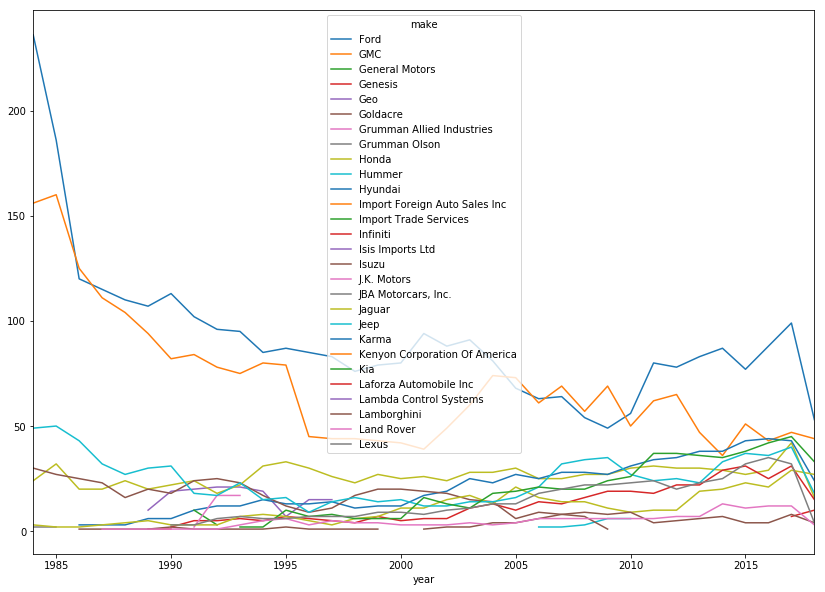

In [190]:
# get Ford through Lexus
auto.groupby(['year', 'make']).size().unstack().loc[:,'Ford':'Lexus'].\
plot(figsize=(14,10)) 

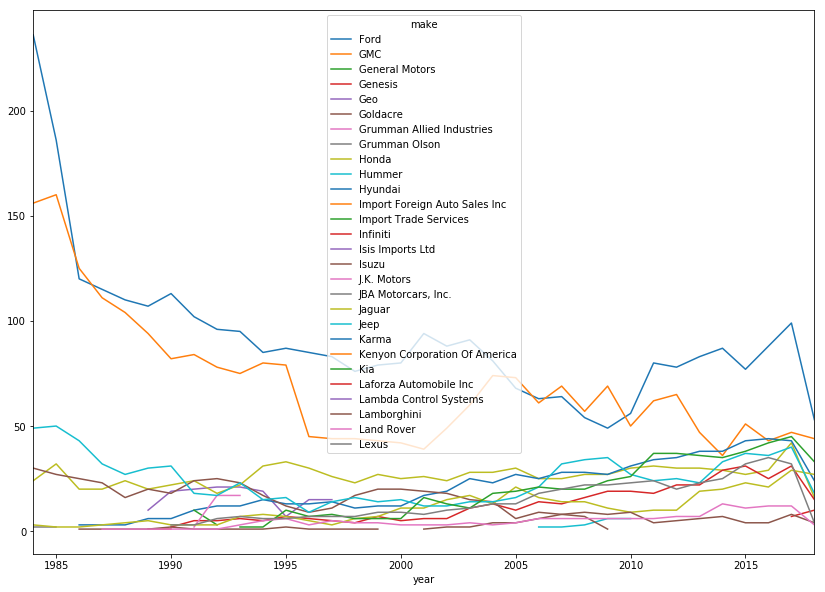

In [191]:
# Wrap with parens to allow per line "flow" style
(
auto.groupby(['year', 'make'])
    .size()
    .unstack('make')
    .loc[:,'Ford':'Lexus']
    .plot(figsize=(14,10)) 
)

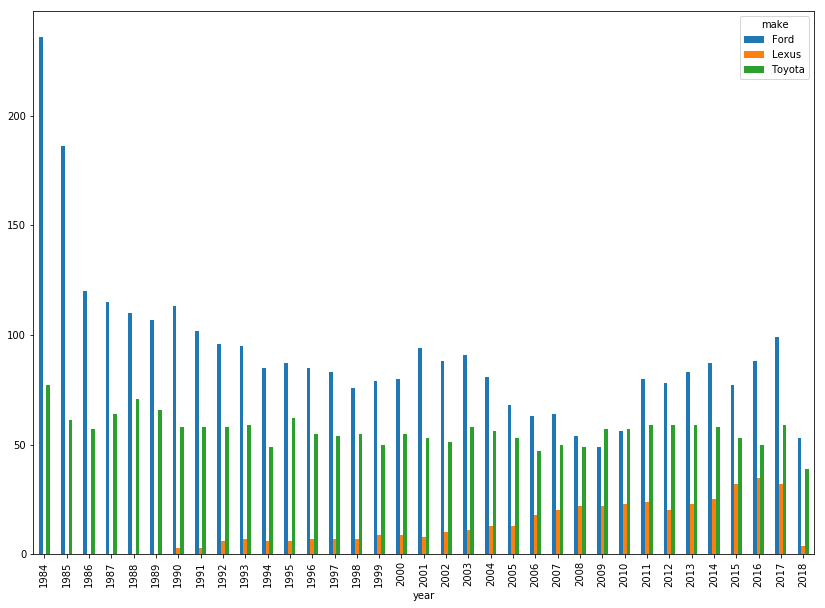

In [192]:
# Just look at Ford, Lexus, & Toyota
auto.groupby(['year', 'make']).size().unstack('make').loc[:,['Ford', 'Lexus', 'Toyota']].\
plot(kind='bar', figsize=(14,10)) 

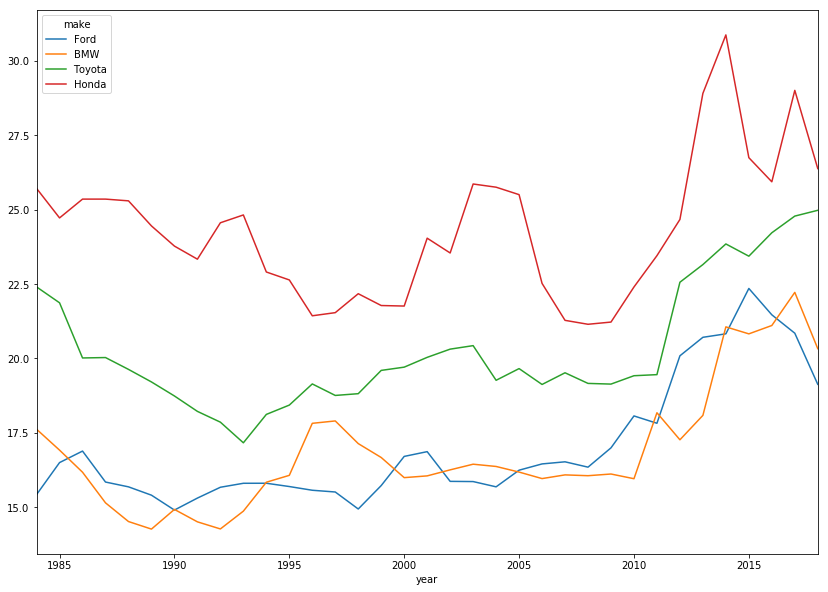

In [193]:
# get the average gas mileage per year
auto.groupby(['year', 'make'])['city08'].mean().unstack('make').\
loc[:,['Ford', 'BMW', 'Toyota', 'Honda']].\
plot(figsize=(14,10)) 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13de6cbe0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x148d85160>], dtype=object)

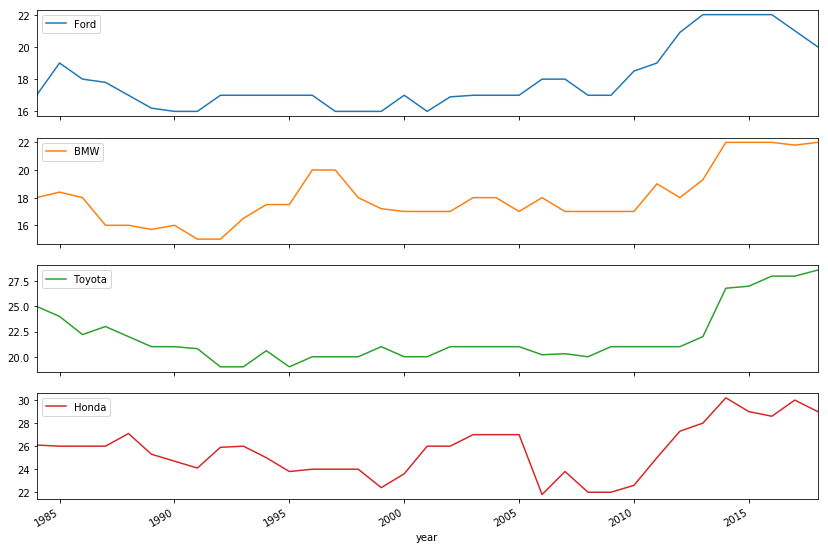

In [194]:
# Get the 70% quantile for each mfr
auto.groupby(['year', 'make'])['city08'].quantile(.7).unstack('make').\
loc[:,['Ford', 'BMW', 'Toyota', 'Honda']].\
plot(subplots=True, sort_columns=True, figsize=(14,10)) 

In [195]:
# Add the drive
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
)


year  make                                drive                     
1984  AM General                          2-Wheel Drive                 15.500000
      American Motors Corporation         4-Wheel or All-Wheel Drive    16.750000
      Buick                               2-Wheel Drive                 15.333333
      Cadillac                            Rear-Wheel Drive              16.750000
      Chevrolet                           2-Wheel Drive                 15.743119
                                          4-Wheel or All-Wheel Drive    14.744681
      Dodge                               2-Wheel Drive                 14.228916
                                          4-Wheel or All-Wheel Drive    13.518519
      Ford                                2-Wheel Drive                 13.393617
                                          4-Wheel or All-Wheel Drive    12.655172
      GMC                                 2-Wheel Drive                 15.743119
                            

In [196]:
# Can unstack multiple times
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
    .unstack('drive').unstack('make')
)

drive 2-Wheel Drive                                    \
make     AM General ASC Incorporated Acura Alfa Romeo   
year                                                    
1984           15.5              NaN   NaN        NaN   
1985            NaN              NaN   NaN        NaN   
1986            NaN              NaN   NaN        NaN   
1987            NaN              NaN   NaN        NaN   
1988            NaN              NaN   NaN        NaN   
1989            NaN              NaN   NaN        NaN   
1990            NaN              NaN   NaN        NaN   
1991            NaN              NaN   NaN        NaN   
1992            NaN              NaN   NaN        NaN   
1993            NaN              NaN   NaN        NaN   
1994            NaN              NaN   NaN        NaN   
1995            NaN              NaN   NaN        NaN   
1996            NaN              NaN   NaN        NaN   
1997            NaN              NaN   NaN        NaN   
1998            NaN              NaN   NaN        NaN   
1999            NaN              NaN   NaN        NaN   
2000            NaN              NaN   NaN        NaN   
2001            NaN              NaN   NaN        NaN   
2002            NaN              NaN   NaN        NaN   
2003            NaN              NaN   NaN        NaN   
2004            NaN              NaN   NaN        NaN   
2005            NaN              NaN   NaN        NaN   
2006            NaN              NaN   NaN        NaN   
2007            NaN              NaN   NaN        NaN   
2008            NaN              NaN   NaN        NaN   
2009            NaN              NaN   NaN        NaN   
2010            NaN              NaN   NaN        NaN   
2011            NaN              NaN   NaN        NaN   
2012            NaN              NaN   NaN        NaN   
2013            NaN              NaN   NaN        NaN   
2014            NaN              NaN   NaN        NaN   
2015            NaN              NaN   NaN        NaN   
2016            NaN              NaN   NaN        NaN   
2017            NaN              NaN   NaN        NaN   
2018            NaN              NaN   NaN        NaN   

drive                                                                \
make  American Motors Corporation Aston Martin Audi Aurora Cars Ltd   
year                                                                  
1984                          NaN          NaN  NaN             NaN   
1985                          NaN          NaN  NaN             NaN   
1986                          NaN          NaN  NaN             NaN   
1987                          NaN          NaN  NaN             NaN   
1988                          NaN          NaN  NaN             NaN   
1989                          NaN          NaN  NaN             NaN   
1990                          NaN          NaN  NaN             NaN   
1991                          NaN          NaN  NaN             NaN   
1992                          NaN          NaN  NaN             NaN   
1993                          NaN          NaN  NaN             NaN   
1994                          NaN          NaN  NaN             NaN   
1995                          NaN          NaN  NaN             NaN   
1996                          NaN          NaN  NaN             NaN   
1997                          NaN          NaN  NaN             NaN   
1998                          NaN          NaN  NaN             NaN   
1999                          NaN          NaN  NaN             NaN   
2000                          NaN          NaN  NaN             NaN   
2001                          NaN          NaN  NaN             NaN   
2002                          NaN          NaN  NaN             NaN   
2003                          NaN          NaN  NaN             NaN   
2004                          NaN          NaN  NaN             NaN   
2005                          NaN          NaN  NaN             NaN   
2006                          NaN          NaN  NaN       

In [197]:
# Can unstack multiple times
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
    .loc[(slice(None), # all years
          "Ford",    # Ford rows
          ["Rear-Wheel Drive"])]
    .unstack('drive').unstack('year')
)

drive Rear-Wheel Drive                                                    \
year              1985       1986       1987       1988  1989       1990   
make                                                                       
Ford         14.656566  15.585714  14.920635  14.425926  14.0  13.912281   

drive                                              ...                         \
year        1991       1992       1993       1994  ...        2009       2010   
make                                               ...                          
Ford   14.215686  14.367347  14.294118  14.222222  ...   15.473684  15.833333   

drive                                                          
year   2011  2012  2013  2014     2015  2016       2017  2018  
make                                                           
Ford   14.9  14.5  14.5  14.5  17.0625  16.8  16.892857  17.5  

[1 rows x 34 columns]

In [198]:
# Can unstack multiple times
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
    .loc[(slice(None), # all years
          "Ford",    # Ford rows
          ["Rear-Wheel Drive"])]  # if we don't make a list here the index won't have drive
    .unstack('drive').unstack('year')
)

drive Rear-Wheel Drive                                                    \
year              1985       1986       1987       1988  1989       1990   
make                                                                       
Ford         14.656566  15.585714  14.920635  14.425926  14.0  13.912281   

drive                                              ...                         \
year        1991       1992       1993       1994  ...        2009       2010   
make                                               ...                          
Ford   14.215686  14.367347  14.294118  14.222222  ...   15.473684  15.833333   

drive                                                          
year   2011  2012  2013  2014     2015  2016       2017  2018  
make                                                           
Ford   14.9  14.5  14.5  14.5  17.0625  16.8  16.892857  17.5  

[1 rows x 34 columns]

In [199]:
# Simpler may be better
(
auto.groupby(['year', 'make', 'drive'])['city08'].mean()
    .loc[(slice(None), # all years
          "Ford",    # Ford rows
          "Rear-Wheel Drive")]
    .plot(figsize=(14,10))
)

## Stacking Assignment

* For each Escape (model) in Ford (make) show the by year avg mpg (city08) in tabular form.
* Visualize the result

In [200]:
auto.head().T

0                             1  \
barrels08                             15.6957                       29.9645   
barrelsA08                                  0                             0   
charge120                                   0                             0   
charge240                                   0                             0   
city08                                     19                             9   
city08U                                     0                             0   
cityA08                                     0                             0   
cityA08U                                    0                             0   
cityCD                                      0                             0   
cityE                                       0                             0   
cityUF                                      0                             0   
co2                                        -1                            -1   
co2A                                       -1                            -1   
co2TailpipeAGpm                             0                             0   
co2TailpipeGpm                         423.19                       807.909   
comb08                                     21                            11   
comb08U                                     0                             0   
combA08                                     0                             0   
combA08U                                    0                             0   
combE                                       0                             0   
combinedCD                                  0                             0   
combinedUF                                  0                             0   
cylinders                                   4                            12   
displ                                       2                           4.9   
drive                        Rear-Wheel Drive              Rear-Wheel Drive   
engId                                    9011                         22020   
eng_dscr                                (FFS)                     (GUZZLER)   
feScore                                    -1                            -1   
fuelCost08                               1900                          3650   
fuelCostA08                                 0                             0   
...                                       ...                           ...   
rangeCity                                   0                             0   
rangeCityA                                  0                             0   
rangeHwy                                    0                             0   
rangeHwyA                                   0                             0   
trany                            Manual 5-spd                  Manual 5-spd   
UCity                                 23.3333                            11   
UCityA                                      0                             0   
UHighway                                   35                            19   
UHighwayA                                   0                             0   
VClass                            Two Seaters                   Two Seaters   
year                                     1985                          1985   
youSaveSpend                            -1750                        -10500   
guzzler                                   NaN                             T   
trans_dscr                                NaN                           NaN   
tCharger                                  NaN                           NaN   
sCharger                                  NaN                           NaN   
atvType                                   NaN                           NaN   
fuelType2                                 NaN                           NaN   
rangeA                                    NaN                           NaN   
evMotor        

In [201]:
print(auto.columns)


Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [202]:
auto.groupby(['model', 'year']).city08.mean()


model              year
1-Ton Truck 2WD    1985    19.500000
                   1986    20.500000
                   1987    20.500000
                   1988    18.000000
                   1989    17.000000
                   1990    16.500000
                   1991    16.000000
                   1992    16.000000
100                1989    16.500000
                   1990    16.000000
                   1991    16.000000
                   1992    16.333333
                   1993    17.000000
                   1994    16.500000
100 Wagon          1989    16.500000
                   1994    16.000000
100 quattro        1989    16.000000
                   1990    16.000000
                   1991    16.000000
                   1992    16.000000
                   1993    16.000000
                   1994    16.000000
100 quattro Wagon  1992    16.000000
                   1993    16.000000
                   1994    16.000000
1000               1984    26.250000
             

In [203]:
auto.groupby(['model', 'year']).city08.mean().unstack('year')

year                                1984       1985  1986  1987  1988  1989  \
model                                                                         
1-Ton Truck 2WD                      NaN  19.500000  20.5  20.5  18.0  17.0   
100                                  NaN        NaN   NaN   NaN   NaN  16.5   
100 Wagon                            NaN        NaN   NaN   NaN   NaN  16.5   
100 quattro                          NaN        NaN   NaN   NaN   NaN  16.0   
100 quattro Wagon                    NaN        NaN   NaN   NaN   NaN   NaN   
1000                               26.25  24.714286  23.0  23.0   NaN   NaN   
124 Spider                           NaN        NaN   NaN   NaN   NaN   NaN   
128ci Convertible                    NaN        NaN   NaN   NaN   NaN   NaN   
128i                                 NaN        NaN   NaN   NaN   NaN   NaN   
128i Convertible                     NaN        NaN   NaN   NaN   NaN   NaN   
135i                                 NaN        NaN   NaN   NaN   NaN   NaN   
135i Convertible                     NaN        NaN   NaN   NaN   NaN   NaN   
1500 2WD                             NaN        NaN   NaN   NaN   NaN   NaN   
1500 4WD                             NaN        NaN   NaN   NaN   NaN   NaN   
1500 HFE 2WD                         NaN        NaN   NaN   NaN   NaN   NaN   
164                                  NaN        NaN   NaN   NaN   NaN   NaN   
18i                                19.00        NaN   NaN   NaN   NaN   NaN   
18i 4DR Wagon                        NaN  19.000000   NaN   NaN   NaN   NaN   
18i Sportwagon                       NaN        NaN  19.0   NaN   NaN   NaN   
190                                  NaN  21.500000  20.0   NaN   NaN   NaN   
190 D 2.2/190 E 2.3                23.00        NaN   NaN   NaN   NaN   NaN   
190D 2.5                             NaN        NaN   NaN  25.5  26.0  24.0   
190D 2.5 Turbo                       NaN        NaN   NaN  24.0   NaN   NaN   
190E                                 NaN        NaN   NaN   NaN   NaN   NaN   
190E 2.3                             NaN        NaN   NaN  18.5  18.5   NaN   
190E 2.3 MERC BENZ                   NaN        NaN   NaN   NaN   NaN   NaN   
190E 2.3-16                          NaN        NaN   NaN  17.5   NaN   NaN   
190E 2.6                             NaN        NaN   NaN  17.0  17.0  17.5   
1fas 410                           18.00        NaN   NaN   NaN   NaN   NaN   
2                                    NaN        NaN   NaN   NaN   NaN   NaN   
...                                  ...        ...   ...   ...   ...   ...   
allroad quattro                      NaN        NaN   NaN   NaN   NaN   NaN   
e-Golf                               NaN        NaN   NaN   NaN   NaN   NaN   
e6                                   NaN        NaN   NaN   NaN   NaN   NaN   
fortwo cabriolet                     NaN        NaN   NaN   NaN   NaN   NaN   
fortwo convertible                   NaN        NaN   NaN   NaN   NaN   NaN   
fortwo coupe                         NaN        NaN   NaN   NaN   NaN   NaN   
fortwo electric drive cabriolet      NaN        NaN   NaN   NaN   NaN   NaN   
fortwo electric drive convertible    NaN        NaN   NaN   NaN   NaN   NaN   
fortwo electric drive coupe          NaN        NaN   NaN   NaN   NaN   NaN   
i-280 Extended Cab 2WD               NaN        NaN   NaN   NaN   NaN   NaN   
i-290 Extended Cab 2WD               NaN        NaN   NaN   NaN   NaN   NaN   
i-350 Crew Cab 4WD                   NaN        NaN   NaN   NaN   NaN   NaN   
i-370 Crew Cab 2WD                   NaN        NaN   NaN   NaN   NaN   NaN   
i-370 Crew Cab 4WD                   NaN        NaN   NaN   NaN   NaN   NaN   
i-370 Extended Cab 2WD               NaN        NaN   NaN   NaN   NaN   NaN   
i-MiEV                               NaN        NaN   NaN   NaN   NaN   NaN   
i3 BEV                               NaN        NaN   NaN   NaN   NaN   NaN   
i3 BEV (60  Amp-hour battery)        NaN        Na

In [204]:
# if we want to plot by year, we need that in the index
# (so we need to unstack the model)
auto[auto.make == 'Ford'].groupby(['model', 'year']).city08.mean().unstack('model')

model  Aerostar Van  Aerostar Van AWD  Aerostar Wagon  Aerostar Wagon AWD  \
year                                                                        
1984            NaN               NaN             NaN                 NaN   
1985            NaN               NaN             NaN                 NaN   
1986      17.333333               NaN       16.000000                 NaN   
1987      18.500000               NaN       16.333333                 NaN   
1988      15.500000               NaN       15.000000                 NaN   
1989      15.500000               NaN       15.000000                 NaN   
1990      15.333333              14.0       15.000000                14.0   
1991      16.000000              14.0       15.333333                14.0   
1992      16.333333              14.0       15.000000                14.0   
1993      16.000000              15.0       15.000000                14.0   
1994      15.666667              14.0       14.666667                14.0   
1995      16.000000               NaN       15.000000                14.0   
1996      16.000000               NaN       15.000000                13.0   
1997      15.000000               NaN       15.000000                13.0   
1998            NaN               NaN             NaN                 NaN   
1999            NaN               NaN             NaN                 NaN   
2000            NaN               NaN             NaN                 NaN   
2001            NaN               NaN             NaN                 NaN   
2002            NaN               NaN             NaN                 NaN   
2003            NaN               NaN             NaN                 NaN   
2004            NaN               NaN             NaN                 NaN   
2005            NaN               NaN             NaN                 NaN   
2006            NaN               NaN             NaN                 NaN   
2007            NaN               NaN             NaN                 NaN   
2008            NaN               NaN             NaN                 NaN   
2009            NaN               NaN             NaN                 NaN   
2010            NaN               NaN             NaN                 NaN   
2011            NaN               NaN             NaN                 NaN   
2012            NaN               NaN             NaN                 NaN   
2013            NaN               NaN             NaN                 NaN   
2014            NaN               NaN             NaN                 NaN   
2015            NaN               NaN             NaN                 NaN   
2016            NaN               NaN             NaN                 NaN   
2017            NaN               NaN             NaN                 NaN   
2018            NaN               NaN             NaN                 NaN   

model  Aspire  Bronco 4WD  Bronco II 2WD  Bronco II 4WD  \
year                                                      
1984      NaN   11.466667            NaN      14.833333   
1985      NaN   12.300000            NaN      16.600000   
1986      NaN   13.000000      17.666667      15.500000   
1987      NaN   11.875000      16.000000      15.500000   
1988      NaN   11.777778      16.000000      15.500000   
1989      NaN   11.888889      15.333333      15.000000   
1990      NaN   11.285714      15.500000      15.000000   
1991      NaN   11.400000            NaN            NaN   
1992      NaN   11.600000            NaN            NaN   
1993      NaN   11.666667            NaN            NaN   
1994     28.0   11.666667            NaN            NaN   
1995     28.0   11.666667            NaN            NaN   
1996     27.0   11.666667            NaN            NaN   
1997     26.5         NaN            NaN            NaN   
1998      NaN         NaN            NaN            NaN   
1999      NaN         NaN            NaN            NaN   
2000      NaN         NaN            NaN            NaN   
2001      NaN         NaN    

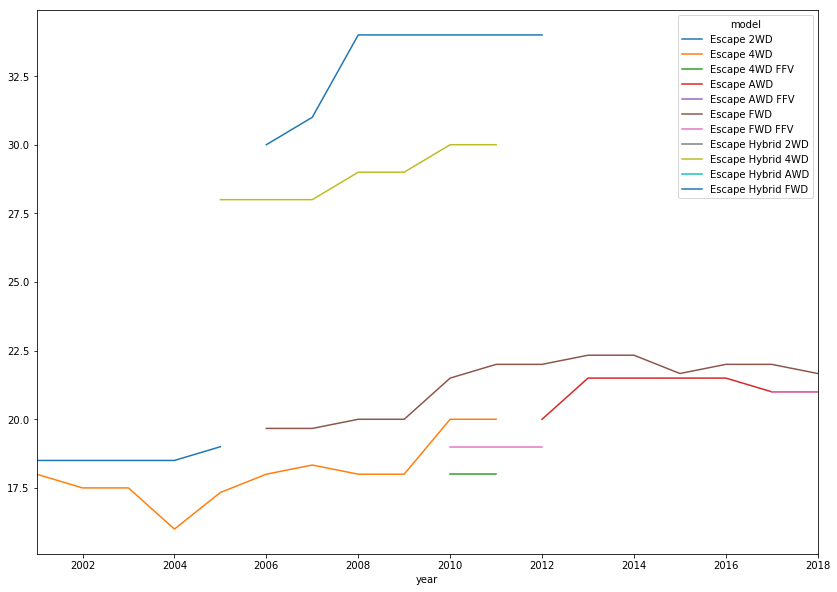

In [205]:
(
    auto[(auto.make == 'Ford') & (auto.model.str.startswith('Escape'))]
    .groupby(['model', 'year'])
    .city08
    .mean()
    .unstack('model')
    .plot(figsize=(14,10))

)


## Extra Groupby

In [207]:
# Find best mpg for each year/make
auto.loc[auto.groupby(['year', 'make']).city08.idxmax()][['year', 'make', 'model', 'city08']]

year                           make                      model  city08
19314  1984                     AM General          DJ Po Vehicle 2WD      18
18215  1984                     Alfa Romeo         Spider Veloce 2000      18
19353  1984    American Motors Corporation             Eagle SX/4 4WD      19
18256  1984                   Aston Martin                    Lagonda       8
18267  1984                           Audi                       4000      21
19487  1984       Avanti Motor Corporation                  Avanti II      15
18270  1984                            BMW                   3 Series      21
18216  1984                        Bertone                       X1/9      20
18503  1984  Bill Dovell Motor Car Company               Dovell 230CE      17
18629  1984         Bitter Gmbh and Co. Kg                         SC      12
18487  1984                          Buick                    Skyhawk      23
18496  1984                       Cadillac                   Cimarron      21
18290  1984                      Chevrolet                   Chevette      33
18670  1984                       Chrysler                    LeBaron      21
18322  1984                          Dodge                       Colt      31
18518  1984                           Ford                     Escort      35
18977  1984                            GMC             S15 Pickup 2WD      26
19345  1984                  Grumman Olson                     Kubvan      31
18227  1984                          Honda                  Civic CRX      38
19025  1984  Import Foreign Auto Sales Inc                   1fas 410      18
18360  1984                          Isuzu                     I-Mark      33
18365  1984                         Jaguar                         XJ      14
19026  1984                           Jeep       Scrambler Pickup 4WD      19
18230  1984  Kenyon Corporation Of America          Kenyon 5.0 Cabrio      13
18231  1984                    Lamborghini            Countach Lp500s      10
19875  1984                        Lincoln                Continental      21
18232  1984                          Lotus                     Esprit      11
18245  1984                       Maserati                    Biturbo      12
18554  1984                          Mazda                        626      31
18377  1984                  Mercedes-Benz        190 D 2.2/190 E 2.3      27
...     ...                            ...                        ...     ...
31888  2018                          Dodge                 Challenger      19
31474  2018                        Ferrari                    488 GTB      16
31916  2018                           Fiat                      500 L      22
32172  2018                           Ford          Fusion Hybrid FWD      43
32190  2018                            GMC                Terrain FWD      28
31373  2018                        Genesis                    G80 RWD      19
31817  2018                          Honda                        Fit      33
31760  2018                        Hyundai                    Elantra      32
32019  2018                       Infiniti                 Q70 Hybrid      28
31691  2018                         Jaguar                         XE      32
31725  2018                           Jeep                Compass FWD      23
32296  2018                          Karma                     Revero      20
32200  2018                            Kia              Soul Electric     124
31666  2018                    Lamborghini          Aventador S Coupe      10
32250  2018                     Land Rover          Range Rover Velar      26
31483  2018                          Lexus                    LC 500h      26
32321  2018                        Lincoln             MKZ Hybrid FWD      41
31690  2018                           MINI  Cooper SE Countryman All4      28
31551  2018                       Maserati             Ghibli  V6 RWD      17
31696  2018                  

In [208]:
# only show ford
res = auto.loc[auto.groupby(['year', 'make']).city08.idxmax()][['year', 'make', 'model', 'city08']]
res[res.make.isin(['Ford'])]

year  make                   model  city08
18518  1984  Ford                  Escort      35
22283  1985  Ford                  Escort      36
10900  1986  Ford               Escort FS      34
24413  1987  Ford                  Escort      31
32713  1988  Ford                 Festiva      33
33964  1989  Ford                 Festiva      33
35222  1990  Ford                 Festiva      30
36434  1991  Ford                 Festiva      30
37652  1992  Ford                 Festiva      30
38827  1993  Ford                 Festiva      30
812    1994  Ford                  Aspire      31
1873   1995  Ford                  Aspire      31
2882   1996  Ford                  Aspire      29
3709   1997  Ford                  Aspire      29
4685   1998  Ford                  Escort      24
23027  1999  Ford       Ranger Pickup 2WD      62
23021  2000  Ford       Ranger Pickup 2WD      62
8144   2001  Ford                   Th!nk      74
9213   2002  Ford  Explorer USPS Electric      45
9458   2003  Ford                   Focus      24
10640  2004  Ford                   Focus      24
12540  2005  Ford       Escape Hybrid 2WD      30
13762  2006  Ford       Escape Hybrid FWD      30
14292  2007  Ford       Escape Hybrid FWD      31
15485  2008  Ford       Escape Hybrid FWD      34
17178  2009  Ford       Escape Hybrid FWD      34
18048  2010  Ford       Fusion Hybrid FWD      41
22365  2011  Ford       Fusion Hybrid FWD      41
24465  2012  Ford          Focus Electric     110
25291  2013  Ford          Focus Electric     110
26507  2014  Ford          Focus Electric     110
28513  2015  Ford          Focus Electric     110
29604  2016  Ford          Focus Electric     110
31293  2017  Ford          Focus Electric     118
32172  2018  Ford       Fusion Hybrid FWD      43